# The Wilson-Cowan model

In this notebook, the basic use of the implementation of the Wilson-Cowan (`wc`) model is presented. 

In the `wc` model, the activity of a particular brain region is defined by a coupled system of excitatory (E) and inhibitory (I) neuronal populations with the mean firing rates of the E and I pools being the dynamic variables, as first described by Wilson and Cowan in 1972 ( H.R. Wilson and J.D. Cowan. *Excitatory and inhibitory interactions in localized populations of model neurons*. Biophys. J., 12:1–24 (1972)) 

In [220]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
# get the current directory
cwd = os.getcwd()


# Print the current working directory
print("Current working directory: {0}".format(cwd))

Current working directory: /Users/masha/Documents/Uni/Thesis/neurolib


In [221]:
from neurolib.models.wc import WCModel
# Some useful functions are provided here
import neurolib.utils.functions as func
import neurolib.utils.stimulus as stim
import numpy as np
import scipy

In [222]:
import math

In [223]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
range(0, 4000)

range(0, 4000)

In [225]:
import matplotlib.pyplot as plt
import numpy as np
import glob

from neurolib.models.wc import WCModel

import neurolib.utils.loadData as ld
import neurolib.utils.functions as func

# a nice color map
plt.rcParams['image.cmap'] = 'plasma'

In [226]:
wc = WCModel()
wc.params['duration'] = 400
wc.params['dt'] = 0.1

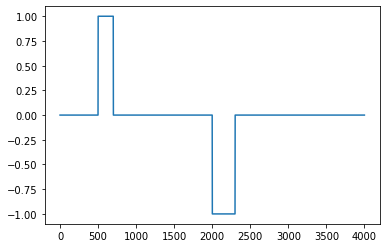

In [249]:
stimulus = np.zeros((1,int(wc.params['duration']/wc.params['dt'])))
stimulus[0][500:700] = 1
stimulus[0][2000:2300] = -1
plt.plot(stimulus.T)



In [228]:
stimulus = stim.StepInput(step_size=0.001,  start=5, end=100, n=1).to_model(wc)


In [250]:
max_exc = []
min_exc = []
ex = []
wc = WCModel()
wc.params['duration'] = 400
#wc.params['dt'] = 0.1
#wc.params["a_exc"] = 1
#wc.params["a_inh"] = 1

#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
#wc.params["exc_ext"] = 0
#wc.params["inh_ext"] = 0
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1

wc.params["control_term_E"] = stimulus
# these are the different input values that we want to scan
exc_inputs_n = 100
inh_inputs_n = 100
exc_inputs = np.linspace(1, 10, exc_inputs_n)
inh_inputs = np.linspace(1, 10, inh_inputs_n)

fig,a =  plt.subplots(inh_inputs_n,exc_inputs_n,  sharex='col', sharey='row', figsize=(15,10))

line_coord = []

for i, inh_ext in enumerate(inh_inputs):
    for j, exc_ext in enumerate(exc_inputs):
        # Note: this has to be a vector since it is input for all nodes
        # (but we have only one node in this example)
        wc.params['exc_ext'] = exc_ext
        wc.params['inh_ext'] = inh_ext
        #wc.params["control_term_E"] = stimulus
        #wc.params["control_term_I"] = stimulus
        wc.run()

        # we add the maximum and the minimum of the last second of the 
        # simulation to a list
        #max_exc.append(np.max(wc.exc[0, -int(200/wc.params['dt']):]))
        #min_exc.append(np.min(wc.exc[0, -int(200/wc.params['dt']):]))
        #print(np.shape(wc.exc))
        ex = wc.exc
        
        


        #plt.figure(figsize = (20, 6))
        #plt.plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)
        #plt.show()
        
        
        #fig, ax = plt.subplots(50, 50, sharex='col', sharey='row')

        #ax[i, j].plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)

        #a[inh_inputs_n-i-1][j].plot(wc.t, ex[0].tolist(), c='k', lw = 2)
        #a[9-i][j].plot(s)
        
        

        
        if(round(wc.exc[0][1700],12) != round(wc.exc[0][3700],12)):
            print('({:f},{:f}),'.format(exc_ext, inh_ext))
            line_coord.append((exc_ext, inh_ext))
            
            #print(round(wc.exc[0][4700],2))
            #print(round(wc.exc[0][7990],2))
            

        # Turn off tick labels
        a[inh_inputs_n-i-1][j].set_yticklabels([])
        a[inh_inputs_n-i-1][j].set_xticklabels([])
        
        if(i==0):
            a[inh_inputs_n-i-1][j].set_xlabel(round(exc_ext, 3))
        if(j==0):
            a[inh_inputs_n-i-1][j].set_ylabel(round(inh_ext, 3))
            
        #print(ex[0])
       

        #plt.show()

        #ex = wc.inh
        #plt.plot(range(int(wc.params['duration']/wc.params['dt'])), ex[0].tolist(), c='k', lw = 2)
        #plt.show()

        #print(np.shape(wc.bracets))
        #plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.exc[0].tolist(), c='k', lw = 2)
        #plt.show()

#plt.subplots_adjust(hspace=.0)
#plt.subplots_adjust(wspace=.0)
fig.tight_layout()
#plt.show()

print(line_coord)

(1.000000,1.000000),
(1.090909,1.000000),
(1.181818,1.000000),
(1.272727,1.000000),
(1.363636,1.000000),
(1.454545,1.000000),
(1.545455,1.000000),
(1.636364,1.000000),
(1.727273,1.000000),
(1.818182,1.000000),
(1.909091,1.000000),
(2.000000,1.000000),
(2.090909,1.000000),
(2.181818,1.000000),
(2.272727,1.000000),
(2.363636,1.000000),
(2.454545,1.000000),
(2.545455,1.000000),
(2.636364,1.000000),
(2.727273,1.000000),
(2.818182,1.000000),
(1.090909,1.090909),
(1.181818,1.090909),
(1.272727,1.090909),
(1.363636,1.090909),
(1.454545,1.090909),
(1.545455,1.090909),
(1.636364,1.090909),
(1.727273,1.090909),
(1.818182,1.090909),
(1.909091,1.090909),
(2.000000,1.090909),
(2.090909,1.090909),
(2.181818,1.090909),
(2.272727,1.090909),
(2.363636,1.090909),
(2.454545,1.090909),
(2.545455,1.090909),
(2.636364,1.090909),
(2.727273,1.090909),
(2.818182,1.090909),
(1.000000,1.181818),
(1.090909,1.181818),
(1.181818,1.181818),
(1.272727,1.181818),
(1.363636,1.181818),
(1.454545,1.181818),
(1.545455,1.1

(2.818182,4.545455),
(2.909091,4.545455),
(3.000000,4.545455),
(3.090909,4.545455),
(3.181818,4.545455),
(3.272727,4.545455),
(3.363636,4.545455),
(3.454545,4.545455),
(3.545455,4.545455),
(3.636364,4.545455),
(3.727273,4.545455),
(3.818182,4.545455),
(3.909091,4.545455),
(4.000000,4.545455),
(4.090909,4.545455),
(4.181818,4.545455),
(4.272727,4.545455),
(2.818182,4.636364),
(2.909091,4.636364),
(3.000000,4.636364),
(3.090909,4.636364),
(3.181818,4.636364),
(3.272727,4.636364),
(3.363636,4.636364),
(3.454545,4.636364),
(3.545455,4.636364),
(3.636364,4.636364),
(3.727273,4.636364),
(3.818182,4.636364),
(3.909091,4.636364),
(4.000000,4.636364),
(4.090909,4.636364),
(4.181818,4.636364),
(4.272727,4.636364),
(4.363636,4.636364),
(2.818182,4.727273),
(2.909091,4.727273),
(3.000000,4.727273),
(3.090909,4.727273),
(3.181818,4.727273),
(3.272727,4.727273),
(3.363636,4.727273),
(3.454545,4.727273),
(3.545455,4.727273),
(3.636364,4.727273),
(3.727273,4.727273),
(3.818182,4.727273),
(3.909091,4.7

(2.818182,6.090909),
(2.909091,6.090909),
(3.000000,6.090909),
(3.090909,6.090909),
(3.181818,6.090909),
(3.272727,6.090909),
(3.363636,6.090909),
(3.454545,6.090909),
(3.545455,6.090909),
(3.636364,6.090909),
(3.727273,6.090909),
(3.818182,6.090909),
(3.909091,6.090909),
(4.000000,6.090909),
(4.090909,6.090909),
(4.181818,6.090909),
(4.272727,6.090909),
(4.363636,6.090909),
(4.454545,6.090909),
(4.545455,6.090909),
(4.636364,6.090909),
(4.727273,6.090909),
(4.818182,6.090909),
(4.909091,6.090909),
(5.000000,6.090909),
(5.090909,6.090909),
(5.181818,6.090909),
(5.272727,6.090909),
(5.363636,6.090909),
(5.454545,6.090909),
(2.818182,6.181818),
(2.909091,6.181818),
(3.000000,6.181818),
(3.090909,6.181818),
(3.181818,6.181818),
(3.272727,6.181818),
(3.363636,6.181818),
(3.454545,6.181818),
(3.545455,6.181818),
(3.636364,6.181818),
(3.727273,6.181818),
(3.818182,6.181818),
(3.909091,6.181818),
(4.000000,6.181818),
(4.090909,6.181818),
(4.181818,6.181818),
(4.272727,6.181818),
(4.363636,6.1

(2.818182,7.181818),
(2.909091,7.181818),
(3.000000,7.181818),
(3.090909,7.181818),
(3.181818,7.181818),
(3.272727,7.181818),
(3.363636,7.181818),
(3.454545,7.181818),
(3.545455,7.181818),
(3.636364,7.181818),
(3.727273,7.181818),
(3.818182,7.181818),
(3.909091,7.181818),
(4.000000,7.181818),
(4.090909,7.181818),
(4.181818,7.181818),
(4.272727,7.181818),
(4.363636,7.181818),
(4.454545,7.181818),
(4.545455,7.181818),
(4.636364,7.181818),
(4.727273,7.181818),
(4.818182,7.181818),
(4.909091,7.181818),
(5.000000,7.181818),
(5.090909,7.181818),
(5.181818,7.181818),
(5.272727,7.181818),
(5.363636,7.181818),
(5.454545,7.181818),
(5.545455,7.181818),
(5.636364,7.181818),
(5.727273,7.181818),
(5.818182,7.181818),
(5.909091,7.181818),
(6.000000,7.181818),
(6.090909,7.181818),
(2.818182,7.272727),
(2.909091,7.272727),
(3.000000,7.272727),
(3.090909,7.272727),
(3.181818,7.272727),
(3.272727,7.272727),
(3.363636,7.272727),
(3.454545,7.272727),
(3.545455,7.272727),
(3.636364,7.272727),
(3.727273,7.2

(2.818182,8.181818),
(2.909091,8.181818),
(3.000000,8.181818),
(3.090909,8.181818),
(3.181818,8.181818),
(3.272727,8.181818),
(3.363636,8.181818),
(3.454545,8.181818),
(3.545455,8.181818),
(3.636364,8.181818),
(3.727273,8.181818),
(3.818182,8.181818),
(3.909091,8.181818),
(4.000000,8.181818),
(4.090909,8.181818),
(4.181818,8.181818),
(4.272727,8.181818),
(4.363636,8.181818),
(4.454545,8.181818),
(4.545455,8.181818),
(4.636364,8.181818),
(4.727273,8.181818),
(4.818182,8.181818),
(4.909091,8.181818),
(5.000000,8.181818),
(5.090909,8.181818),
(5.181818,8.181818),
(5.272727,8.181818),
(5.363636,8.181818),
(5.454545,8.181818),
(5.545455,8.181818),
(5.636364,8.181818),
(5.727273,8.181818),
(5.818182,8.181818),
(5.909091,8.181818),
(6.000000,8.181818),
(6.090909,8.181818),
(6.181818,8.181818),
(6.272727,8.181818),
(2.818182,8.272727),
(2.909091,8.272727),
(3.000000,8.272727),
(3.090909,8.272727),
(3.181818,8.272727),
(3.272727,8.272727),
(3.363636,8.272727),
(3.454545,8.272727),
(3.545455,8.2

(2.818182,9.181818),
(2.909091,9.181818),
(3.000000,9.181818),
(3.090909,9.181818),
(3.181818,9.181818),
(3.272727,9.181818),
(3.363636,9.181818),
(3.454545,9.181818),
(3.545455,9.181818),
(3.636364,9.181818),
(3.727273,9.181818),
(3.818182,9.181818),
(3.909091,9.181818),
(4.000000,9.181818),
(4.090909,9.181818),
(4.181818,9.181818),
(4.272727,9.181818),
(4.363636,9.181818),
(4.454545,9.181818),
(4.545455,9.181818),
(4.636364,9.181818),
(4.727273,9.181818),
(4.818182,9.181818),
(4.909091,9.181818),
(5.000000,9.181818),
(5.090909,9.181818),
(5.181818,9.181818),
(5.272727,9.181818),
(5.363636,9.181818),
(5.454545,9.181818),
(5.545455,9.181818),
(5.636364,9.181818),
(5.727273,9.181818),
(5.818182,9.181818),
(5.909091,9.181818),
(6.000000,9.181818),
(6.090909,9.181818),
(6.181818,9.181818),
(6.272727,9.181818),
(2.818182,9.272727),
(2.909091,9.272727),
(3.000000,9.272727),
(3.090909,9.272727),
(3.181818,9.272727),
(3.272727,9.272727),
(3.363636,9.272727),
(3.454545,9.272727),
(3.545455,9.2

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fcd88ee48b0> (for post_execute):


KeyboardInterrupt: 

In [15]:
line = [(1.933333,1.000000),
(2.400000,1.000000),
(2.400000,1.466667),
(2.866667,2.866667),
(2.866667,3.333333),
(3.333333,3.333333),
(2.866667,3.800000),
(3.333333,3.800000),
(2.866667,4.266667),
(3.333333,4.266667),
(3.800000,4.266667),
(2.866667,4.733333),
(3.333333,4.733333),
(3.800000,4.733333),
(4.266667,4.733333),
(2.866667,5.200000),
(3.333333,5.200000),
(3.800000,5.200000),
(4.266667,5.200000),
(4.733333,5.200000),
(2.866667,5.666667),
(3.333333,5.666667),
(3.800000,5.666667),
(4.266667,5.666667),
(4.733333,5.666667),
(2.866667,6.133333),
(3.333333,6.133333),
(3.800000,6.133333),
(4.266667,6.133333),
(4.733333,6.133333),
(5.200000,6.133333),
(2.866667,6.600000),
(3.333333,6.600000),
(3.800000,6.600000),
(4.266667,6.600000),
(4.733333,6.600000),
(5.200000,6.600000),
(5.666667,6.600000),
(2.866667,7.066667),
(3.333333,7.066667),
(3.800000,7.066667),
(4.266667,7.066667),
(4.733333,7.066667),
(5.200000,7.066667),
(5.666667,7.066667),
(2.866667,7.533333),
(3.333333,7.533333),
(3.800000,7.533333),
(4.266667,7.533333),
(4.733333,7.533333),
(5.200000,7.533333),
(5.666667,7.533333),
(6.133333,7.533333),
(2.866667,8.000000),
(3.333333,8.000000),
(3.800000,8.000000),
(4.266667,8.000000),
(4.733333,8.000000),
(5.200000,8.000000),
(5.666667,8.000000),
(6.133333,8.000000),]

In [253]:
import json

# Open output file for writing
with open('listfile.txt', 'w') as filehandle:
    json.dump(line_coord, filehandle)


# Open output file for reading
with open('listfile.txt', 'r') as filehandle:
    line_coord2 = json.load(filehandle)

In [254]:
line_coord2

[[1.0, 1.0],
 [1.0909090909090908, 1.0],
 [1.1818181818181819, 1.0],
 [1.2727272727272727, 1.0],
 [1.3636363636363638, 1.0],
 [1.4545454545454546, 1.0],
 [1.5454545454545454, 1.0],
 [1.6363636363636362, 1.0],
 [1.7272727272727273, 1.0],
 [1.8181818181818183, 1.0],
 [1.9090909090909092, 1.0],
 [2.0, 1.0],
 [2.090909090909091, 1.0],
 [2.1818181818181817, 1.0],
 [2.2727272727272725, 1.0],
 [2.3636363636363638, 1.0],
 [2.4545454545454546, 1.0],
 [2.5454545454545454, 1.0],
 [2.6363636363636367, 1.0],
 [2.7272727272727275, 1.0],
 [2.8181818181818183, 1.0],
 [1.0909090909090908, 1.0909090909090908],
 [1.1818181818181819, 1.0909090909090908],
 [1.2727272727272727, 1.0909090909090908],
 [1.3636363636363638, 1.0909090909090908],
 [1.4545454545454546, 1.0909090909090908],
 [1.5454545454545454, 1.0909090909090908],
 [1.6363636363636362, 1.0909090909090908],
 [1.7272727272727273, 1.0909090909090908],
 [1.8181818181818183, 1.0909090909090908],
 [1.9090909090909092, 1.0909090909090908],
 [2.0, 1.0909

In [256]:
line_right = []
(c,d) = line_coord2[0]
for (a,b) in line_coord2:
    if b != d:
        line_right.append((c,d))
        c = a
        d = b
    c = a 
    d = b
print(line_right)

[(2.8181818181818183, 1.0), (2.8181818181818183, 1.0909090909090908), (2.8181818181818183, 1.1818181818181819), (2.8181818181818183, 1.2727272727272727), (2.8181818181818183, 1.3636363636363638), (2.8181818181818183, 1.4545454545454546), (2.8181818181818183, 1.5454545454545454), (2.8181818181818183, 1.6363636363636362), (2.8181818181818183, 1.7272727272727273), (6.7272727272727275, 1.8181818181818183), (2.8181818181818183, 1.9090909090909092), (2.8181818181818183, 2.0), (2.8181818181818183, 2.090909090909091), (2.8181818181818183, 2.1818181818181817), (2.8181818181818183, 2.2727272727272725), (2.8181818181818183, 2.3636363636363638), (2.8181818181818183, 2.4545454545454546), (2.8181818181818183, 2.5454545454545454), (2.909090909090909, 2.6363636363636367), (2.909090909090909, 2.7272727272727275), (3.0, 2.8181818181818183), (3.090909090909091, 2.909090909090909), (3.090909090909091, 3.0), (3.1818181818181817, 3.090909090909091), (3.272727272727273, 3.1818181818181817), (3.36363636363636

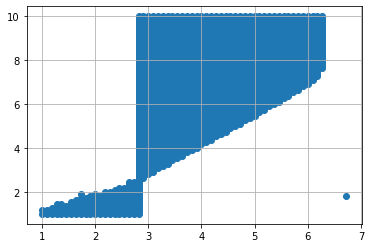

In [255]:
plt.scatter(*zip(*line_coord2))
plt.grid()
plt.show()

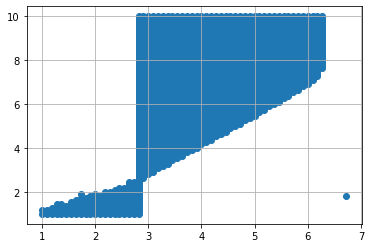

In [251]:
plt.scatter(*zip(*line_coord))
plt.grid()
plt.show()

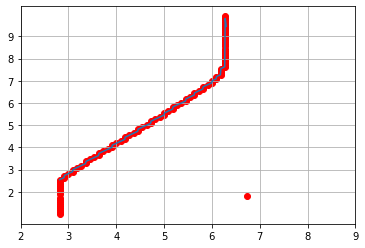

In [257]:
from scipy import interpolate

x = list(map(list, zip(*line_right)))[0]
y = list(map(list, zip(*line_right)))[1]

interpolation = interpolate.interp1d(x,y)
interpolation_backwards = interpolate.interp1d(y, x)


x = np.arange(2.8182,6.3,0.01)
plt.plot(x,interpolation(x))
plt.scatter(*zip(*line_right), color = 'r')

major_ticks = np.arange(2, 10, 1)



plt.xticks(major_ticks)
plt.yticks(major_ticks)


plt.grid(which='both')
plt.show()

print()

interpolation

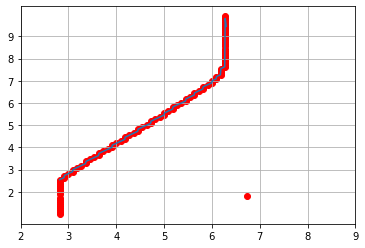

In [252]:



from scipy import interpolate

x = list(map(list, zip(*line_right)))[0]
y = list(map(list, zip(*line_right)))[1]

interpolation = interpolate.interp1d(x,y)
interpolation_backwards = interpolate.interp1d(y, x)


x = np.arange(2.8182,6.3,0.01)
plt.plot(x,interpolation(x))
plt.scatter(*zip(*line_right), color = 'r')

major_ticks = np.arange(2, 10, 1)



plt.xticks(major_ticks)
plt.yticks(major_ticks)


plt.grid(which='both')
plt.show()

print()

interpolation

In [160]:
d_s = []
for x,y in ext_list_full:
    print(x,y)
    d_s.append((interpolation_backwards(y)-x, y-interpolation(x)))

d_s




3 3
3 4
3 5
3 6
3 7
3 8
3 9
4 5
4 6
4 7
4 8
4 9
5 6
5 7
5 8
5 9
6 8
6 9


[(0.09090909090909083, 0.18181818181818166),
 (0.9090909090909092, 1.1818181818181817),
 (1.6363636363636367, 2.1818181818181817),
 (2.3636363636363633, 3.1818181818181817),
 (3.0, 4.181818181818182),
 (3.2727272727272725, 5.181818181818182),
 (3.2727272727272725, 6.181818181818182),
 (0.6363636363636367, 0.8181818181818183),
 (1.3636363636363633, 1.8181818181818183),
 (2.0, 2.8181818181818183),
 (2.2727272727272725, 3.8181818181818183),
 (2.2727272727272725, 4.818181818181818),
 (0.3636363636363633, 0.45454545454545414),
 (1.0, 1.4545454545454541),
 (1.2727272727272725, 2.454545454545454),
 (1.2727272727272725, 3.454545454545454),
 (0.2727272727272725, 1.0),
 (0.2727272727272725, 2.0)]

In [234]:
d_s2 = [(0.09090909090909083, 0.18181818181818166),
 (0.9090909090909092, 1.1818181818181817),
 (1.6363636363636367, 2.1818181818181817),
 (2.3636363636363633, 3.1818181818181817),
 (3.0, 4.181818181818182),
 (3.2727272727272725, 5.181818181818182),
 (3.2727272727272725, 6.181818181818182),
 (0.6363636363636367, 0.8181818181818183),
 (1.3636363636363633, 1.8181818181818183),
 (2.0, 2.8181818181818183),
 (2.2727272727272725, 3.8181818181818183),
 (2.2727272727272725, 4.818181818181818),
 (0.3636363636363633, 0.45454545454545414),
 (1.0, 1.4545454545454541),
 (1.2727272727272725, 2.454545454545454),
 (1.2727272727272725, 3.454545454545454),
 (0.2727272727272725, 1.0),
 (0.2727272727272725, 2.0)]


[(0.09090909090909083, 0.18181818181818166),
 (0.9090909090909092, 1.1818181818181817),
 (1.6363636363636367, 2.1818181818181817),
 (2.3636363636363633, 3.1818181818181817),
 (3.0, 4.181818181818182),
 (3.2727272727272725, 5.181818181818182),
 (3.2727272727272725, 6.181818181818182),
 (0.6363636363636367, 0.8181818181818183),
 (1.3636363636363633, 1.8181818181818183),
 (2.0, 2.8181818181818183),
 (2.2727272727272725, 3.8181818181818183),
 (2.2727272727272725, 4.818181818181818),
 (0.3636363636363633, 0.45454545454545414),
 (1.0, 1.4545454545454541),
 (1.2727272727272725, 2.454545454545454),
 (1.2727272727272725, 3.454545454545454),
 (0.2727272727272725, 1.0),
 (0.2727272727272725, 2.0)]

In [9]:
def optimal_control(wc, exc_exp, inh_exp, exc_stimulus, inh_stimulus, exc_init=None, inh_init=None, n_iter = 5000, plot_freq = 200, w = [0,0], a = 0, debug = False):
    #h = (xn-x0)/n_step
    #times = np.arange(0, xn+h, h)
    times = range(int(wc.params['duration']/wc.params['dt']))
    #print(times)
    #u_i = stim.StepInput(step_size=0,  start=0.1, end=0.2, n=1).to_model(wc)
    #print("u_i", u_i)
    #u_e = stim.StepInput(step_size=0,  start=0.1, end=0.2, n=1).to_model(wc)
    #u_i = stimulus
    u_e = exc_stimulus
    u_i = inh_stimulus
    grad = [0,0]
    
    if(exc_init is not None):
        wc.params["exc_init"] = [[exc_init]]
    if(inh_init is not None):
        wc.params["inh_init"] =[[inh_init]]
    
    small_step_size_counter = 0

    for l in range(n_iter):
        
        step_size_adj = 10 #0.005
        

        wc.params["control_term_E"] = u_e
        wc.params["control_term_I"] = u_i

        
        wc.run()
        #print("check", wc.brackets_E)
        ex = wc.exc
        inh = wc.inh
        
        if(debug):
            print(np.shape(ex))
            print(int(wc.params['duration']/wc.params['dt']))
        if (l%plot_freq==0):
            #print(np.linalg.norm(step_size_adj*np.array(grad[0])))
            #print(np.linalg.norm(step_size_adj*np.array(grad[1])))
            print("___")
            print("iteration:", l)
            plt.figure(figsize = (20, 6))
            #print(wc.t)
            #print(ex[0].tolist())
            plt.plot(wc.t, exc_exp.T, '--', c = 'r', label="exc_target")
            plt.plot(wc.t, ex[0].tolist(), c='r', lw = 2, label="exc")
            plt.plot(wc.t, u_e.T, ':', c='r', lw = 2,label="stimulus")
            plt.axvspan((a+1)*wc.params['dt'], wc.params['duration'], color='y', alpha=0.2, lw=0)
            #plt.legend()
            #plt.show()
            #plt.plot(wc.t, u_e.T, c='r', lw = 2,label="stimulus")
            #plt.show()
            
            #plt.figure(figsize = (20, 6))
            plt.plot(wc.t, inh_exp.T, '--', c = 'blue',label="inh_target")
            plt.plot(wc.t, inh[0].tolist(), c='blue', lw = 2, label="inh")
            plt.plot(wc.t, u_i.T, ':', c='blue', lw = 2,label="stimulus")
            #plt.axvspan((a+1)*wc.params['dt'], wc.params['duration'], color='y', alpha=0.2, lw=0)
            plt.legend()
            plt.show()
            #plt.plot(wc.t, u_i.T, c='r', lw = 2,label="stimulus")
            #plt.show()
        
        
        
        lambdas = euler_backwards(wc, exc_exp, inh_exp, wc.params['dt'], int(math.ceil(wc.params['duration']/wc.params['dt'])), a, debug)
        if debug:
            print("lambdas", lambdas)
            plt.figure(figsize = (20, 6))
            plt.plot(wc.t, [x[0] for x in lambdas], c='blue', lw = 2, label="lambdas")
            plt.legend()
            plt.show()
        
        #w = [0,0]
        
        
        grad = grad_f(w, u_e,u_i, lambdas, times, a)
        
        if True:
            if (l%plot_freq==0):
                print("gradient:")
                plt.figure(figsize = (20, 6))
                plt.plot(wc.t, np.array(grad[0]), c='red', lw = 2, label="grad")
                plt.legend()
                plt.show()
        
        #print("grad", np.array(grad[0]))
        #print("lambdas", lambdas)
        
        
        step_size_adj = bisection(wc, step_size_adj,u_e,u_i,grad, times, exc_exp, inh_exp, w, debug, a)
        
        
        
        if(step_size_adj < 10**(-17)):
            small_step_size_counter +=1
        else:
            small_step_size_counter = 0
            
        if(small_step_size_counter > 50):
            #print("exit early")
            
            plt.figure(figsize = (20, 6))
            plt.plot(wc.t, exc_exp.T, '--', c = 'r', label="exc_target")
            plt.plot(wc.t, ex[0].tolist(), c='r', lw = 2, label="exc")
            plt.plot(wc.t, u_e.T, ':', c='r', lw = 2,label="stimulus")
            plt.axvspan((a+1)*wc.params['dt'], wc.params['duration'], color='y', alpha=0.2, lw=0)

            plt.plot(wc.t, inh_exp.T, '--', c = 'blue',label="inh_target")
            plt.plot(wc.t, inh[0].tolist(), c='blue', lw = 2, label="inh")
            plt.plot(wc.t, u_i.T, ':', c='blue', lw = 2,label="stimulus")
            plt.legend()
            plt.show()
            return u_e, u_i
        #if(l == 0):
        #    step_size_adj = 0.1
            
        if debug:
            print("step", step_size_adj)
            print("step_new", step_size_adj*np.array(grad[0]))

        u_e = u_e-step_size_adj*np.array(grad[0])
        u_i = u_i-step_size_adj*np.array(grad[1])
        
        eps_u = 0#10**(-7)
        
        
        if np.linalg.norm(step_size_adj*np.array(grad[0])) < eps_u and np.linalg.norm(step_size_adj*np.array(grad[1])) < eps_u:
            print("iteration:", l)
            print(np.linalg.norm(step_size_adj*np.array(grad[0])))
            print(np.linalg.norm(step_size_adj*np.array(grad[1])))
            plt.figure(figsize = (20, 6))
            plt.plot(wc.t, exc_exp.T, c = 'blue',label="exc_target")
            plt.plot(wc.t, ex[0].tolist(), c='k', lw = 2, label="exc")
            plt.plot(wc.t, u_e.T, c='r', lw = 2,label="stimulus")
            plt.axvspan(b*wc.params['dt'], wc.params['duration'], color='y', alpha=0.2, lw=0)
            plt.legend()
            plt.show()
            break
            
    return u_e, u_i

            
            

In [13]:
def bisection(model, step_size, u_e, u_i, grad, times, exc_exp, inh_exp, w, debug = False, b = 0):
    cost_temp = cost_f(w, model.exc[0], exc_exp, model.inh[0], inh_exp,  u_e, u_i, times, b)
    #print("c_t", cost_temp)
    while step_size > 10*(-8):

        u_e_1 = u_e-step_size*np.array(grad[0])
        u_i_1 = u_i-step_size*np.array(grad[1])

        model.params["control_term_E"] = u_e_1
        model.params["control_term_I"] = u_i_1


        model.run()
        ex = model.exc
        inh = model.inh
        
        if debug:
            #print("step: ", step_size)
            plt.figure(figsize = (8, 5))
            plt.plot(model.t, exc_exp.T,c = 'blue', label="exc_target")
            plt.plot(model.t, ex[0].tolist(), c='k', lw = 2, label="exc")
            plt.plot(model.t, u_e_1.T, c='r', lw = 2, label="stimulus")
            plt.legend()
            plt.show()

        cost = cost_f(w, ex[0], exc_exp, inh[0], inh_exp, u_e_1, u_i_1, times, b)
        if debug:
            print("cost", cost)
            print("step_size", step_size)
        #step_size = step_size/2
        #cost_temp = cost
        
        if(cost>cost_temp):
            step_size = step_size/2
            #cost_temp = cost.copy()
            #print("loop_cost", cost)
        else:
            #print("cost", cost)
            #print("step_size", step_size)
            return step_size
    
    print("zero step size")
    return 0
        

def cost_f(w, x, x_, y,y_,u_exc, u_inh, times, b: int = 0):
    
    #return np.sum(1/2*(x_-x)**2) 
    x_new = x[int(b):]
    x_new_ = x_[int(b):]
    y_new = y[int(b):]
    y_new_ = y_[int(b):]
    times_new = times[int(b):]
    return scipy.integrate.simps(0.5*((x_new_-x_new)**2 + (y_new_-y_new)**2),times_new) \
            + w[0] * ((np.sqrt(scipy.integrate.simps(u_exc**2, times))) \
             + np.sqrt(scipy.integrate.simps(u_inh**2, times))) \
                + w[1] * 0.5*(scipy.integrate.simps(u_inh**2 + u_exc**2, times))
    #return  0.3 * (np.sqrt(scipy.integrate.simps(u_exc**2, times)) \
    #        + np.sqrt(scipy.integrate.simps(u_inh**2, times)) \
    #        + 0.5 * scipy.integrate.simps(u_exc**2 + u_inh**2, times)) \
    #        + scipy.integrate.simps((x-x_)**2,times)

In [11]:
def S_E(x, model):
    a_exc = model.params["a_exc"]
    mu_exc = model.params["mu_exc"]
    return 1.0 / (1.0 + np.exp(-a_exc * (x - mu_exc)))
    #return 1.0/(np.exp(-a_exc*(x-mu_exc))+1.0)
    

def S_I(x, model):
    a_inh = model.params["a_inh"]
    mu_inh = model.params["mu_inh"]
    #return 1.0/(np.exp(-a_inh*(x-mu_inh))+1.0)
    return 1.0 / (1.0 + np.exp(-a_inh * (x - mu_inh)))

def dh1_dE(model, i):
    a_exc = model.params["a_exc"]
    C_EE = model.params["c_excexc"]
    mu_exc = model.params["mu_exc"]
    brackets_E = model.brackets_E[0][i]
    E_j = model.exc[0][i]

    return -1-S_E(brackets_E, model)+(a_exc*np.exp(-a_exc * ( brackets_E - mu_exc)))*(S_E(brackets_E, model)**2)*C_EE*(1-E_j)
    #return -1-S_E(brackets_E, model)+(a_exc*np.exp(-a_exc*(brackets_E - mu_exc))/(1 + np.exp(-a_exc*(brackets_E - mu_exc)))**2)*C_EE*(1-E_j)
    #return -1

def dh2_dI(model, i):
    a_inh = model.params["a_inh"]
    mu_inh = model.params["mu_inh"]
    C_II = model.params["c_inhinh"]
    brackets_I = model.brackets_I[0][i]
    I_j = model.inh[0][i]
    #return -1-S_I(brackets_I, model)+(a_inh * np.exp(-a_inh *(brackets_I - mu_inh))/(1 + np.exp(-a_inh *(brackets_I - mu_inh)))**2)*(-C_II)*(1-I_j)
    return -1-S_I(brackets_I, model)+(a_inh*np.exp(-a_inh * (brackets_I - mu_inh)))*(S_I(brackets_I, model)**2)*(-C_II)*(1-I_j)
    #return -1
def dh1_dI(model, i):
    a_exc = model.params["a_exc"]
    C_IE = model.params["c_inhexc"]
    mu_exc = model.params["mu_exc"]
    brackets_E = model.brackets_E[0][i]
    E_j = model.exc[0][i]
    #return 0 
    #return (1-E_j)*(a_exc*np.exp(-a_exc*(brackets_E - mu_exc))/(1 + np.exp(-a_exc*(brackets_E - mu_exc)))**2)*(-C_IE)
    return (1-E_j)*(a_exc*np.exp(-a_exc * (brackets_E - mu_exc)))*(S_E(brackets_E, model)**2)*(-C_IE)

def dh2_dE(model, i):
    a_inh = model.params["a_inh"]
    mu_inh = model.params["mu_inh"]
    C_EI = model.params["c_excinh"]
    brackets_I = model.brackets_I[0][i]
    I_j = model.inh[0][i]
    #return 0 
    return (1-I_j)*(a_inh*np.exp(-a_inh * (brackets_I - mu_inh)))*(S_I(brackets_I, model)**2)*C_EI
    #return (1-I_j)*(a_inh*np.exp(-a_inh*(brackets_I - mu_inh))/(1 + np.exp(-a_inh*(brackets_I - mu_inh)))**2)*C_EI

    
def lambda_der(model, lambdas, ex_exp, inh_exp, i,a, debug = False):
    
    lambda_ind = i
    i2 = i
    
    
    tauE = model.params["tau_exc"]
    tauI = model.params["tau_inh"]
    
    Dx_doth = np.array([[ -1*tauE, 0], 
                  [0, -1*tauI]])
    
    if(i >= a):
        Dxf = np.array([model.exc[0][i2]-ex_exp[i2], model.inh[0][i2]-inh_exp[i2]])
    else:
        Dxf = np.array([0,0])
    
    Dxh = np.array([[ dh1_dE(model,i2), dh1_dI(model, i2)], 
                  [dh2_dE(model, i2), dh2_dI(model, i2)]])
    if debug:
        #print("a", model.exc[0][i])
        #print("b", ex_exp[i])
        print("Dxh", Dxh)
        print("Dxf", Dxf)
        print("lambdas[i]",lambdas[lambda_ind])
        print("lambdas[i]@Dxh",lambdas[lambda_ind]@Dxh)
        print("Dxf + lambdas[i]@Dxh", Dxf + lambdas[lambda_ind]@Dxh)
        print((Dxf + lambdas[i2]@Dxh)@np.linalg.inv(Dx_doth))
        print("__________________________________")
    
    return (Dxf + lambdas[lambda_ind]@Dxh)@np.linalg.inv(Dx_doth) #i+1 or i????

def euler_backwards(model, ex_exp, inh_exp, step, n, a, debug = False):
     
    lambdas = [[0,0] for i in range(n)]
    
    #inh = wc.inh[0]
    #ex = wc.exc[0]
    if debug:
        print("exc", model.exc[0])
        print("exc_exp", ex_exp)
    
    for i in range(n-2,-1,-1):
        lambdas[i] = lambdas[i+1]-step*lambda_der(model, lambdas, ex_exp, inh_exp, i+1, a, debug) #i+1 or i

    return lambdas

def grad_f(w, u_e, u_i, lambdas, times, a): ##TODO add cost components
    #a = 0
    #if a > 0:
    #    v1 = [0]*a
    #    v1.extend([x[0] for x in lambdas])
    #    v2 = [0]*a
    #    v2.extend([x[1] for x in lambdas])
    #else:
    v1 = [x[0] for x in lambdas]
    v2 = [x[1] for x in lambdas]
    lambda_list = [v1,v2]
    
    
    f_list = [(w[0]*u_e[0]).tolist(), (w[0]*u_i[0]).tolist()]
    
    
    u_e_mul = (np.sqrt(scipy.integrate.simps(u_e[0]**2, times)))
    u_i_mul = (np.sqrt(scipy.integrate.simps(u_i[0]**2, times)))
    if(u_e_mul != 0):
        f_e = [w[1]*u/u_e_mul for u in u_e[0]]
    else:
        f_e = np.zeros(len(u_e[0]))
        
    if(u_i_mul != 0):
        f_i = [w[1]*u/u_i_mul for u in u_i[0]]
    else:
        f_i = np.zeros(len(u_i[0]))
        
        
        
    summed = [[x + y + z for (x, y, z) in zip(f_list[0], lambda_list[0], f_e)],[x + y + z for (x, y, z) in zip(f_list[1], lambda_list[1], f_i)]]

    #summed = [[x + y for (x, y) in zip(f_list[0], lambda_list[0])],[x + y  for (x, y) in zip(f_list[1], lambda_list[1])]]
    return summed
    #return summed
    #return [[x[0] for x in lambdas],[x[1] for x in lambdas]] + [0.3*np.abs(u_e).tolist(), 0.3*np.abs(u_i).tolist()] 
            #+ [(1/np.sqrt(scipy.integrate.simps(u_e**2, times)))*u_e, (1/np.sqrt(scipy.integrate.simps(u_i**2, times)))*u_i]
    

# Better example

In [10]:
from neurolib.models.wc import WCModel
wc = WCModel()


wc.params['exc_ext'] = 3.33
wc.params['inh_ext'] = 5#3.89


#wc.params["a_exc"] = 1
#wc.params["a_inh"] = 1

#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
#wc.params["exc_ext"] = 0
#wc.params["inh_ext"] = 0
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1


wc.params['duration'] = 250
#wc.run()



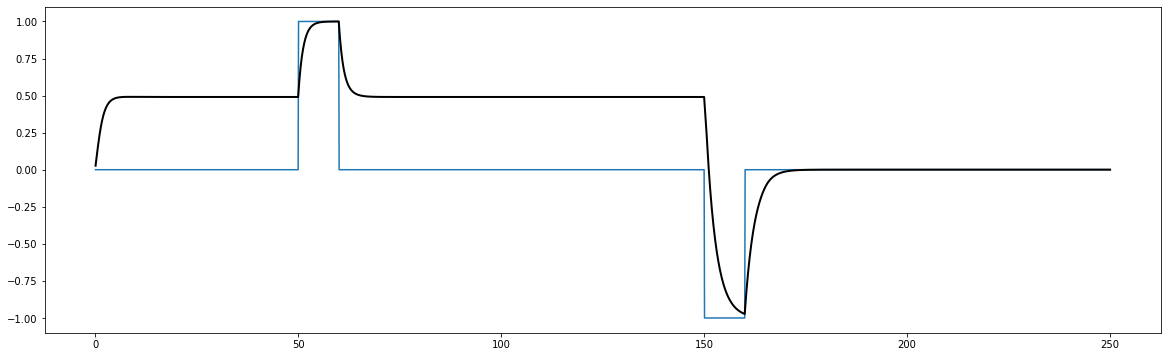

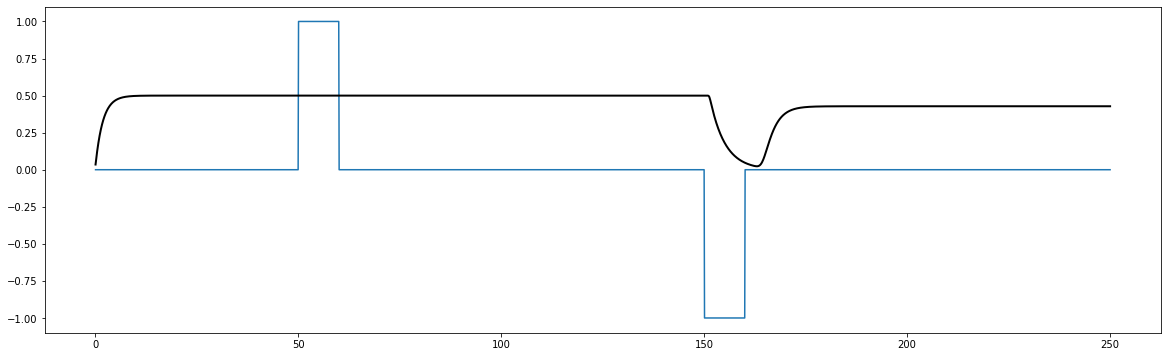

wc.exc [0.02694162 0.0501924  0.0730342  ... 0.00075119 0.00075119 0.00075119]
wc.inh [0.03503089 0.05903637 0.08203854 ... 0.42807678 0.42807678 0.42807678]
wc.inh 0.4999981060318109
target_low[:] = 0.000751
target_low_inh[:] = 0.428077
wc.params["exc_init"] = [[0.490690]]
wc.params["inh_init"] =[[0.499998]]
wc.exc 0.49069020830108123


In [11]:
#stimulus
#stimulus = np.zeros((1,1000))
#stimulus[0][200:400] = 2
#stimulus[0][10000:11000] = -1
#plt.plot(stimulus.T)

stimulus = np.zeros((1,2500))
stimulus[0][500:600] = 1
stimulus[0][1500:1600] = -1
#plt.plot(stimulus.T)

#wc.params["exc_init"] = [[0.000751]]
#wc.params["inh_init"] =[[0.428077]]


wc.params["control_term_E"] = stimulus
#wc.params["control_term_I"] = stimulus
wc.run()

plt.figure(figsize = (20, 6))
plt.plot(wc.t, stimulus.T)
plt.plot(wc.t, wc.exc[0].tolist(), c='k', lw = 2)
plt.show()

plt.figure(figsize = (20, 6))
plt.plot(wc.t, stimulus.T)
plt.plot(wc.t, wc.inh[0].tolist(), c='k', lw = 2)
plt.show()
#print(wc.params["a_exc"])
print("wc.exc",wc.exc[-1])
print("wc.inh",wc.inh[-1])
print("wc.inh",wc.inh[0][1300])
print('target_low[:] = {:f}'.format(wc.exc[-1][-1]))
print('target_low_inh[:] = {:f}'.format(wc.inh[-1][-1]))

print('wc.params["exc_init"] = [[{:f}]]'.format(wc.exc[0][1300]))
print('wc.params["inh_init"] =[[{:f}]]'.format(wc.inh[0][1300]))





print("wc.exc",wc.exc[0][1300])
#0.02788229

target_low = wc.exc[0]
target_low_inh = wc.inh[0]


In [218]:
def parameters_prep(exc_ext, inh_ext, duration=400, dt = 0.1, stimulus_exc = None, stimulus_inh = None):
    wc_p = WCModel()
    
    """
    if stimulus_exc or stimulus_inh is not provided, then stimulus is set to default stim.StepInput
    """
    
    print("exc_ext, inh_ext", exc_ext, inh_ext)
    
    wc_p.params["dt"] = dt

    wc_p.params['exc_ext'] = exc_ext
    wc_p.params['inh_ext'] = inh_ext
    wc_p.params['duration'] = duration

    stimulus = np.zeros((1,int(duration/wc_p.params["dt"])))
    stimulus[0][int(50/dt):int(60/dt)] = 1
    stimulus[0][int(140/dt):int(150/dt)] = -1

    wc_p.params["control_term_E"] = stimulus
    
    wc_p.run()
    
    
    plt.figure(figsize = (20, 6))
    plt.plot(stimulus.T)
    plt.plot(wc_p.exc[0].tolist(), c='k', lw = 2)
    plt.show()

    plt.figure(figsize = (20, 6))
    plt.plot(stimulus.T)
    plt.plot(wc_p.inh[0].tolist(), c='k', lw = 2)
    plt.show()

    
    #down-up 
    target_exc = np.zeros(int(duration/wc_p.params["dt"]))
    target_inh = np.zeros(int(duration/wc_p.params["dt"]))

    target_exc[:] = wc_p.exc[0][1300] #dt = 0.1
    target_inh[:] = wc_p.inh[0][1300] #dt = 0.1
    
    #target_exc[:] = wc_p.exc[0][2500] #dt = 0.05
    #target_inh[:] = wc_p.inh[0][2500] #dt  = 0.05
    exc_init = wc_p.exc[-1][-1]
    inh_init = wc_p.inh[-1][-1]
    
    
        
    #up-down 
    target_exc = np.zeros(int(duration/wc_p.params["dt"]))
    target_inh = np.zeros(int(duration/wc_p.params["dt"]))

    exc_init = wc_p.exc[0][1300] #dt = 0.1
    inh_init = wc_p.inh[0][1300] #dt = 0.1
    
    #target_exc[:] = wc_p.exc[0][2500] #dt = 0.05
    #target_inh[:] = wc_p.inh[0][2500] #dt  = 0.05
    target_exc[:] = wc_p.exc[-1][-1]
    target_inh[:] = wc_p.inh[-1][-1]
    
    
    
    
    #w_array = np.linspace(0, 1, 15)
    w_array = [1,3,5,9,1]
    
    wc = WCModel()
    wc.params["dt"] = dt
    for i in w_array:
    
        wc.params['exc_ext'] = exc_ext
        wc.params['inh_ext'] = inh_ext
        wc.params['duration'] = duration
        
        if stimulus_exc is None:
            stimulus_exc = stim.StepInput(step_size=0.5,  start=195, end=203, n=1).to_model(wc)
        if stimulus_inh is None:
            stimulus_inh = stim.StepInput(step_size=-0.5,  start=195, end=203, n=1).to_model(wc)
        stimulus_zeros = np.zeros((1,duration*10))
        
        #print(len(stimulus_exc[0]))
        print("w", i)
        u_e, u_i = optimal_control(wc, target_exc,target_inh, stimulus_exc, stimulus_inh, exc_init, inh_init, n_iter = 400, plot_freq =50, w = [0,i], a = 0.9*int(duration/wc.params["dt"]), debug = False)
        stimulus_exc = u_e
        stimulus_inh = u_i
    data = [
        target_exc.T,
        wc.exc[0].tolist(),
        u_e.T,
        target_inh.T,
        wc.inh[0].tolist(),
        u_i.T
    ]
    plt.figure(figsize = (20, 6))
    plt.plot(wc_p.t, u_i.T)
    plt.show()
    
    filename = str(exc_ext)+"_"+str(inh_ext)+'test.npz'
    np.savez(filename, target_exc=target_exc.T, exc = wc.exc[0].tolist(), stimulus_exc = u_e.T,
             target_inh = target_inh.T, inh = wc.inh[0].tolist(), stimulus_inh = u_i.T)
    #np.save(filename, np.asarray(data), allow_pickle=True)


In [97]:
ext_list_full = [(3,3),(3,4),(3,5),(3,6),(3,7),(3,8),(3,9),(4,5),(4,6),(4,7),(4,8),(4,9),(5,6),(5,7),(5,8),(5,9),(6,8),(6,9)]
ext_list = [(5,8),(5,9)]

for a,b in ext_list:
    print(a,b)

5 8
5 9


exc_ext, inh_ext 5 8


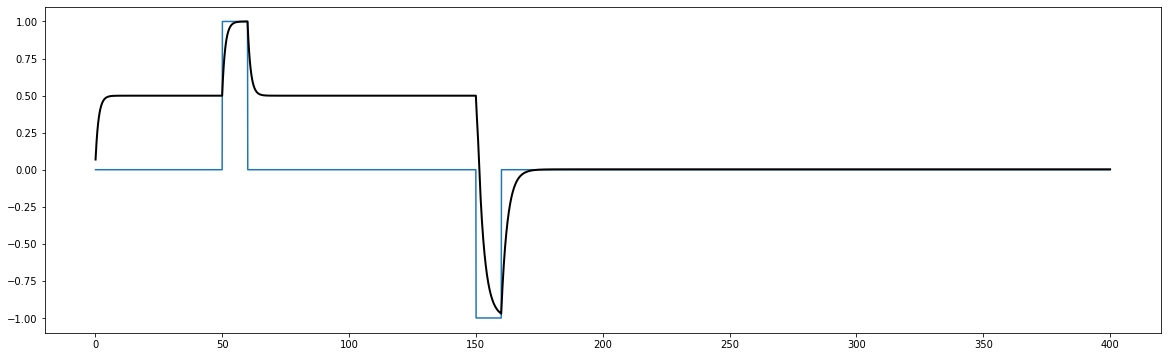

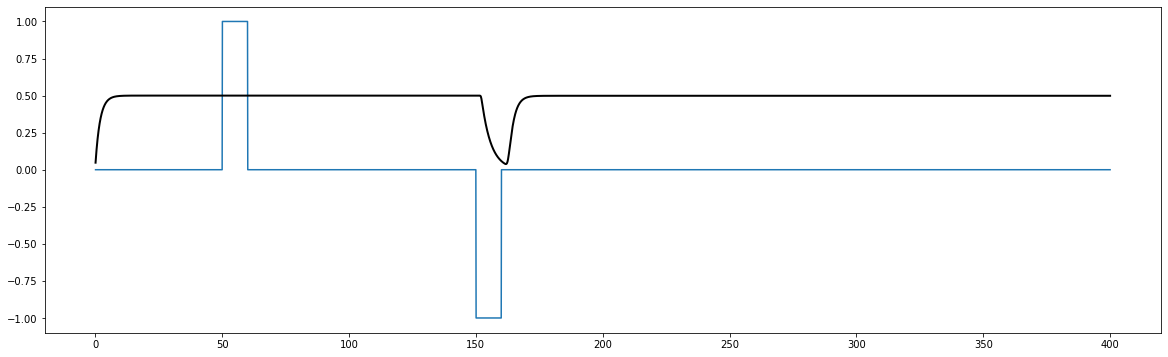

w 1
___
iteration: 0


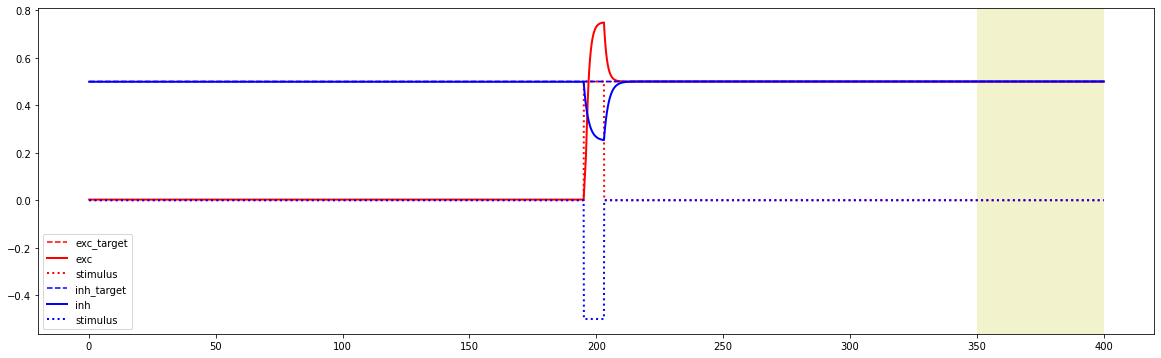

gradient:


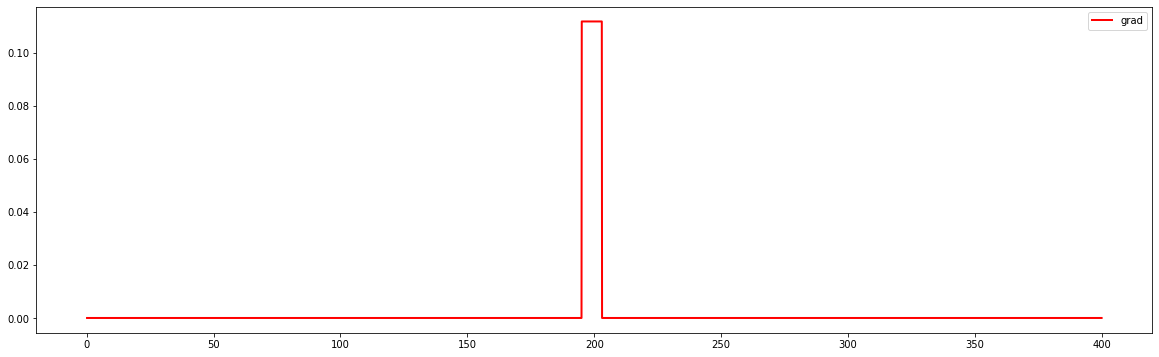

___
iteration: 20


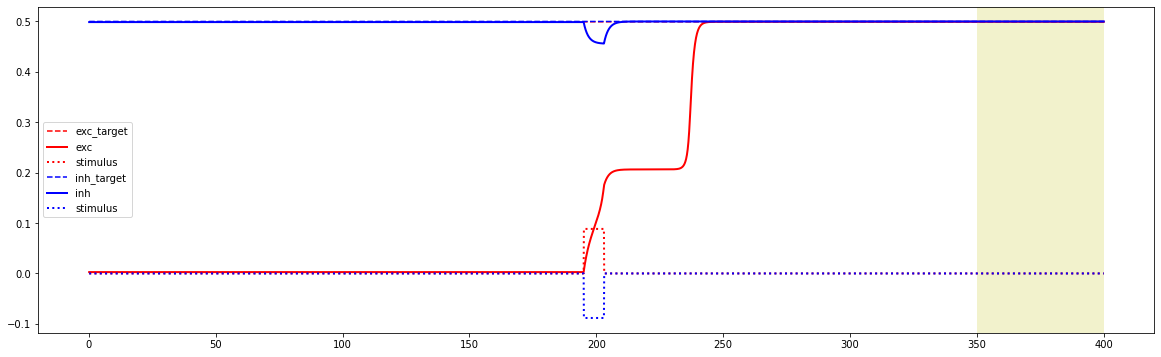

gradient:


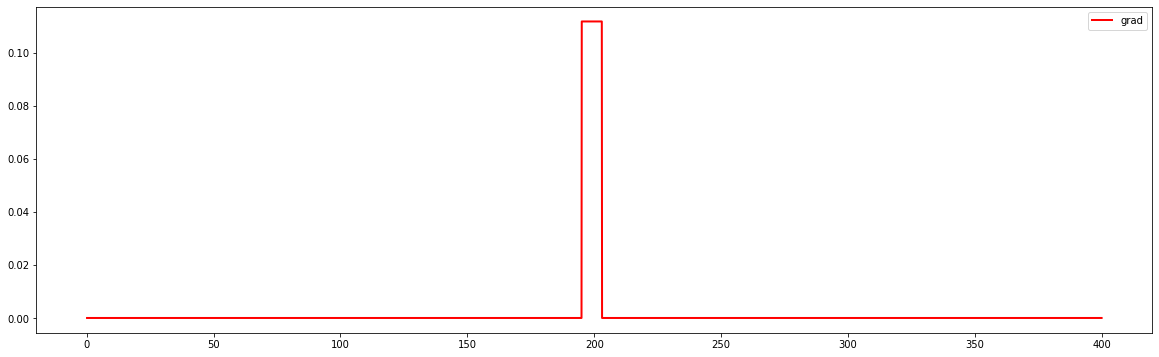

___
iteration: 40


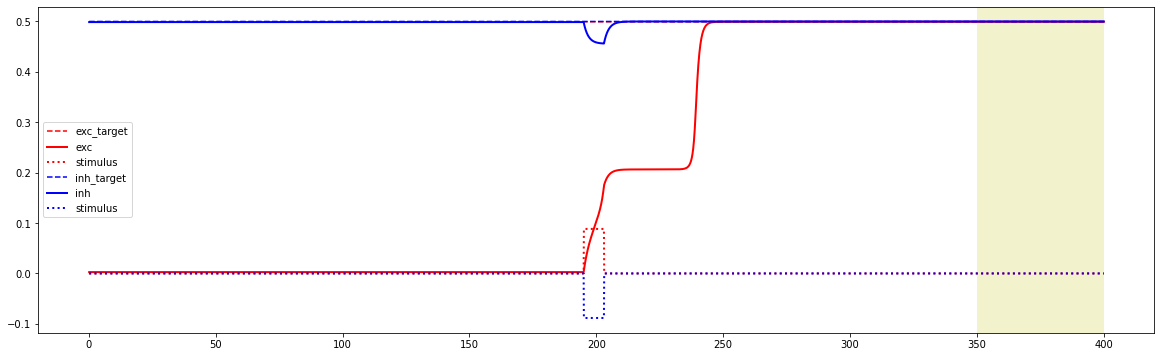

gradient:


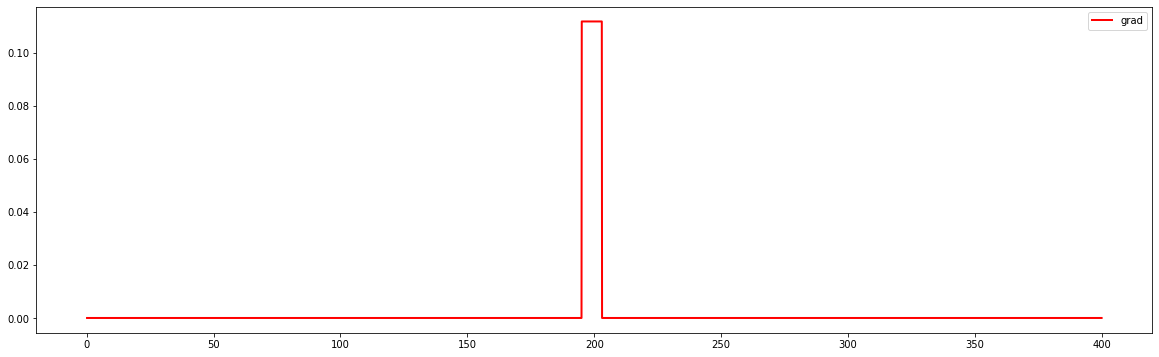

___
iteration: 60


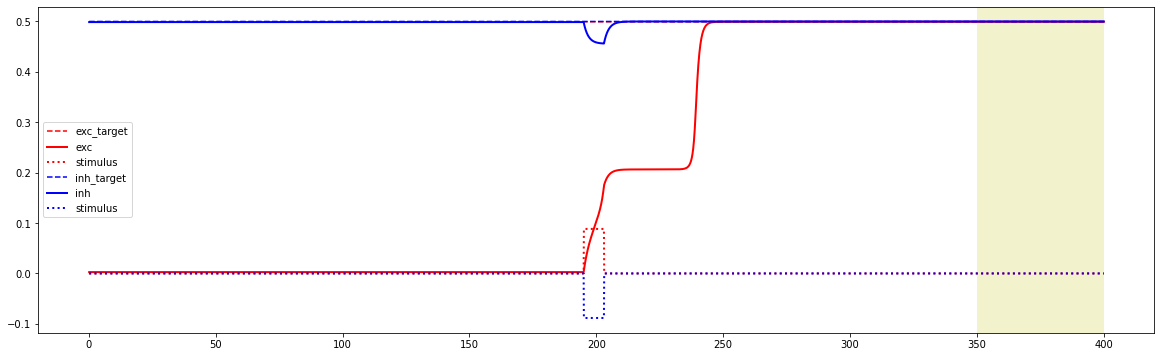

gradient:


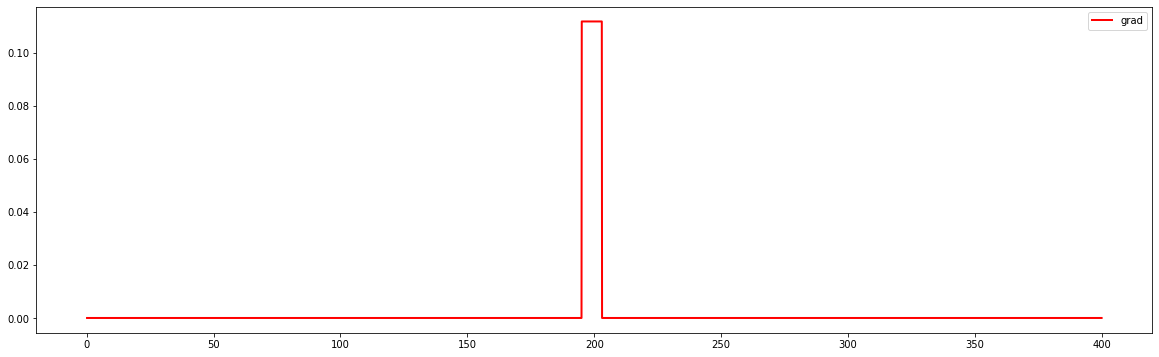

___
iteration: 80


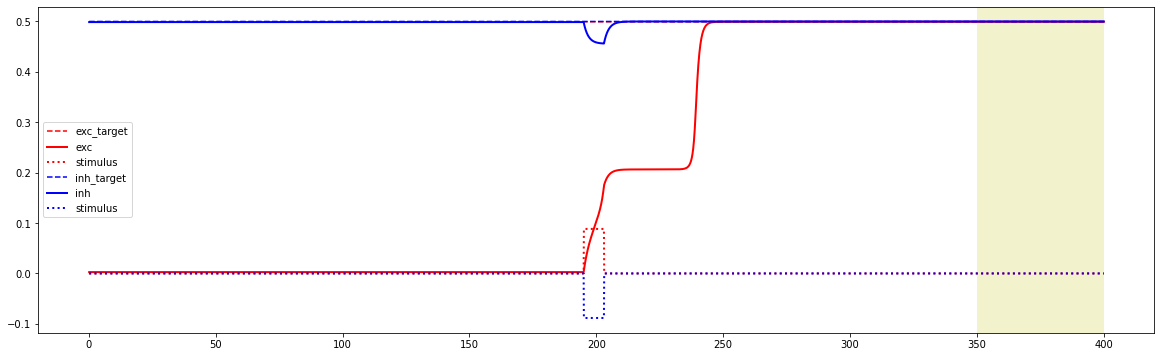

gradient:


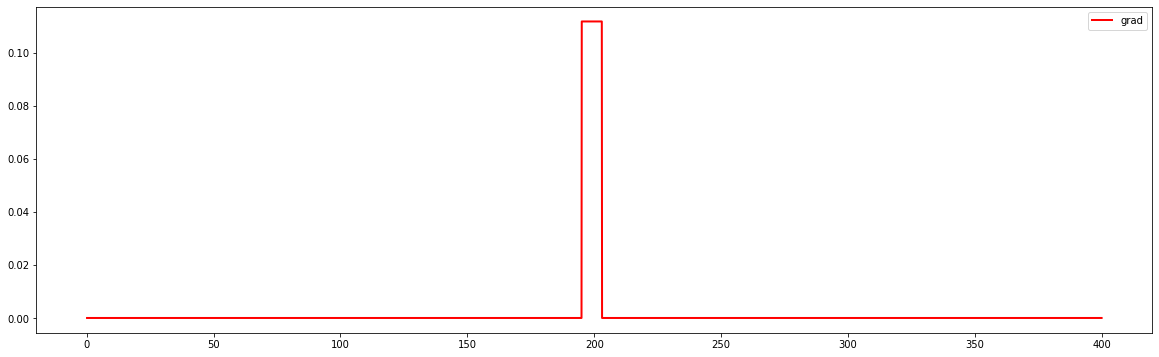

___
iteration: 100


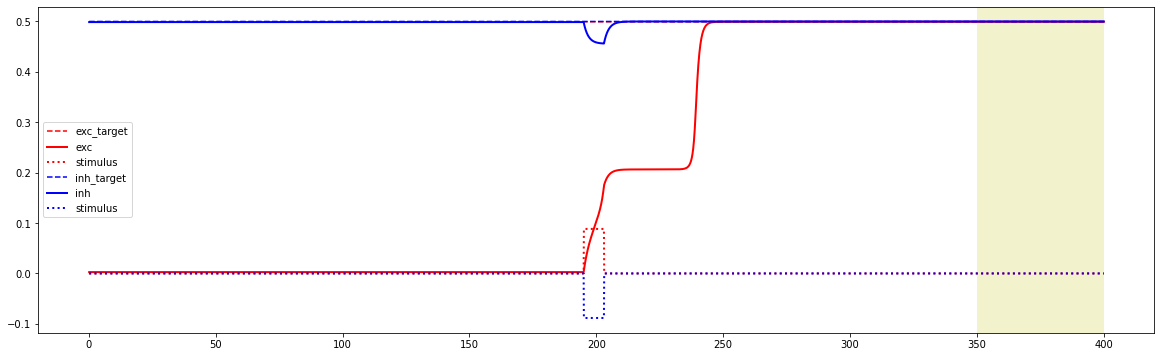

gradient:


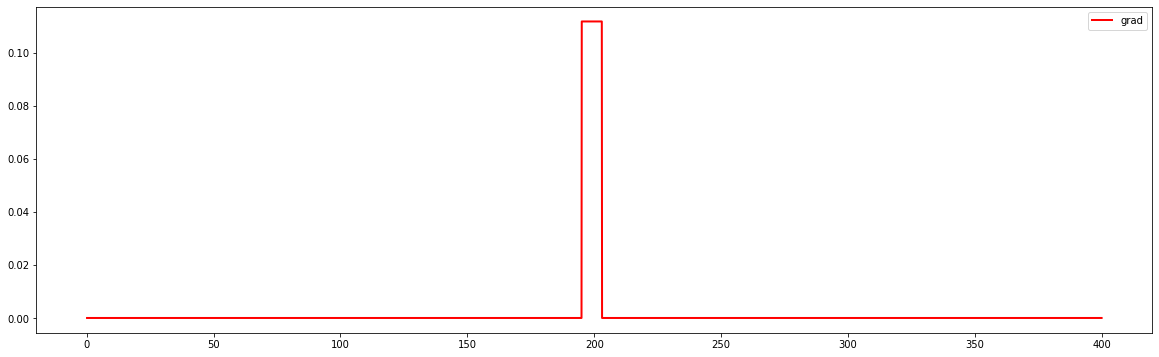

___
iteration: 120


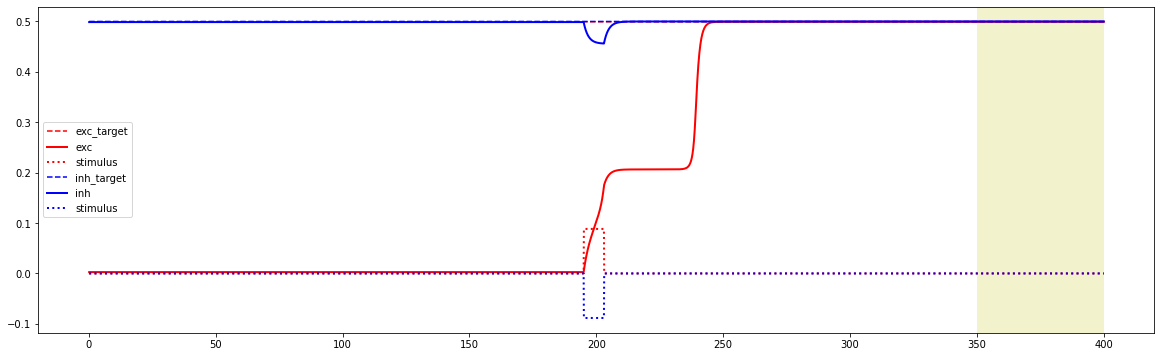

gradient:


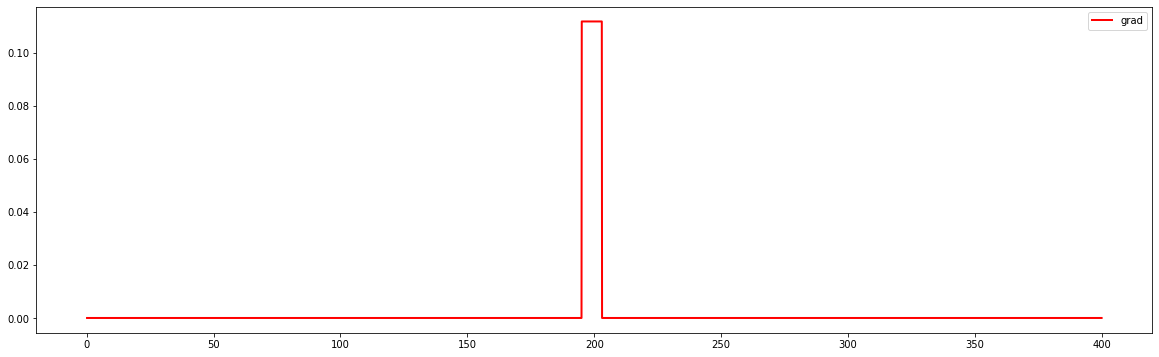

___
iteration: 140


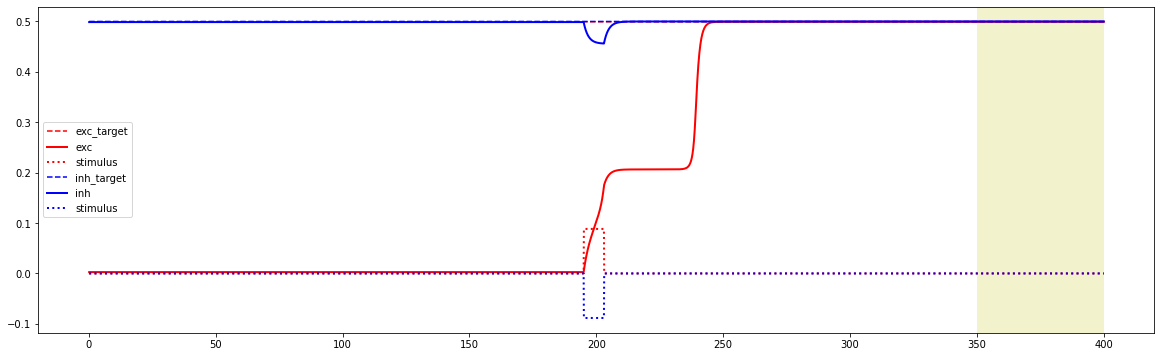

gradient:


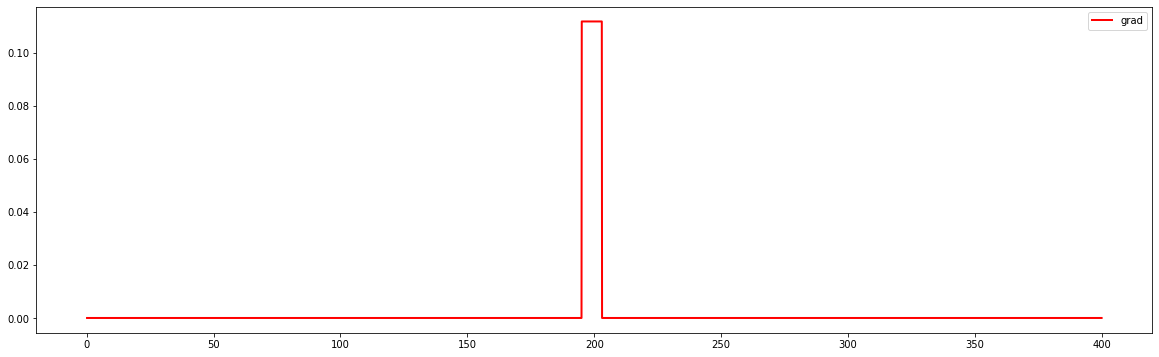

___
iteration: 160


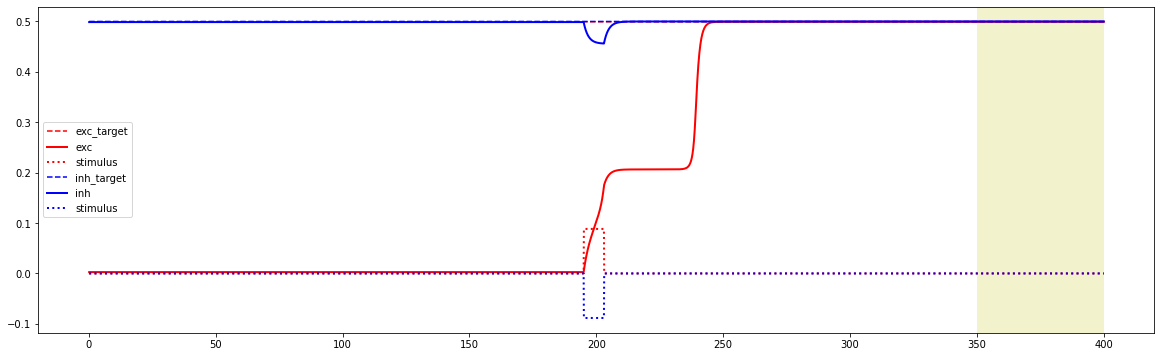

gradient:


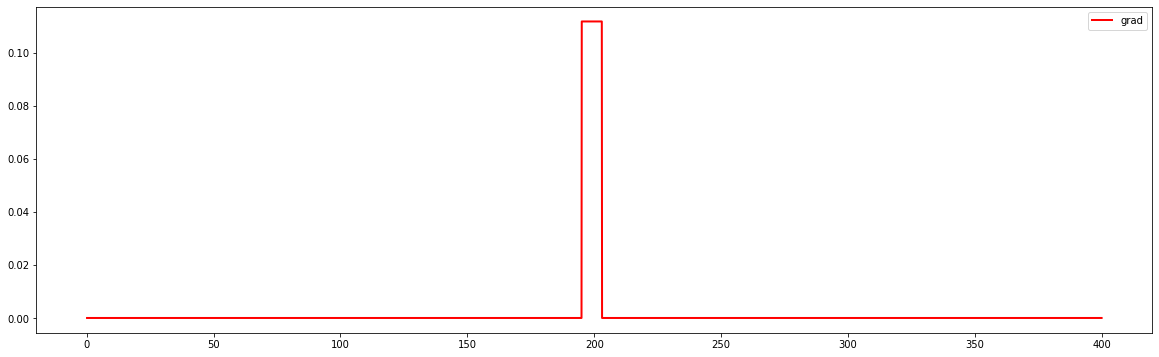

___
iteration: 180


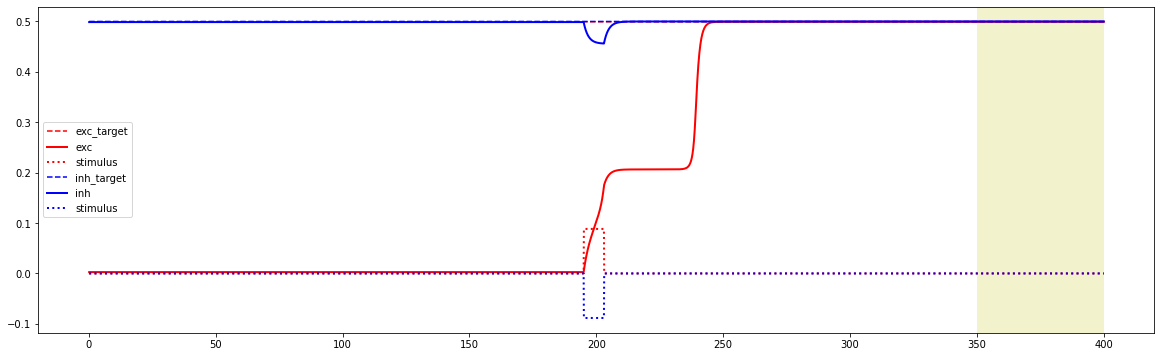

gradient:


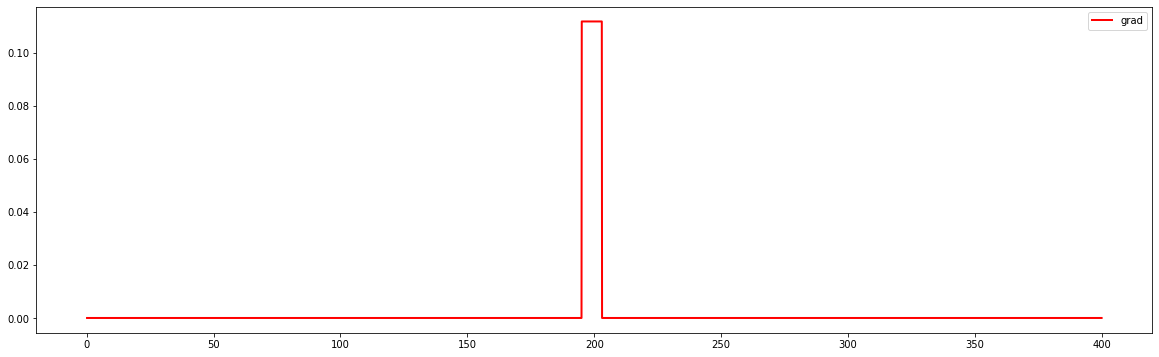

___
iteration: 200


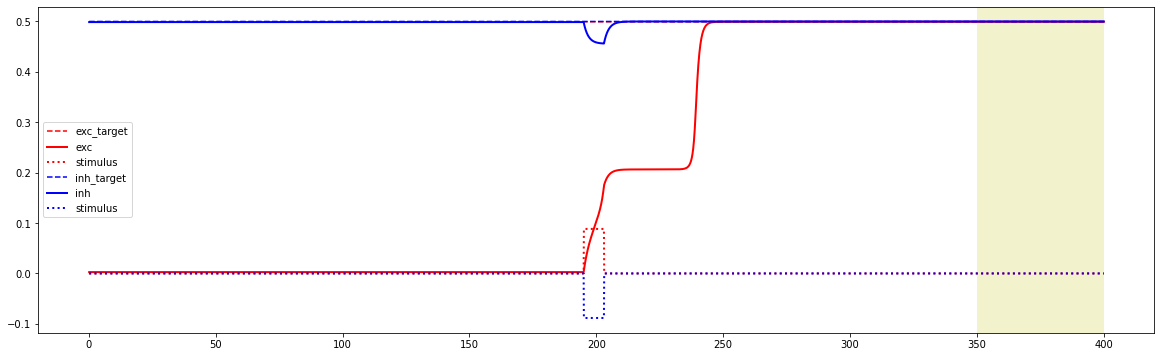

gradient:


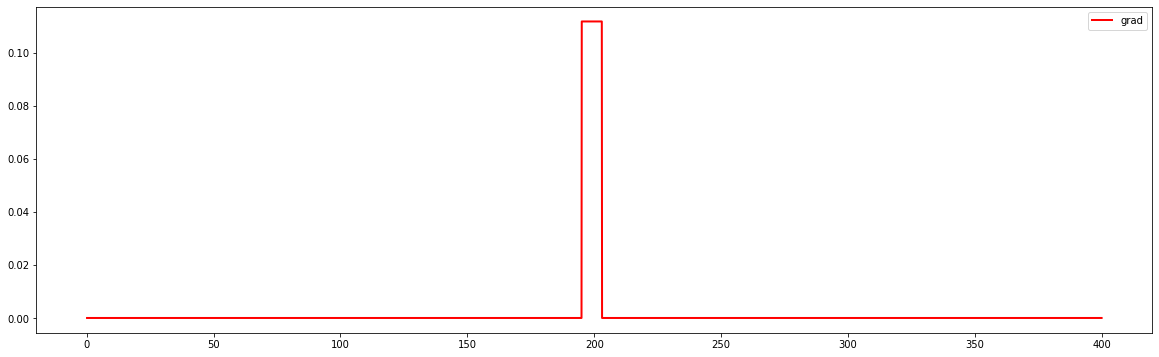

___
iteration: 220


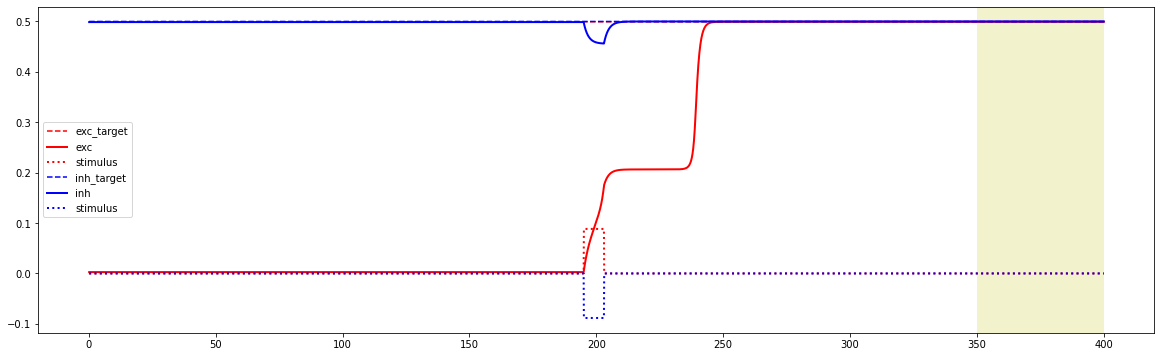

gradient:


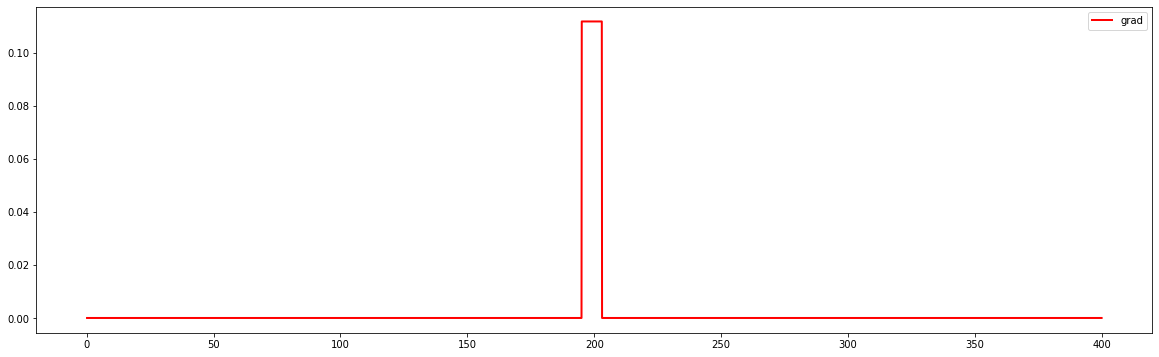

___
iteration: 240


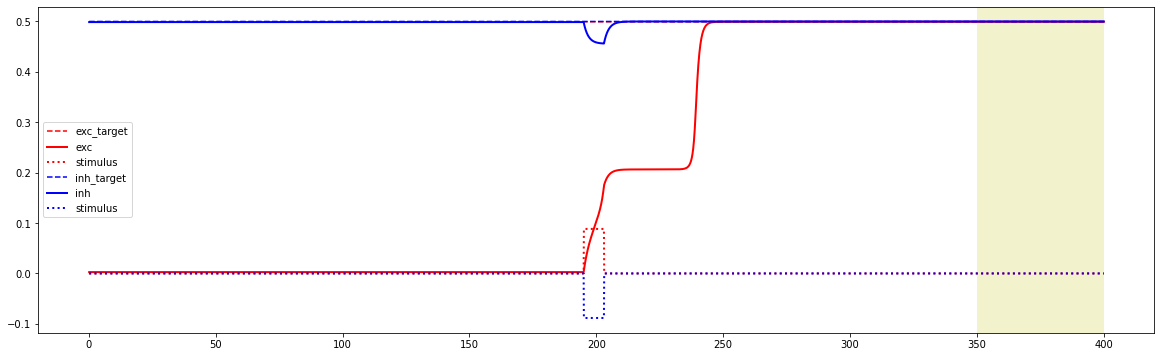

gradient:


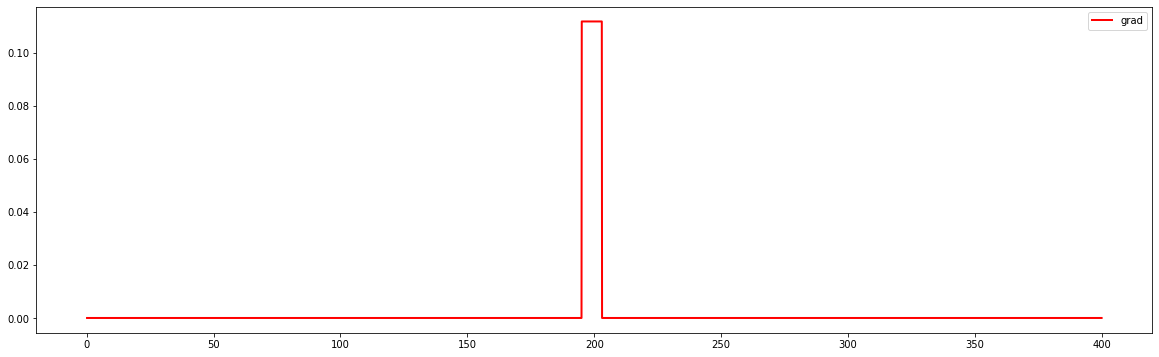

___
iteration: 260


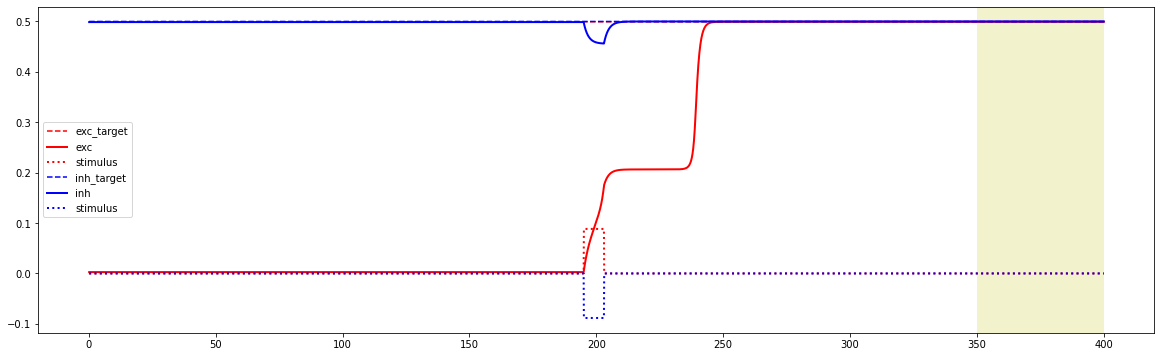

gradient:


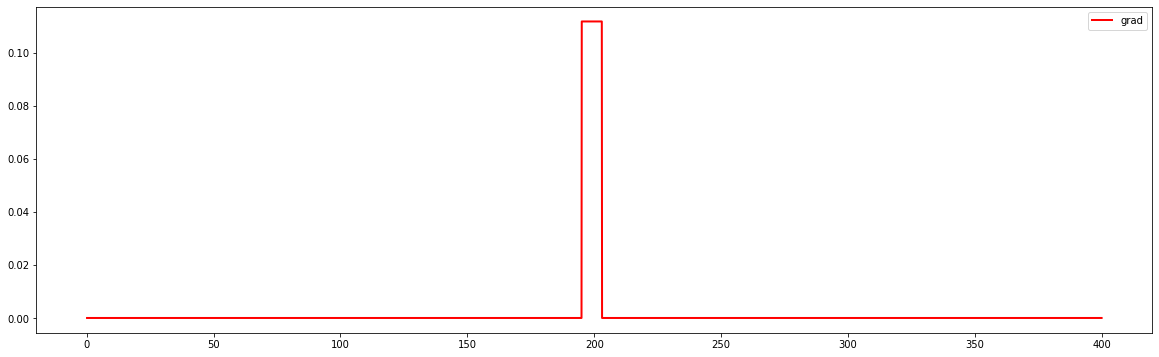

___
iteration: 280


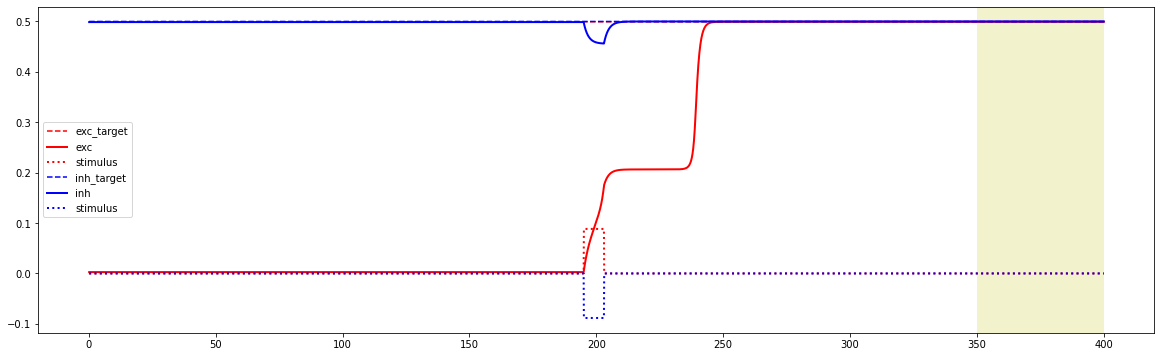

gradient:


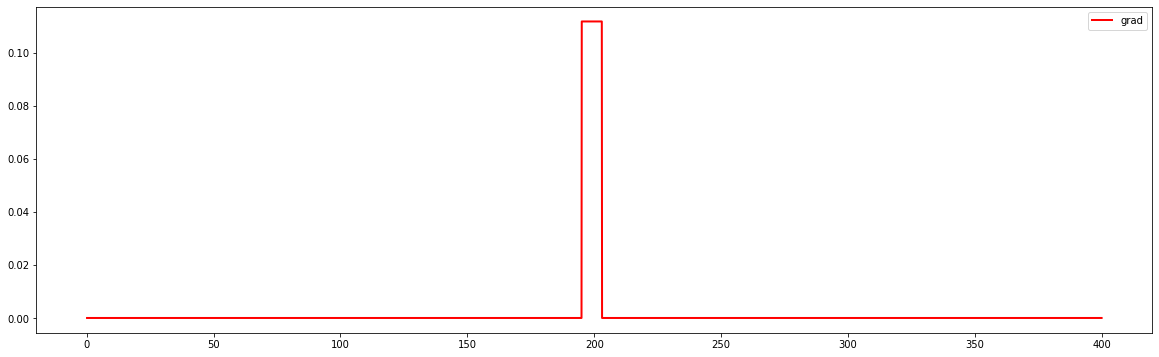

___
iteration: 300


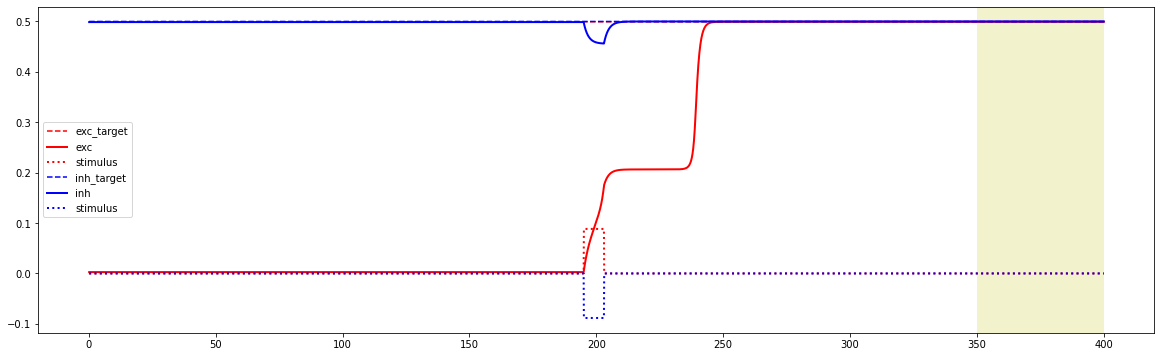

gradient:


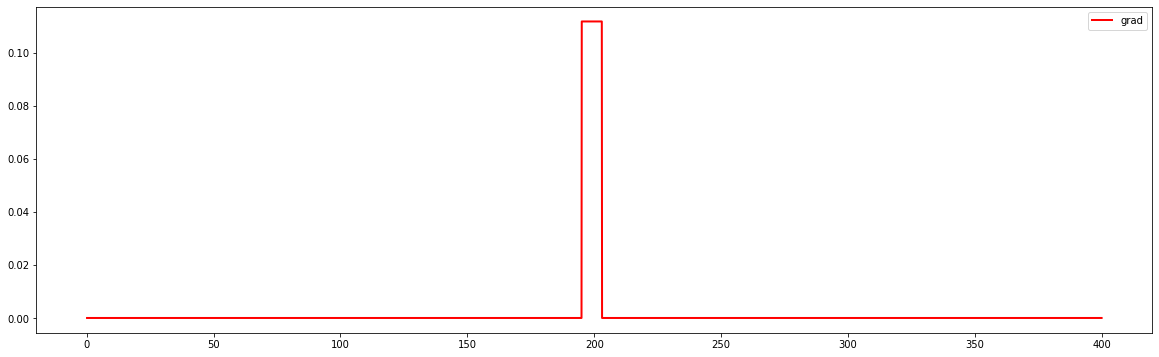

___
iteration: 320


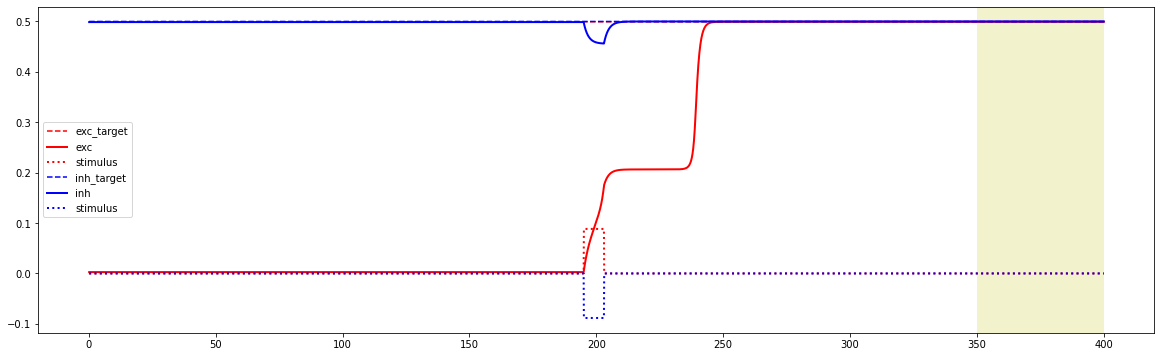

gradient:


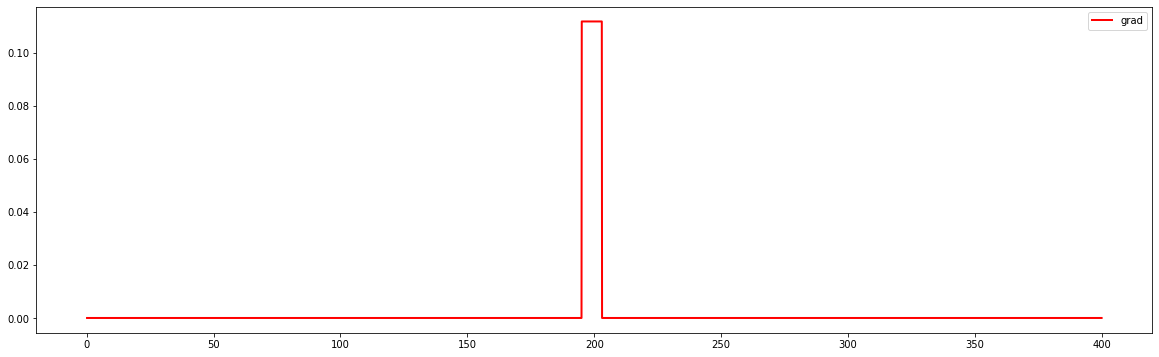

___
iteration: 340


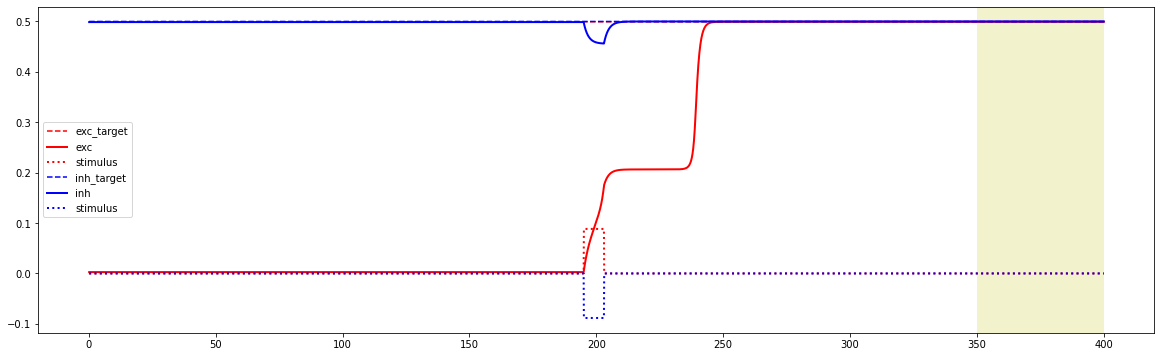

gradient:


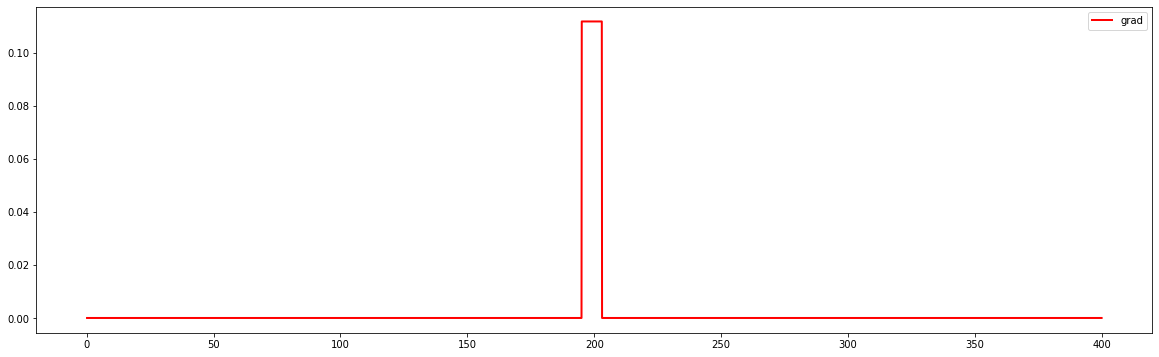

___
iteration: 360


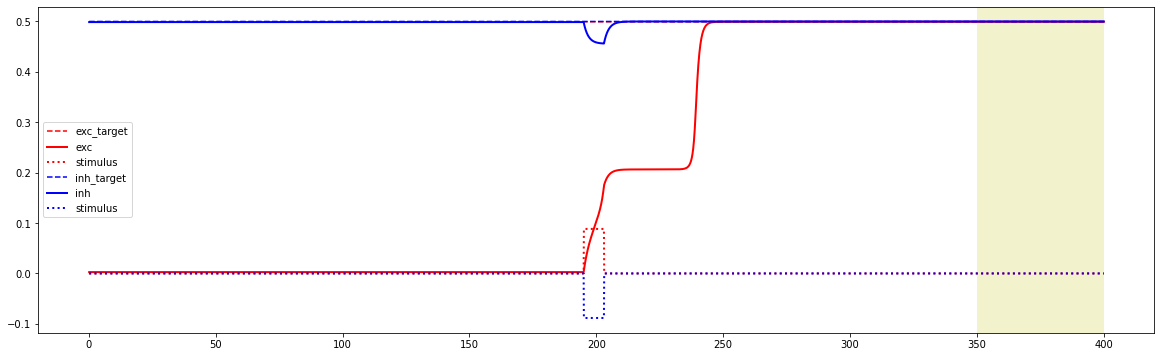

gradient:


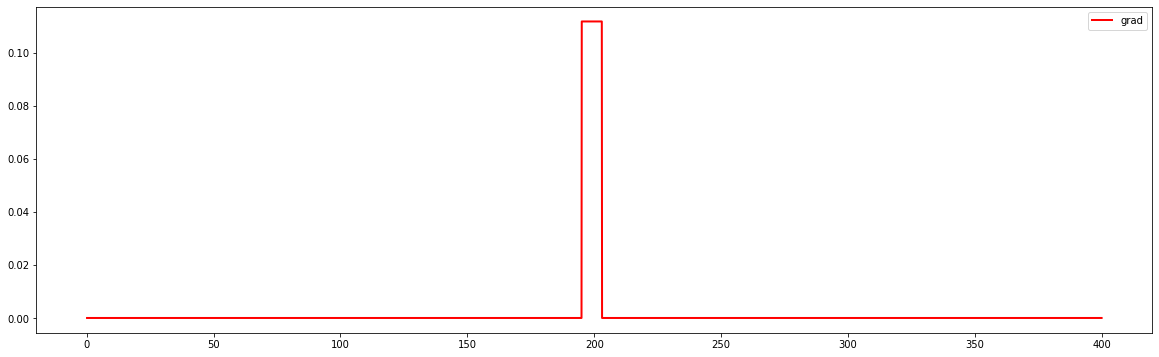

___
iteration: 380


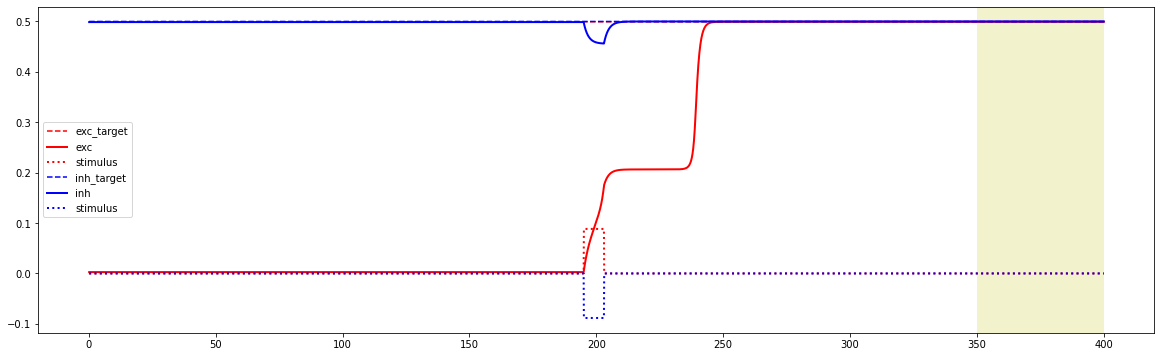

gradient:


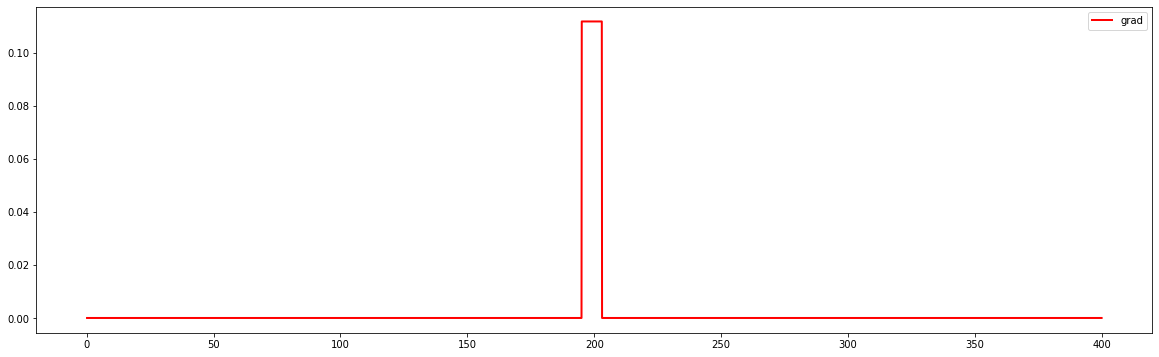

w 90
___
iteration: 0


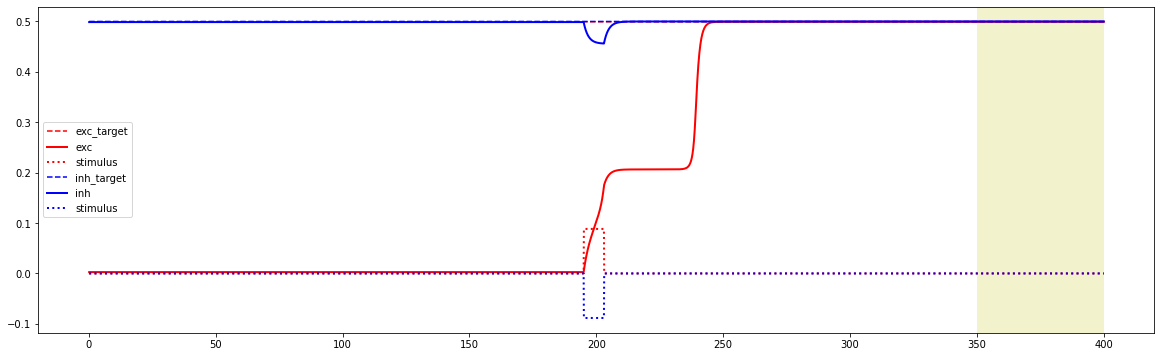

gradient:


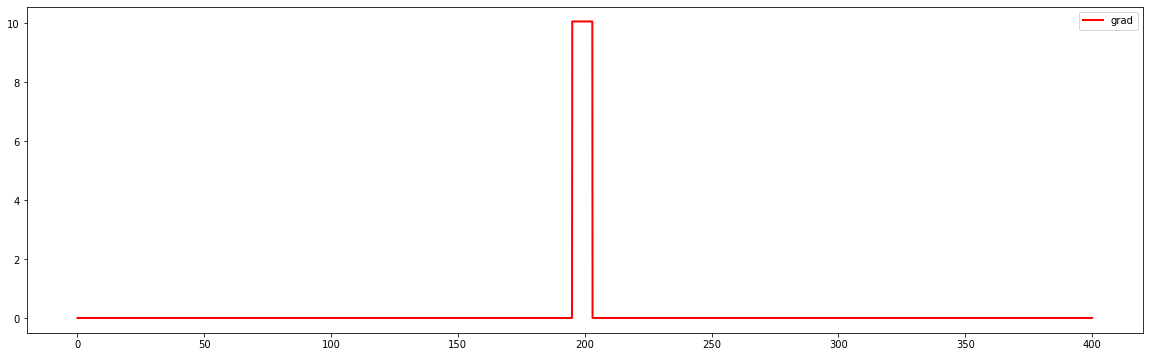

___
iteration: 20


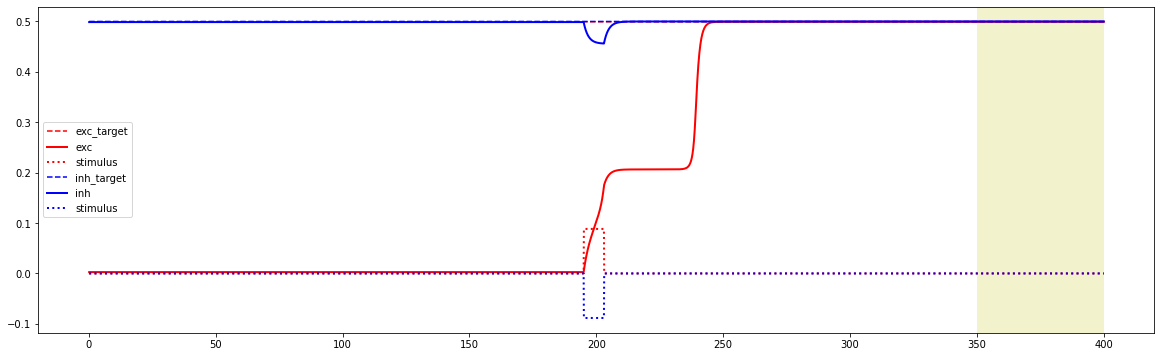

gradient:


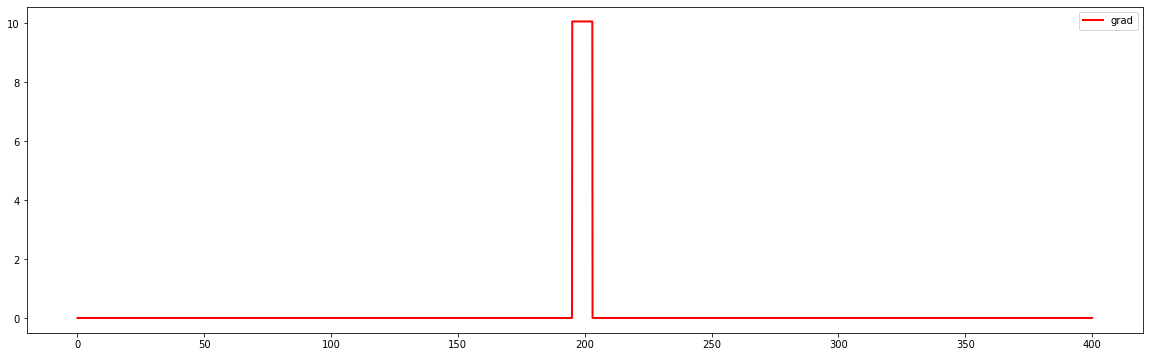

___
iteration: 40


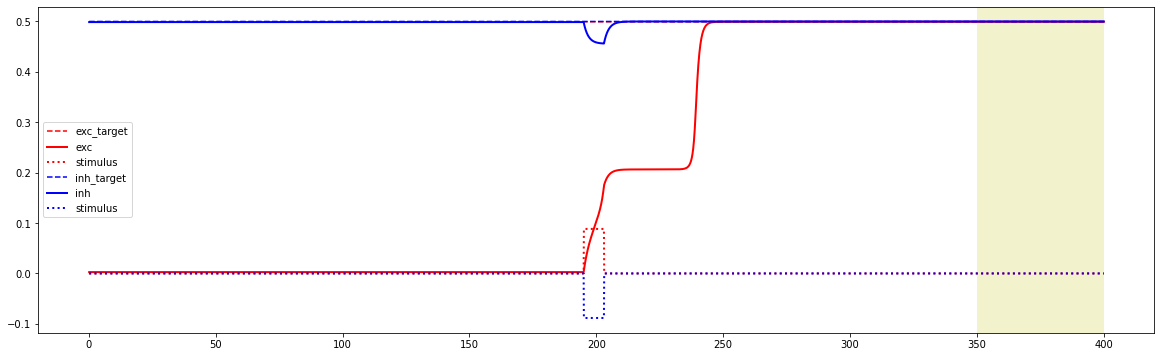

gradient:


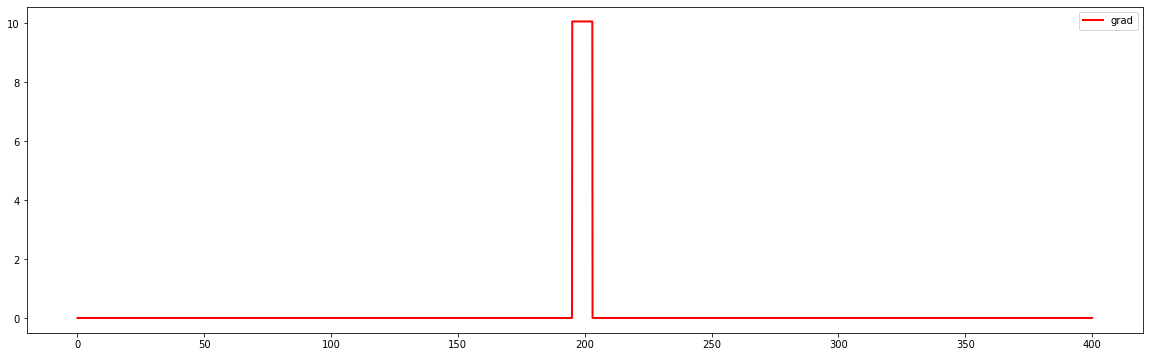

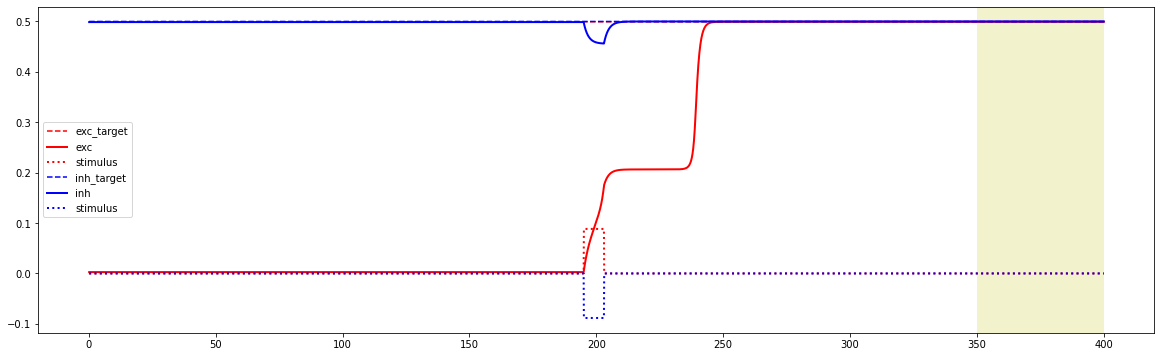

w 1
___
iteration: 0


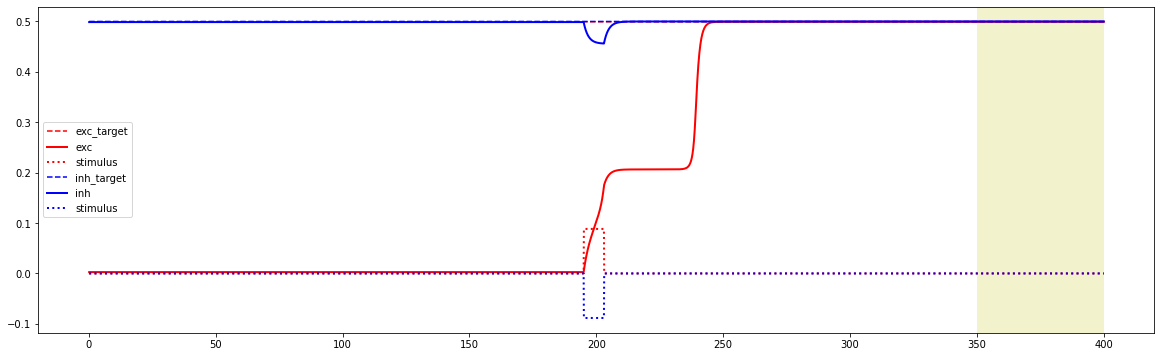

gradient:


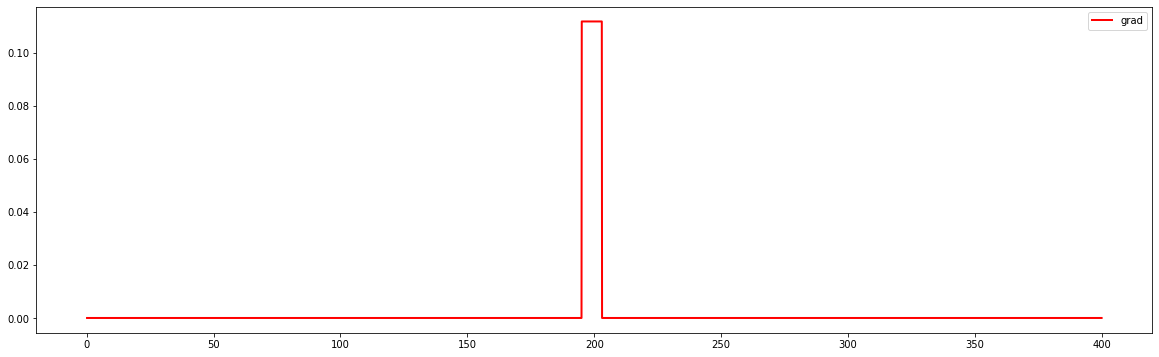

___
iteration: 20


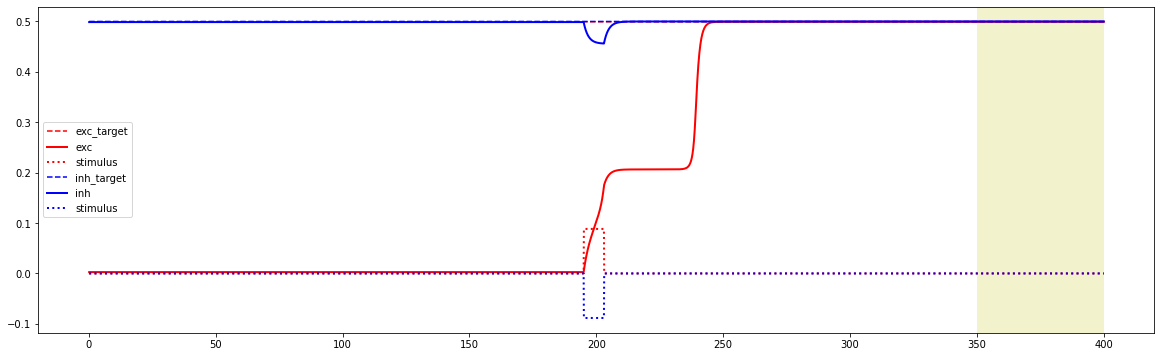

gradient:


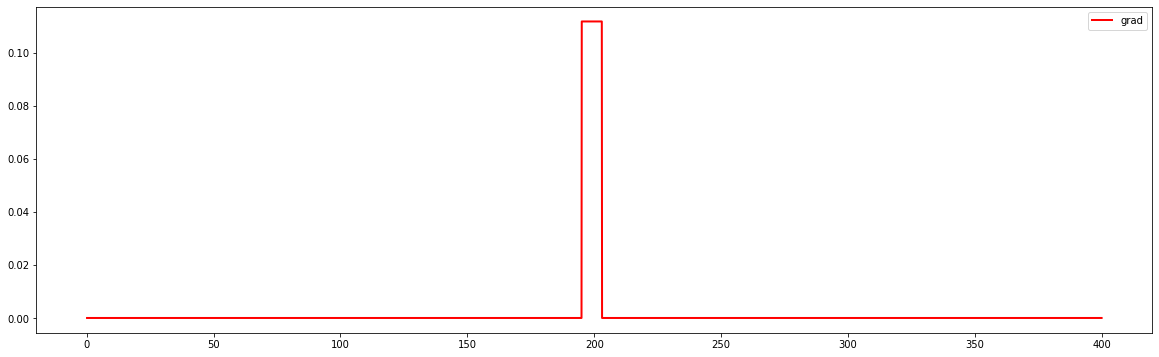

___
iteration: 40


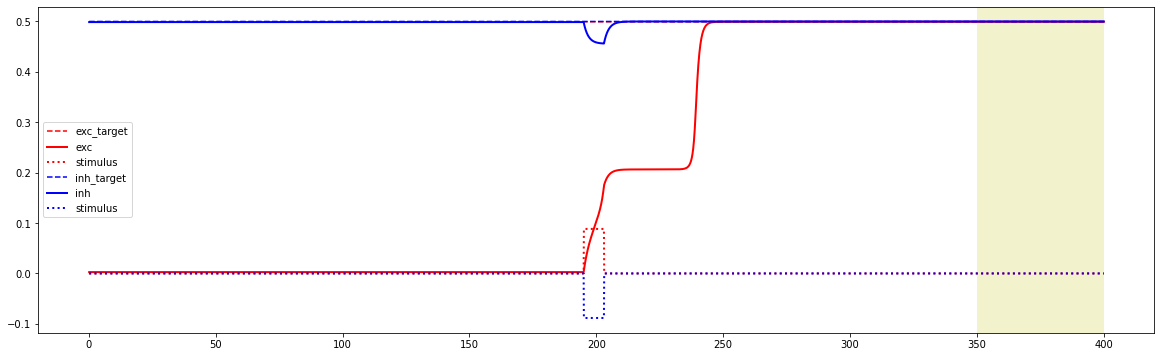

gradient:


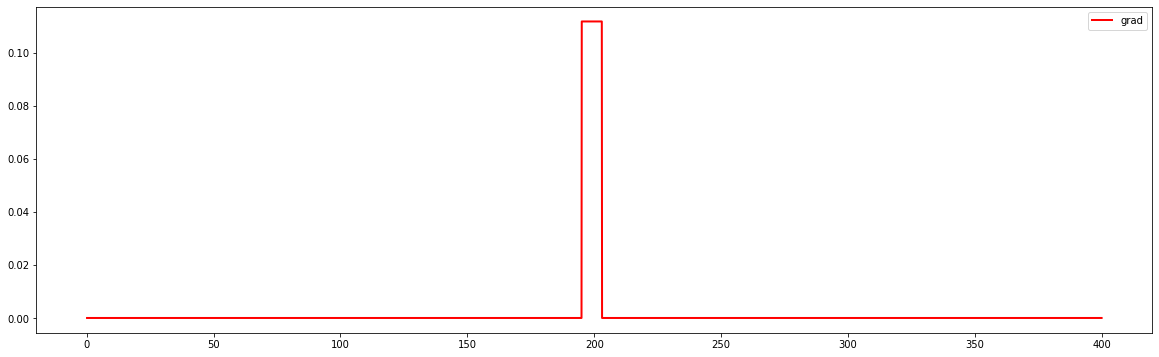

___
iteration: 60


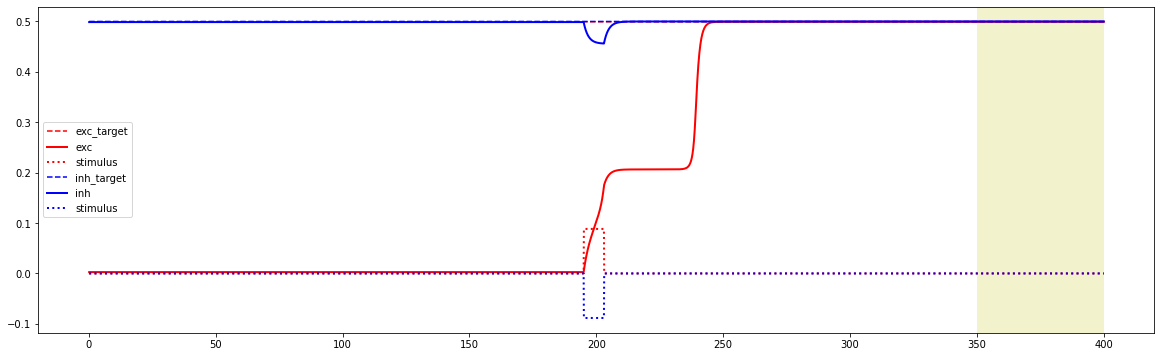

gradient:


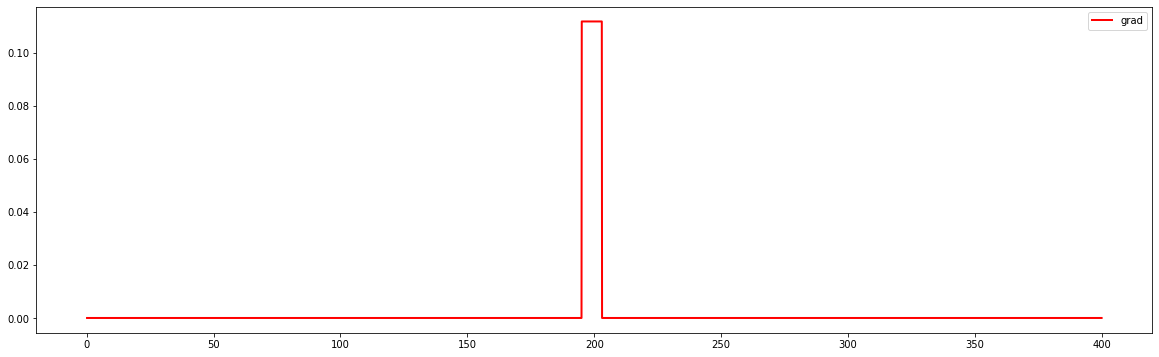

___
iteration: 80


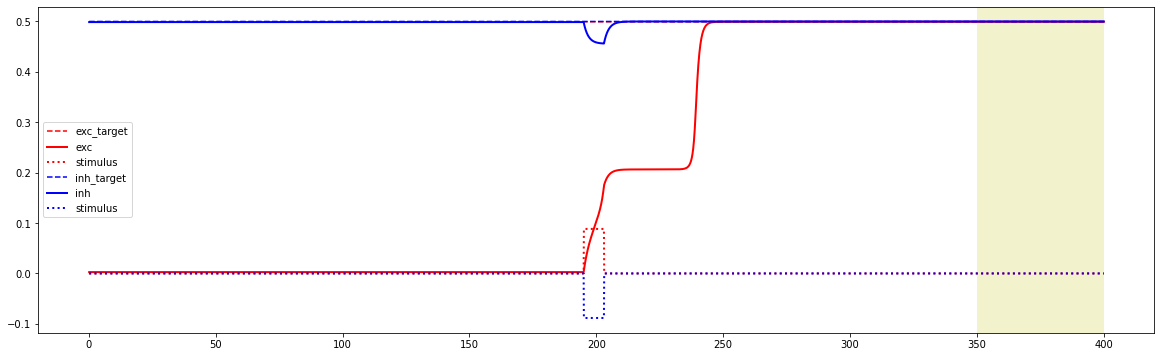

gradient:


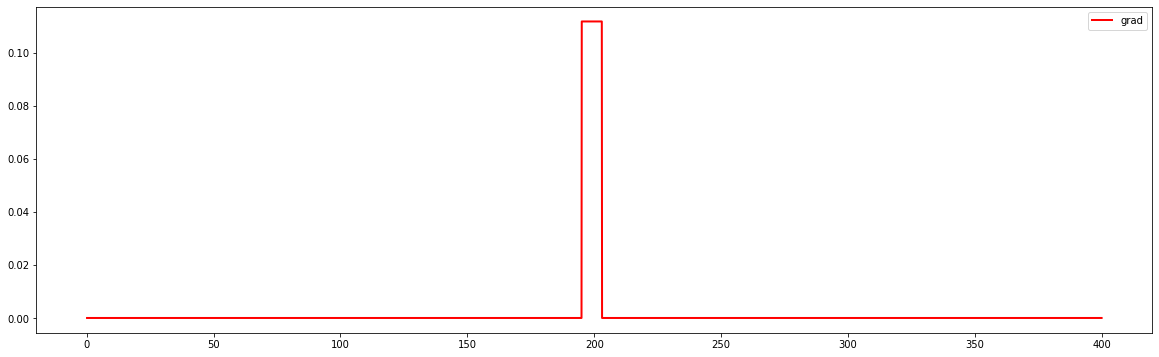

___
iteration: 100


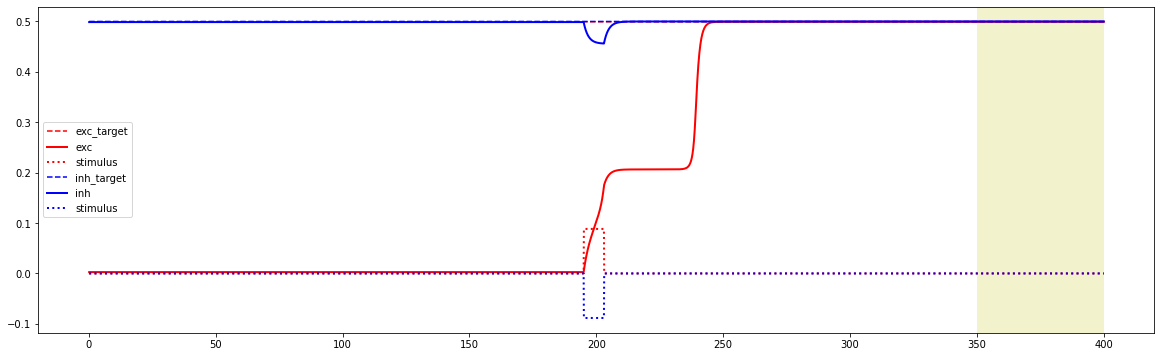

gradient:


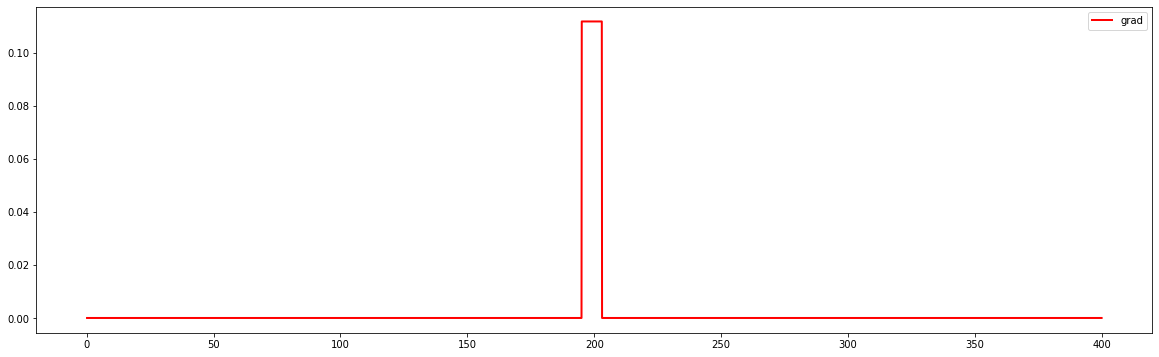

___
iteration: 120


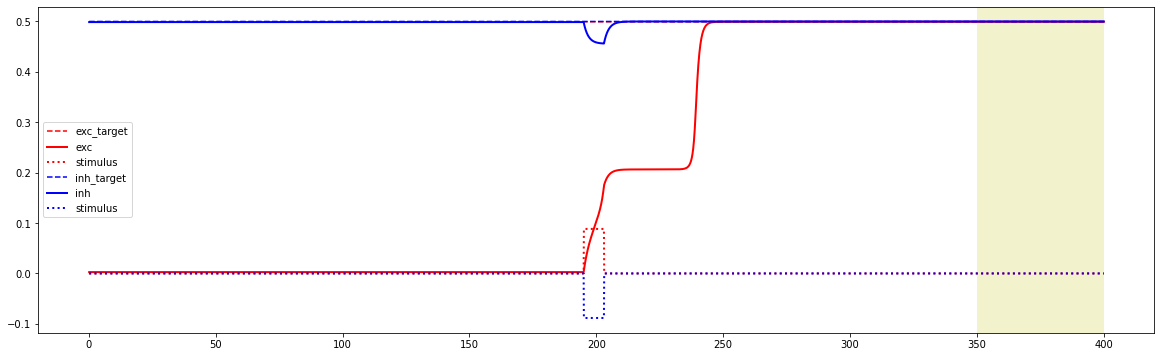

gradient:


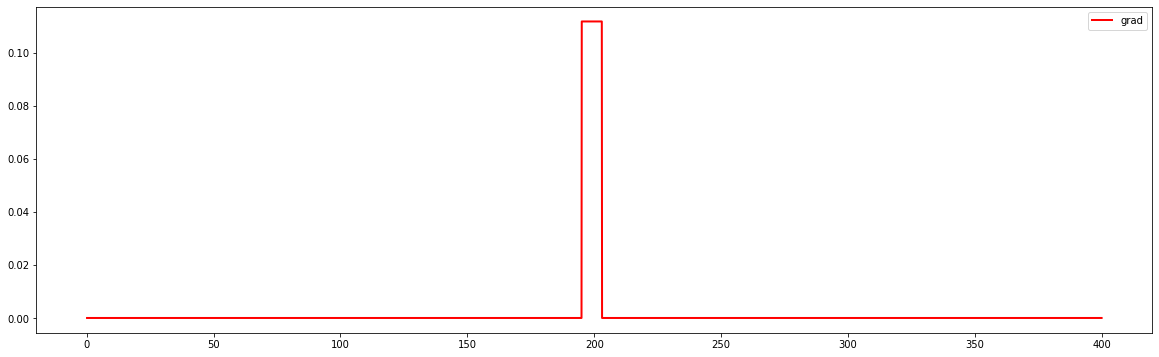

___
iteration: 140


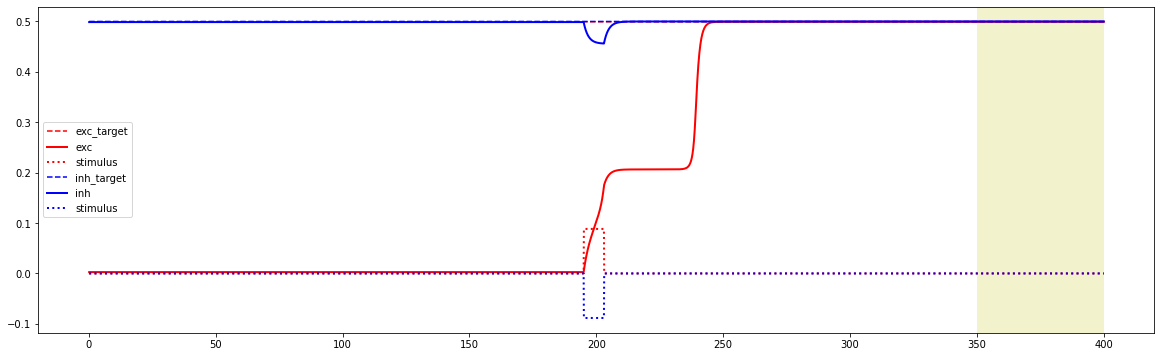

gradient:


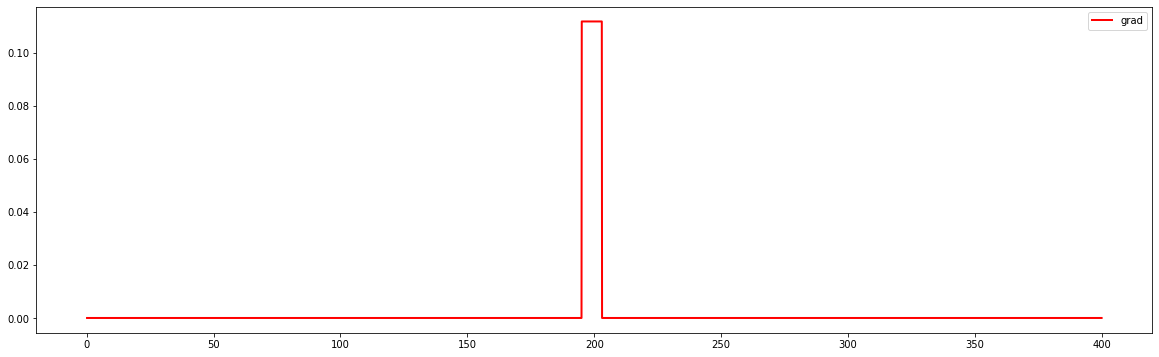

___
iteration: 160


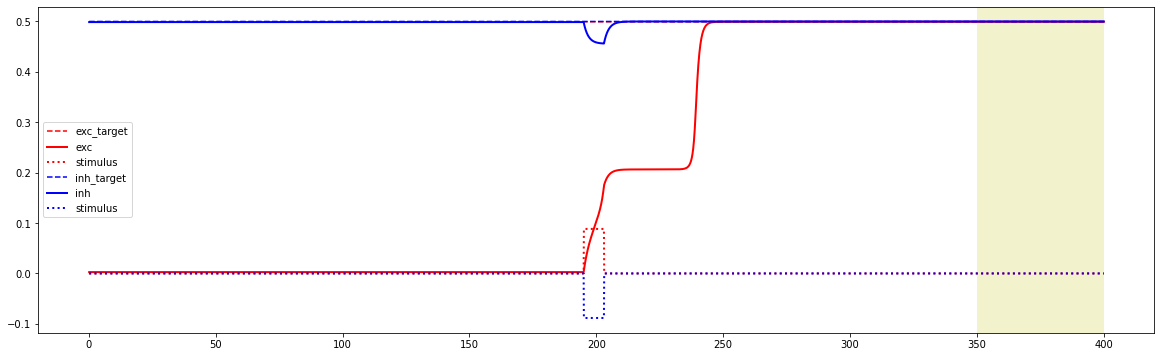

gradient:


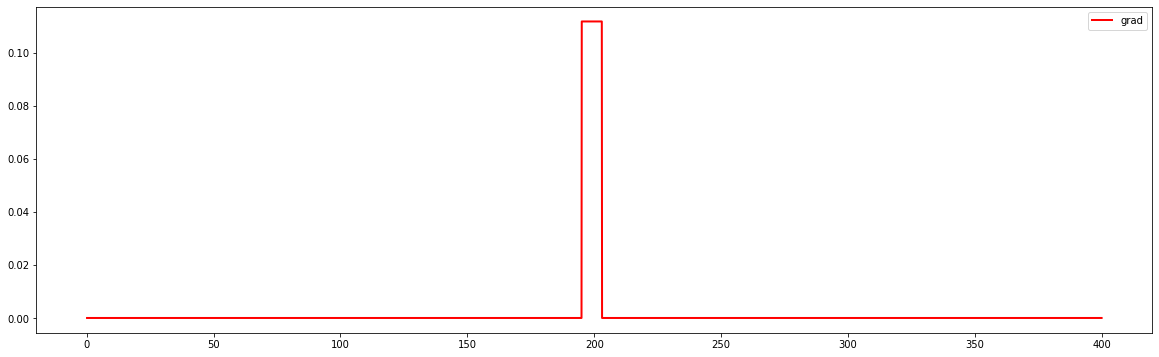

___
iteration: 180


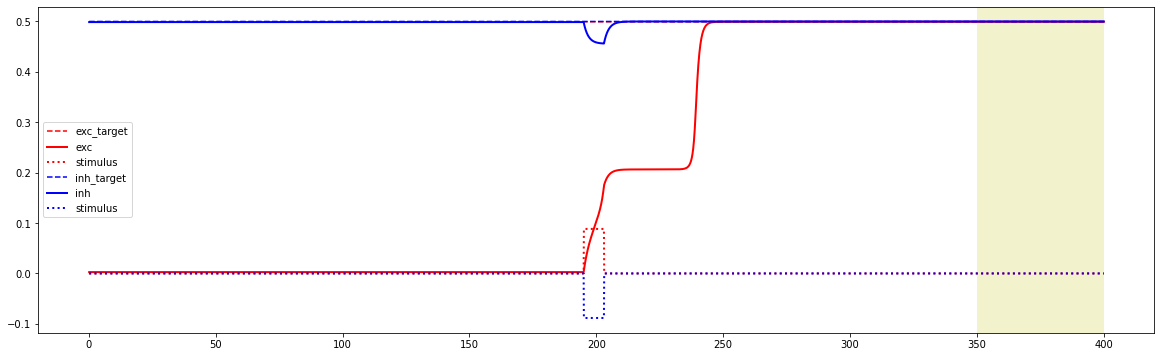

gradient:


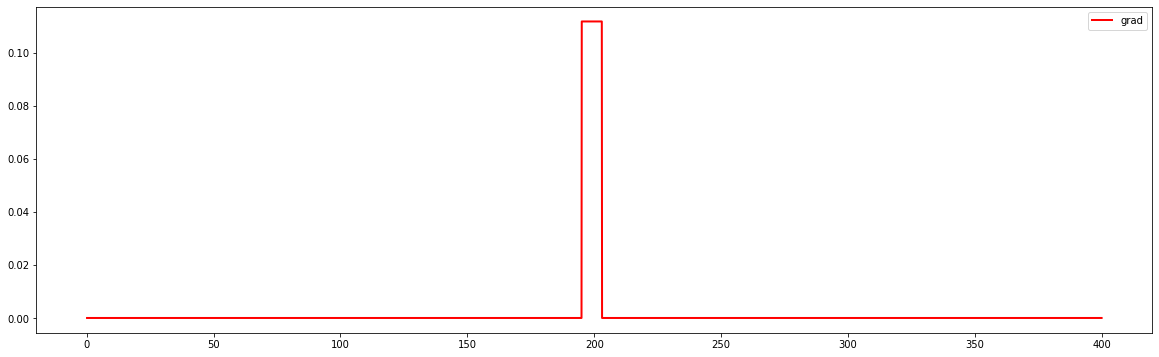

___
iteration: 200


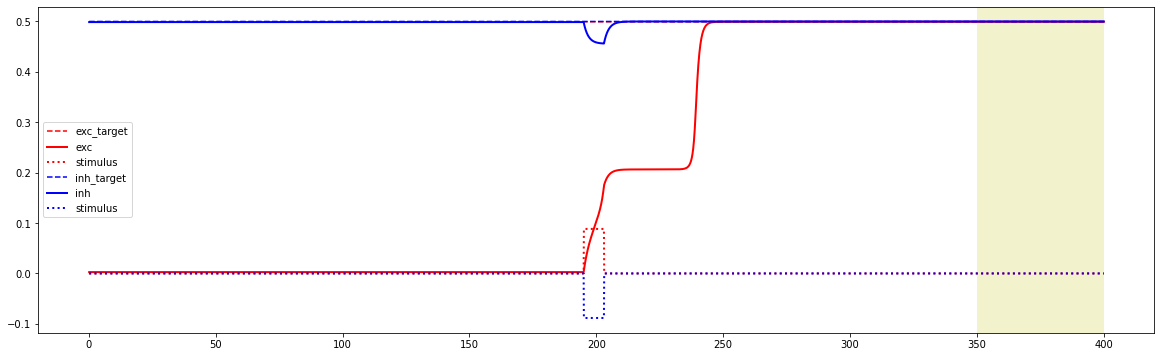

gradient:


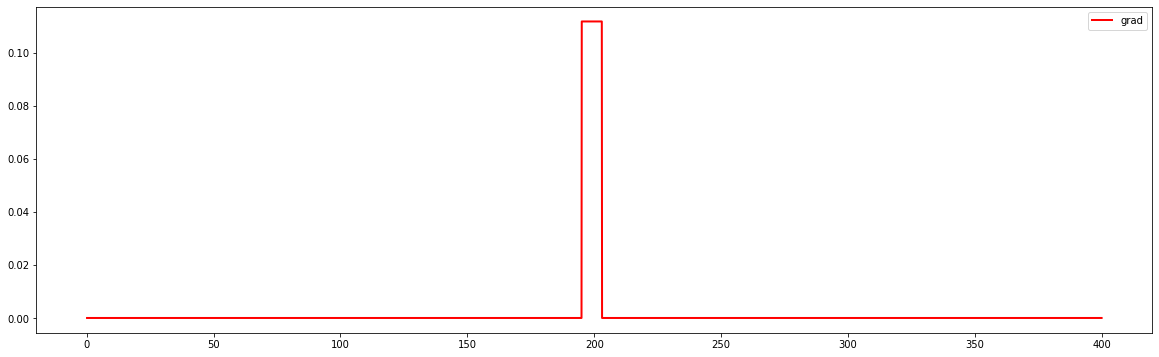

___
iteration: 220


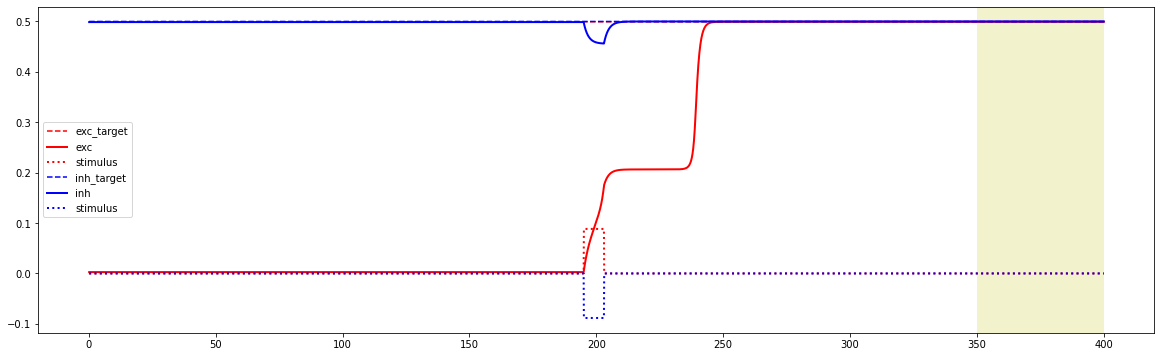

gradient:


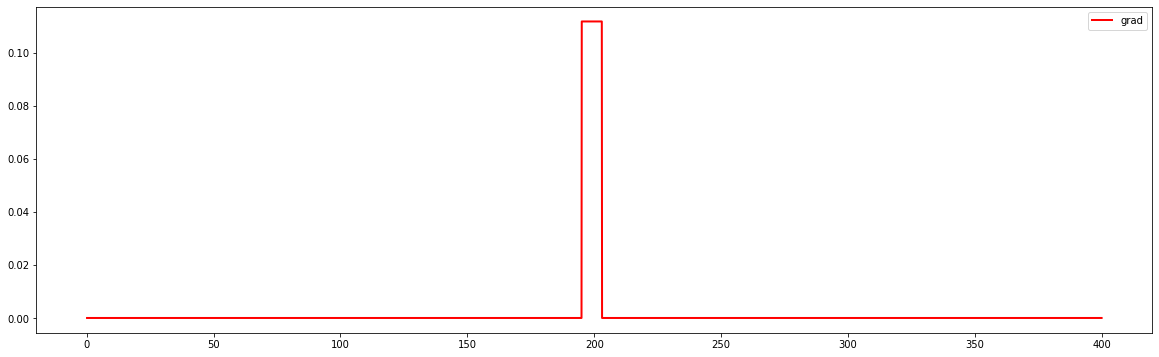

___
iteration: 240


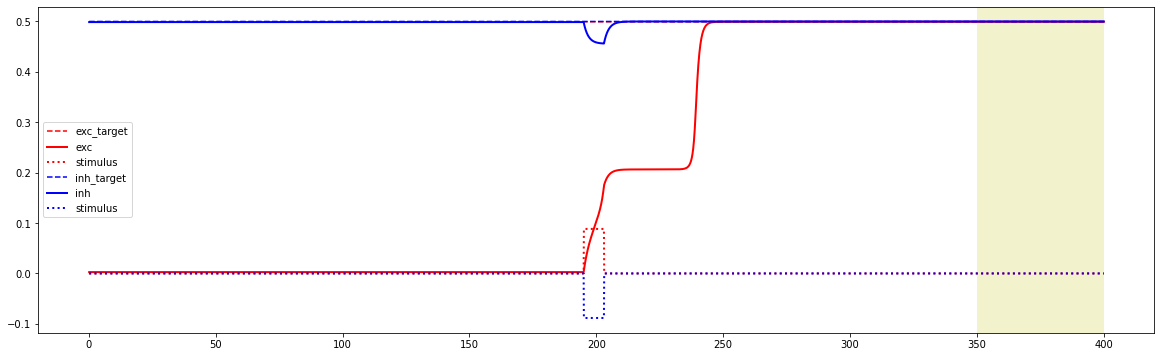

gradient:


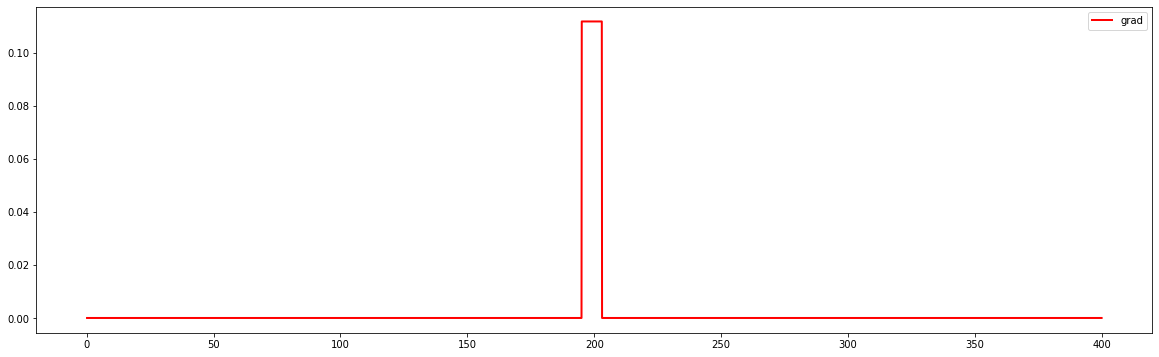

___
iteration: 260


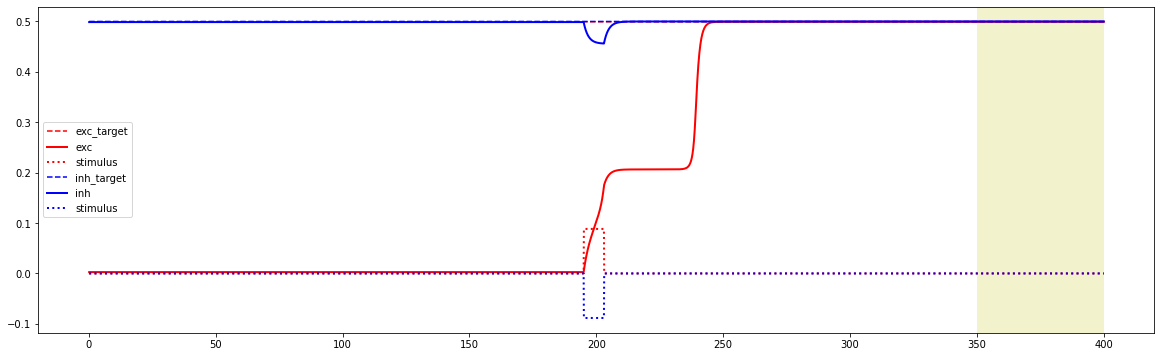

gradient:


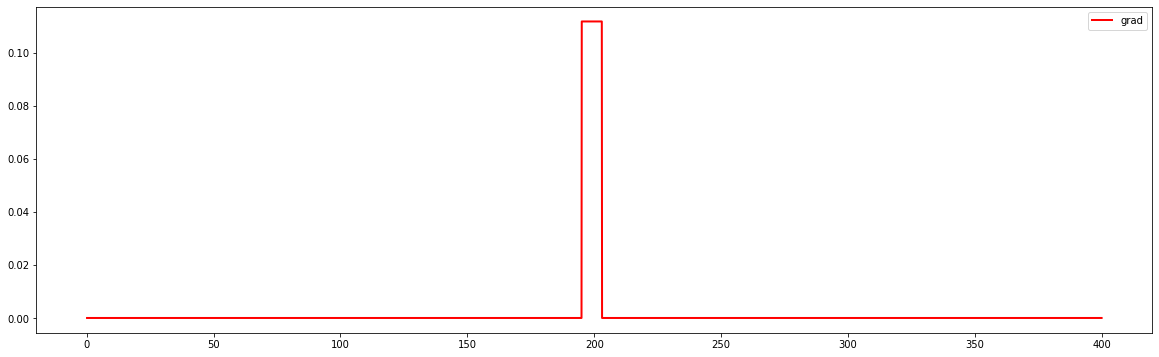

___
iteration: 280


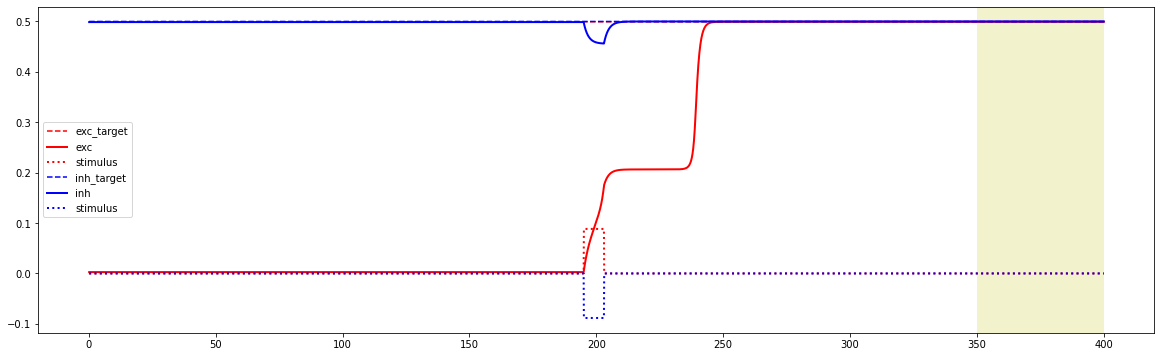

gradient:


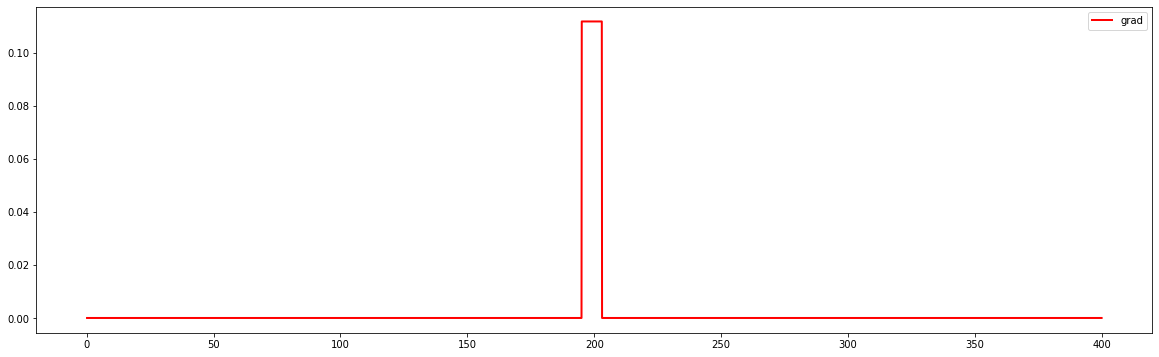

___
iteration: 300


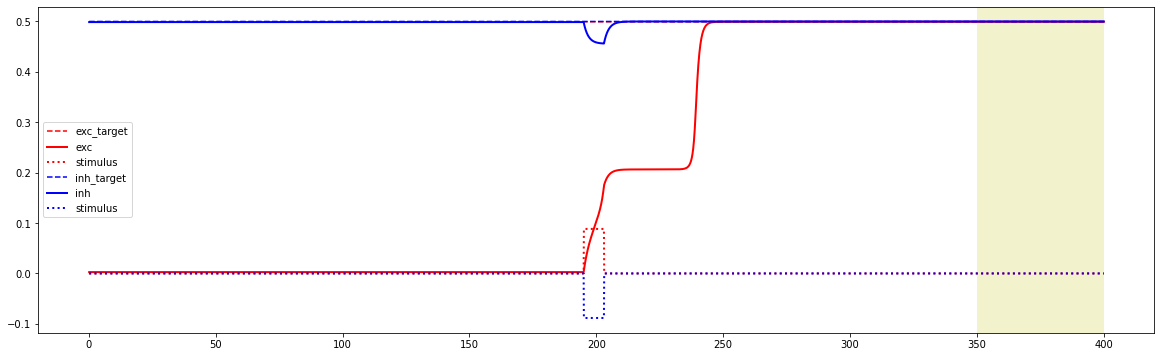

gradient:


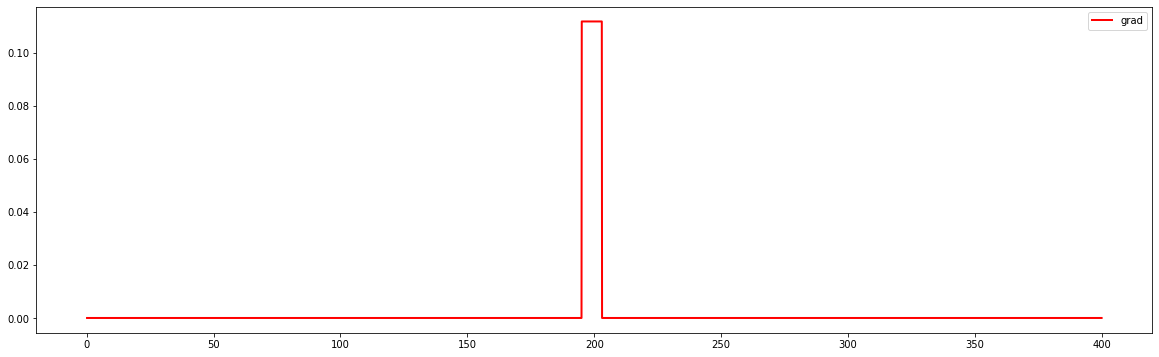

___
iteration: 320


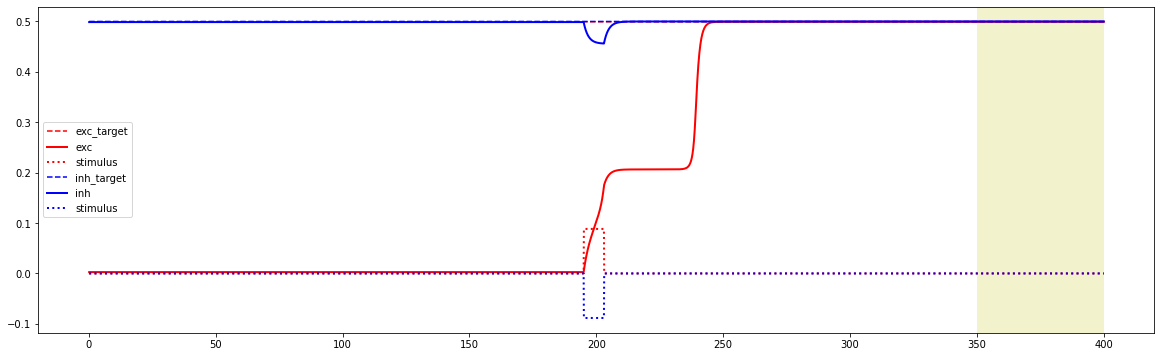

gradient:


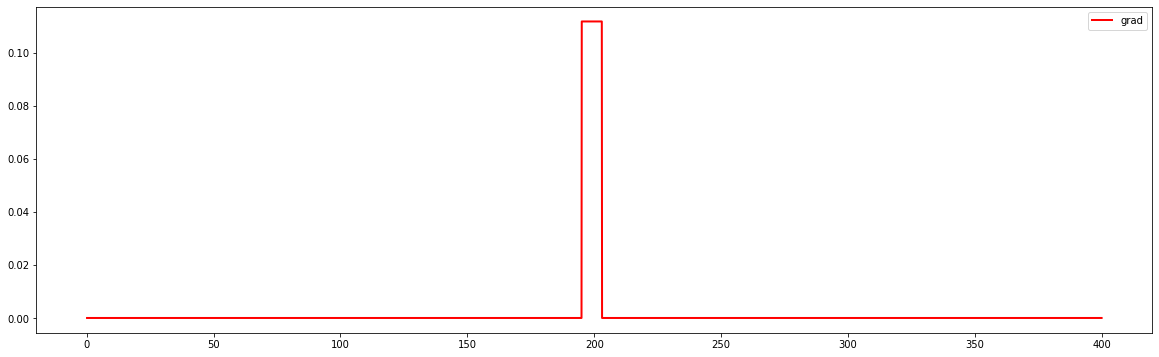

___
iteration: 340


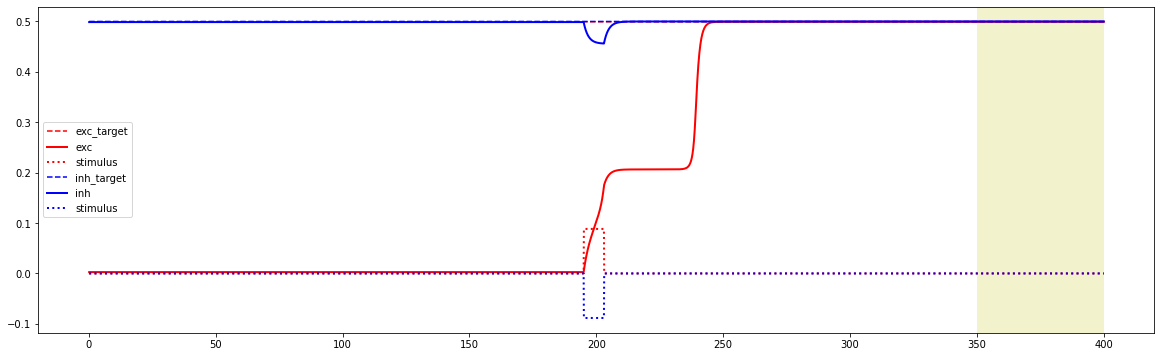

gradient:


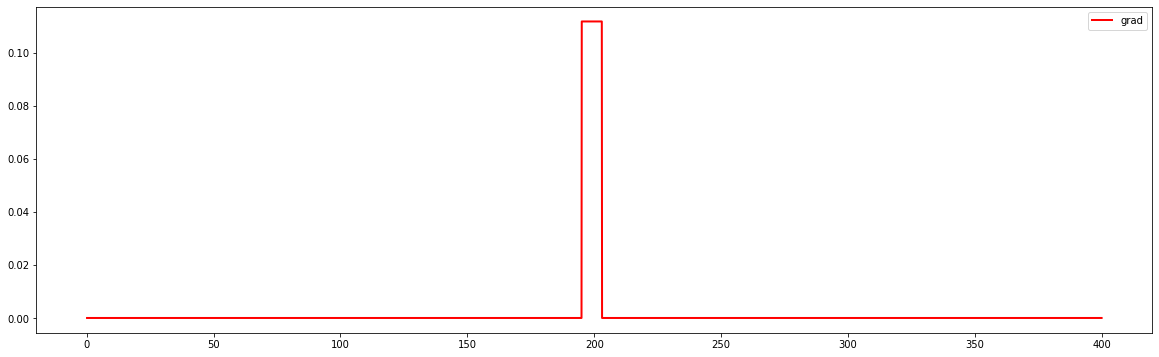

___
iteration: 360


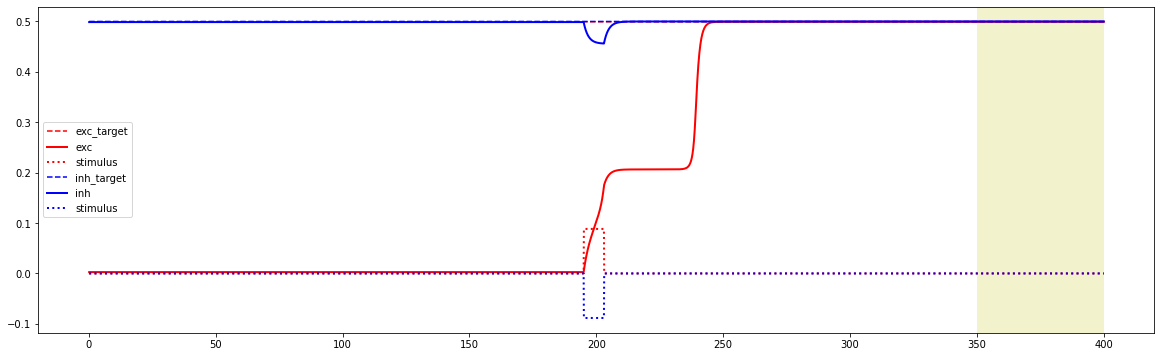

gradient:


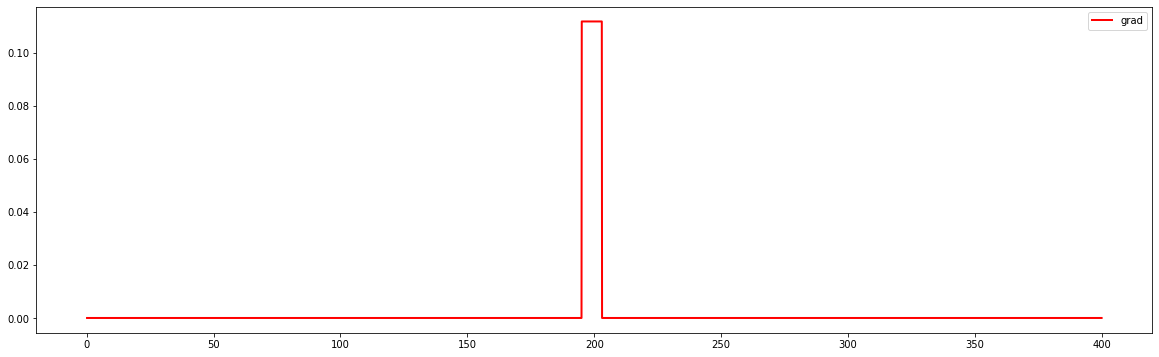

___
iteration: 380


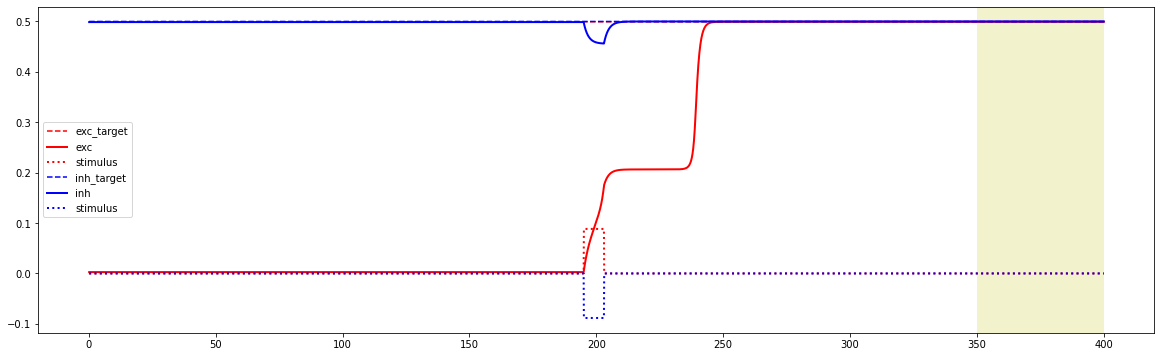

gradient:


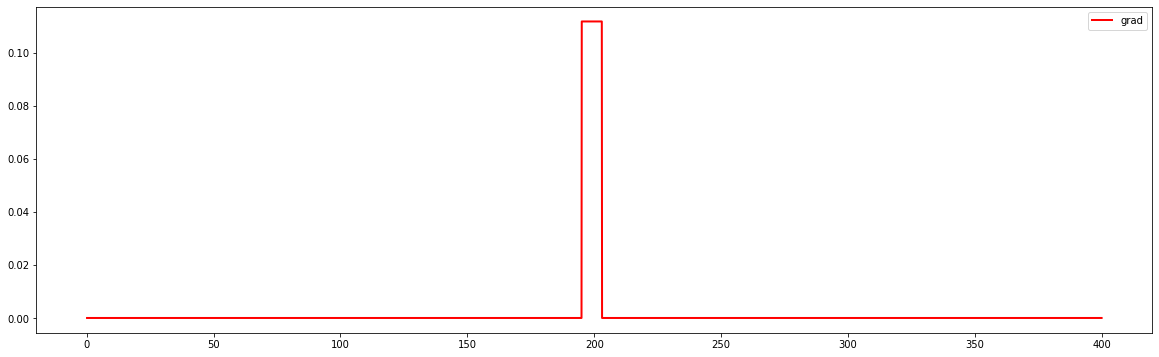

exc_ext, inh_ext 5 9


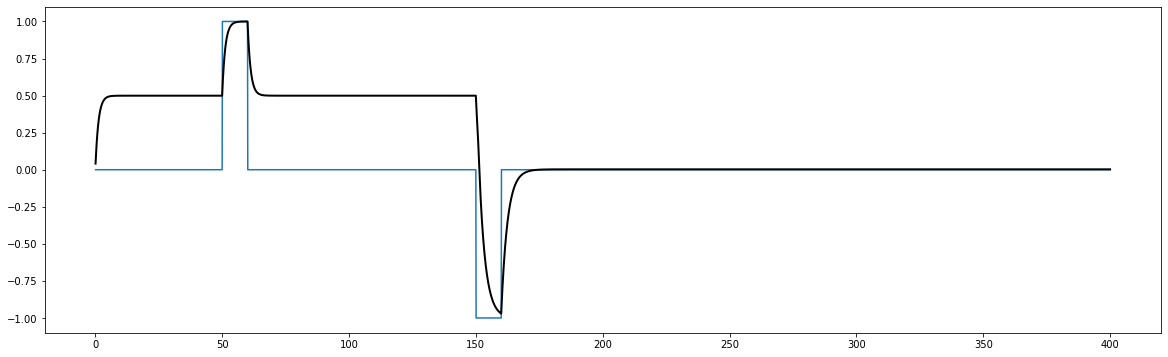

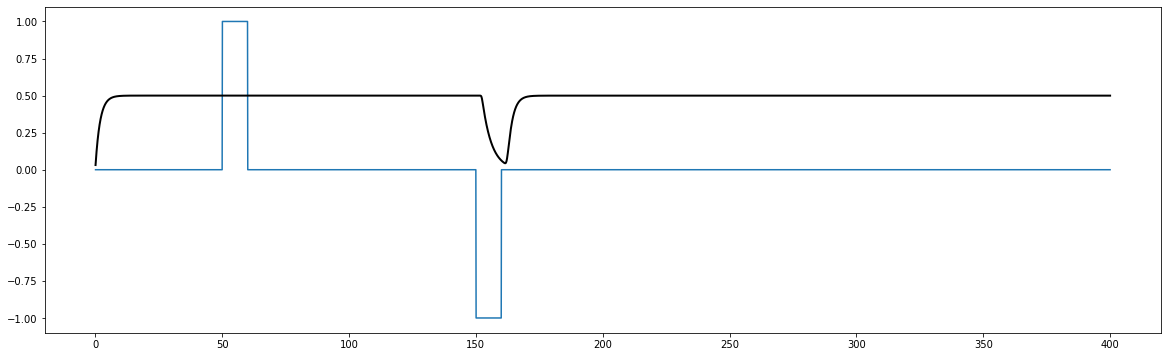

w 1
___
iteration: 0


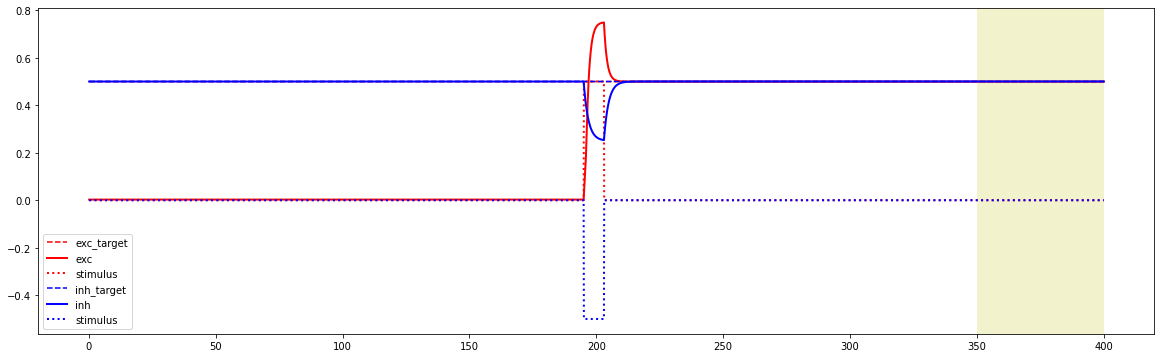

gradient:


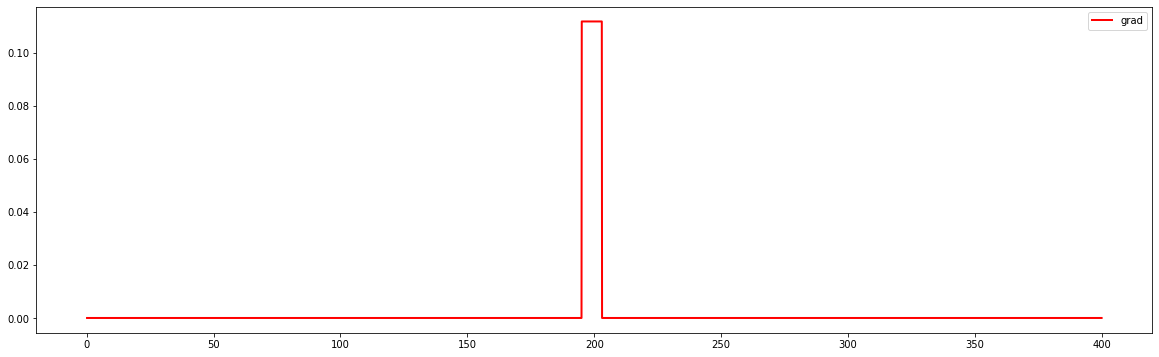

___
iteration: 20


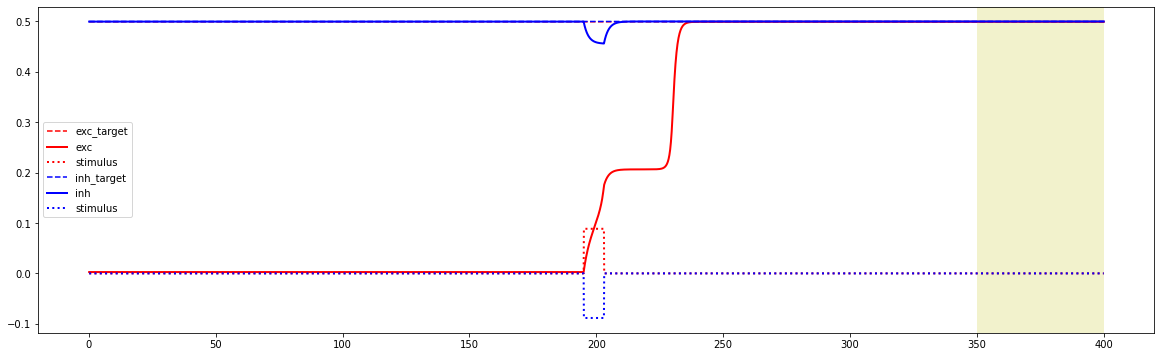

gradient:


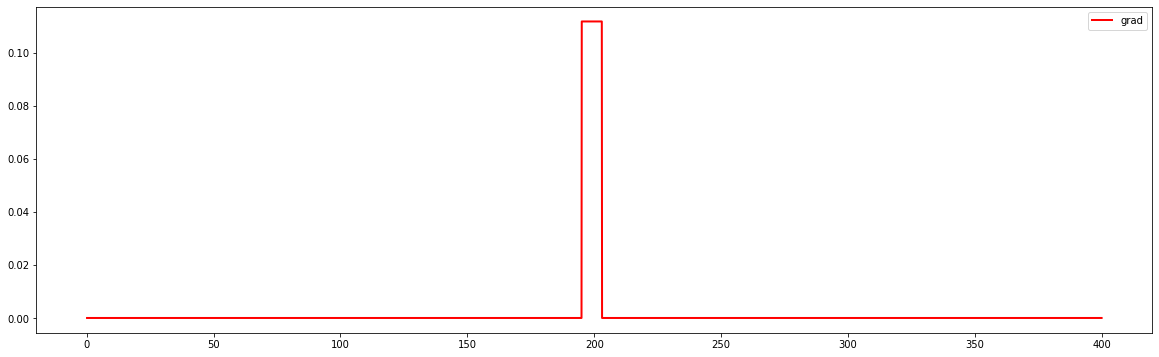

___
iteration: 40


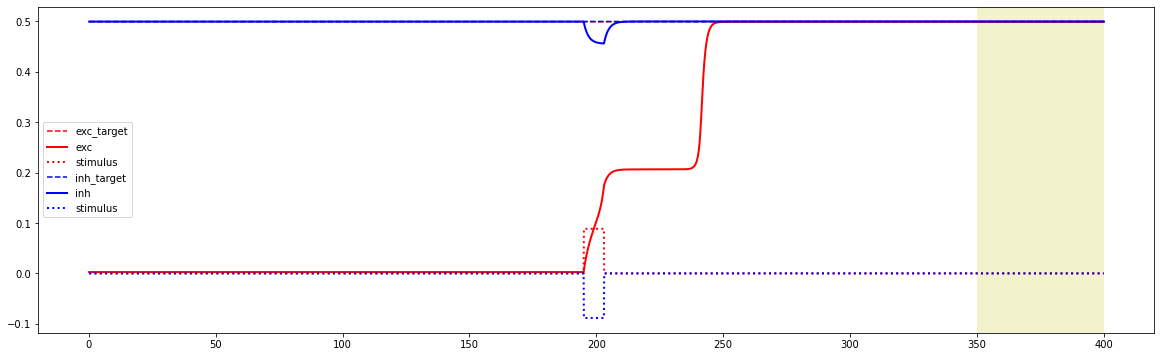

gradient:


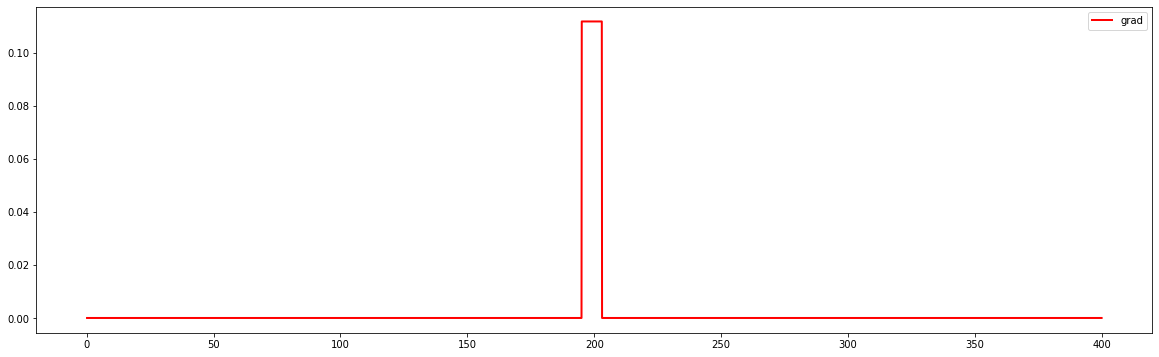

___
iteration: 60


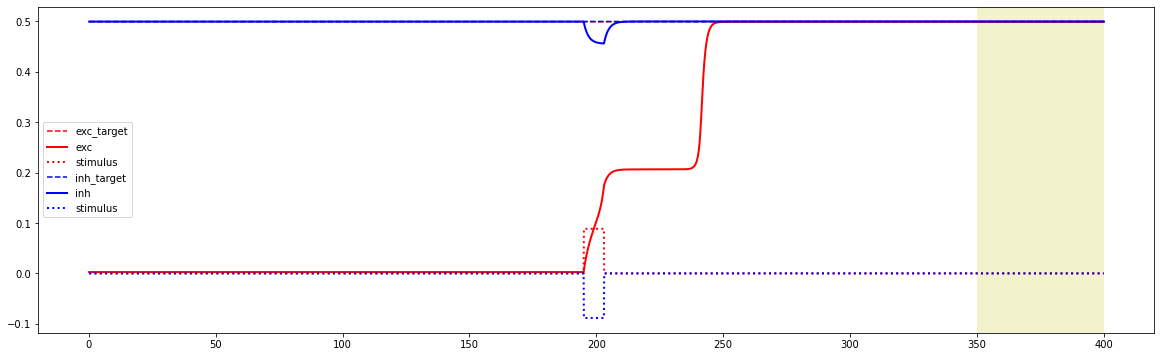

gradient:


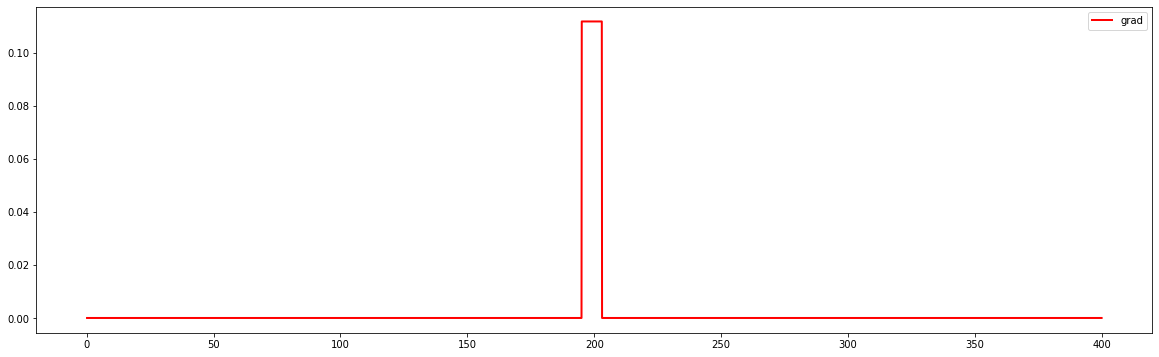

___
iteration: 80


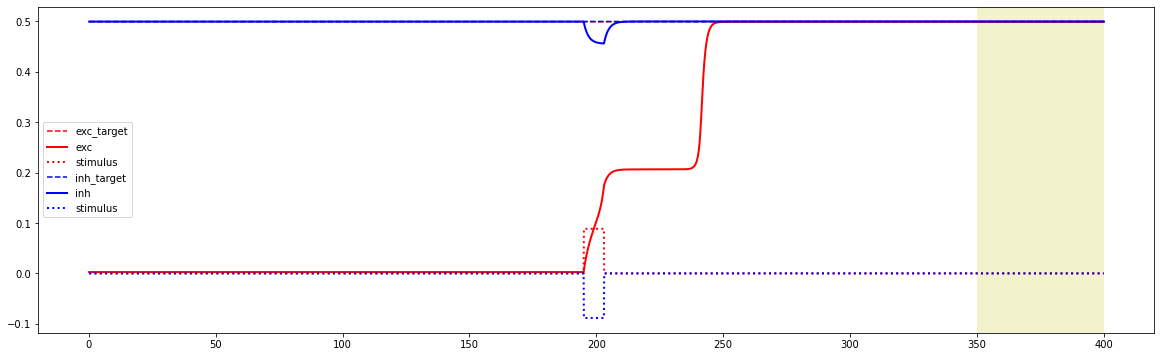

gradient:


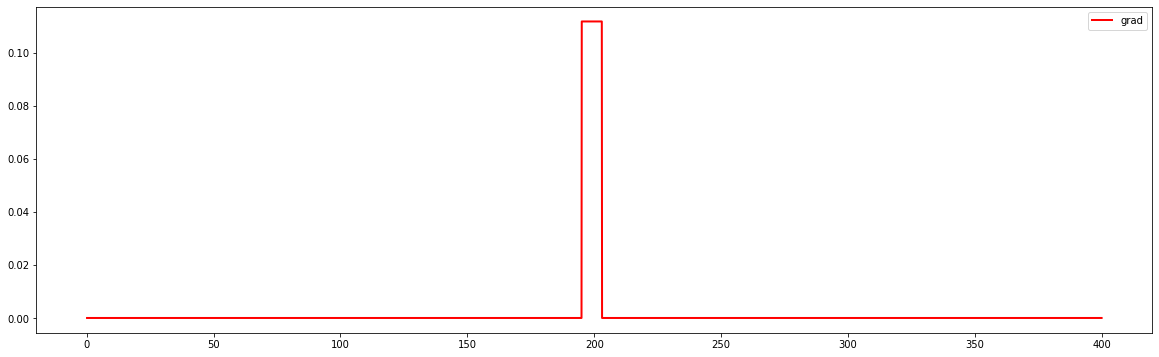

___
iteration: 100


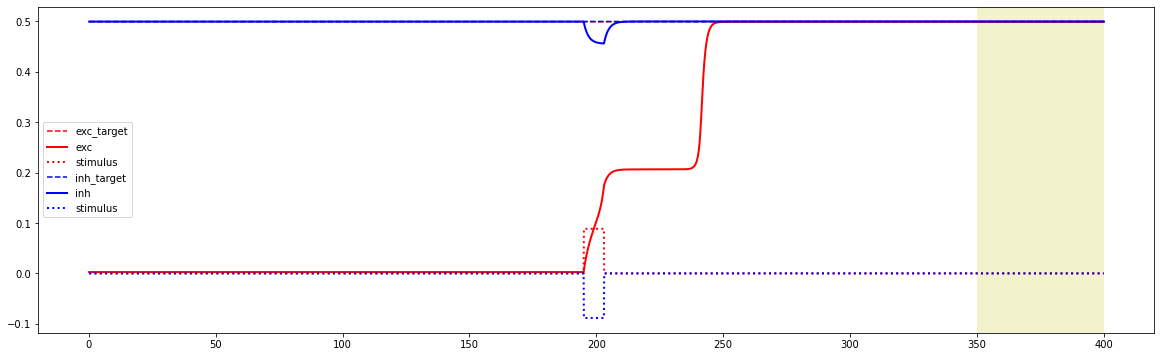

gradient:


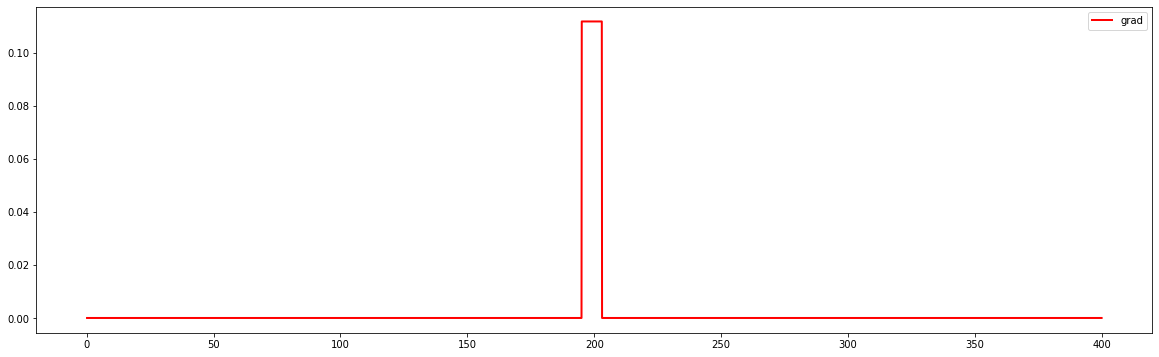

___
iteration: 120


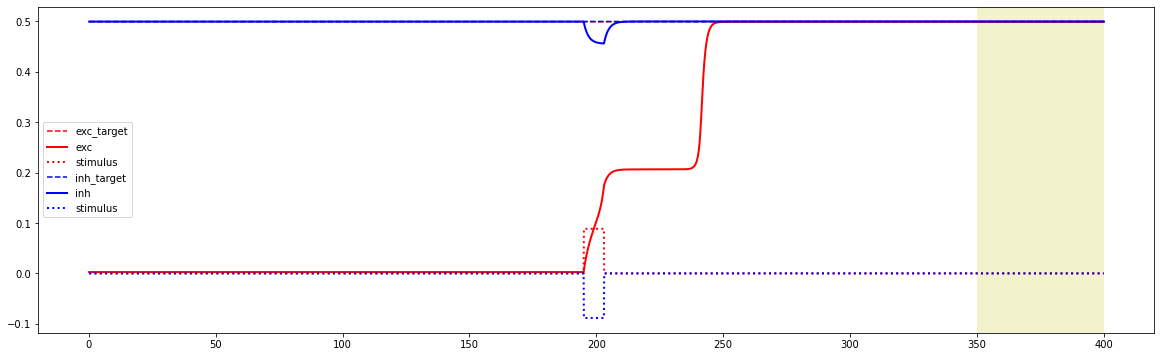

gradient:


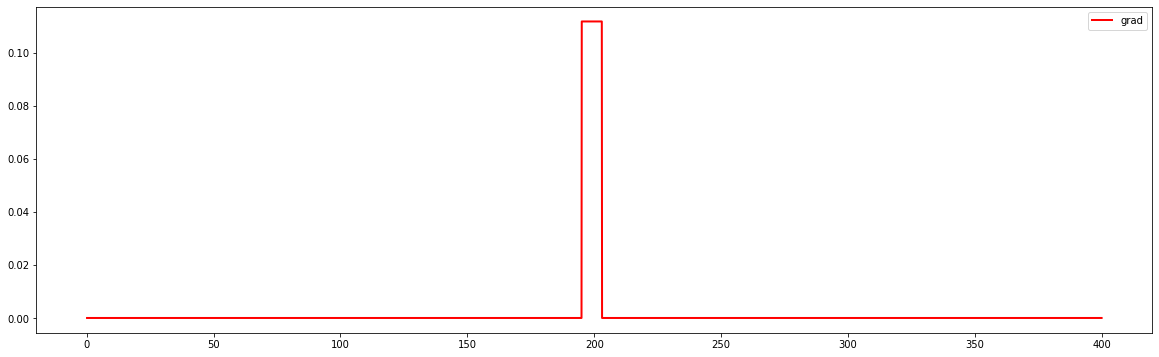

___
iteration: 140


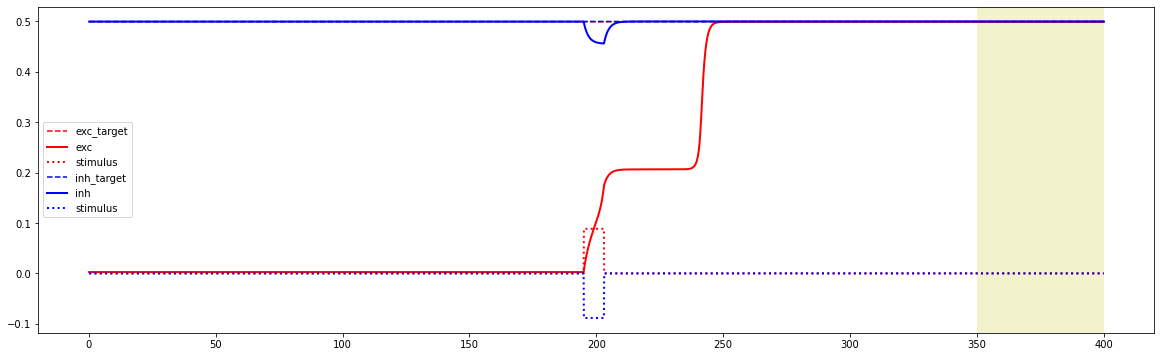

gradient:


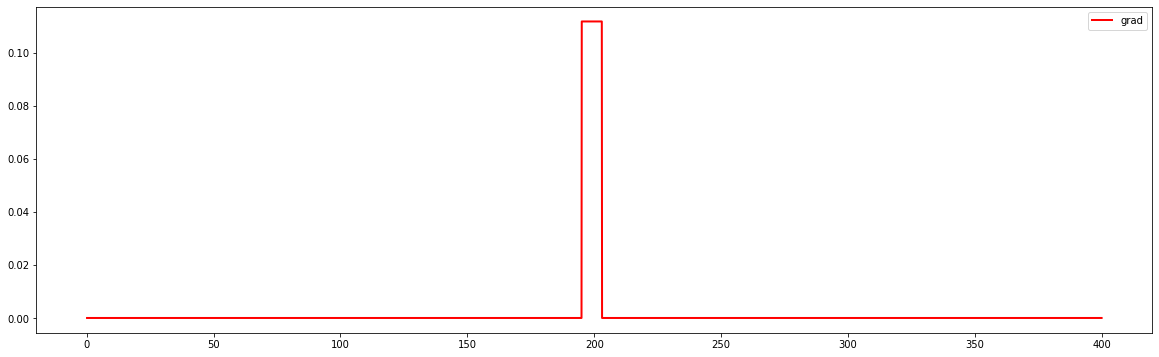

___
iteration: 160


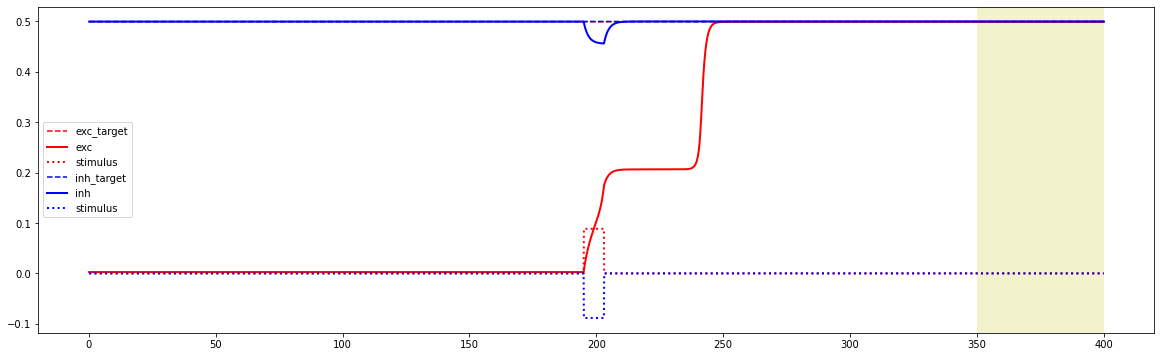

gradient:


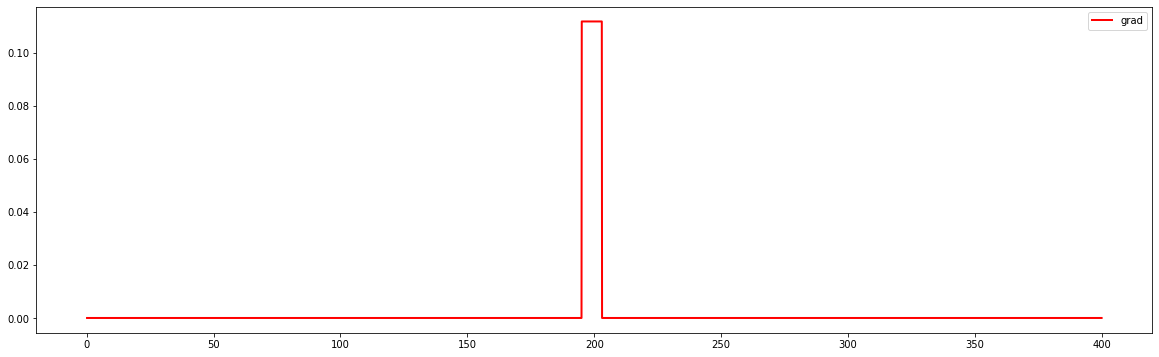

___
iteration: 180


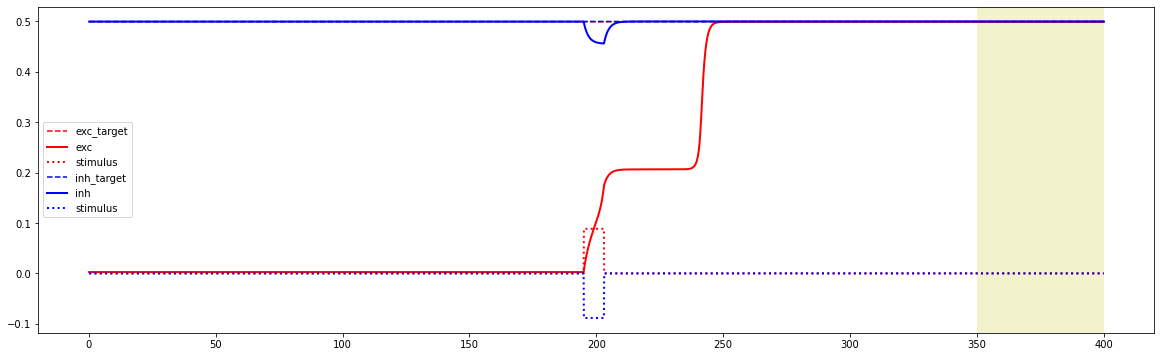

gradient:


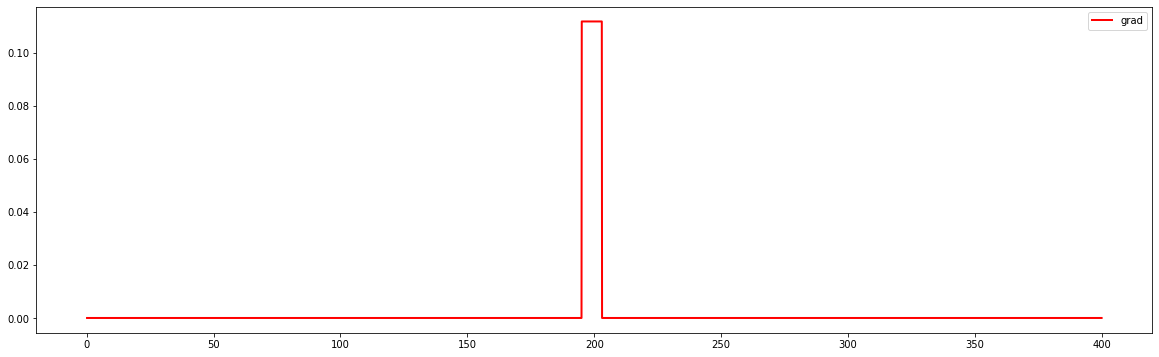

___
iteration: 200


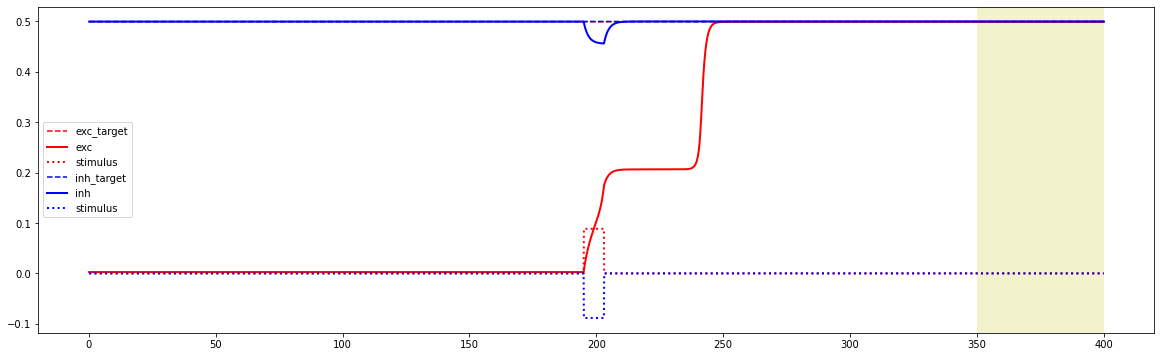

gradient:


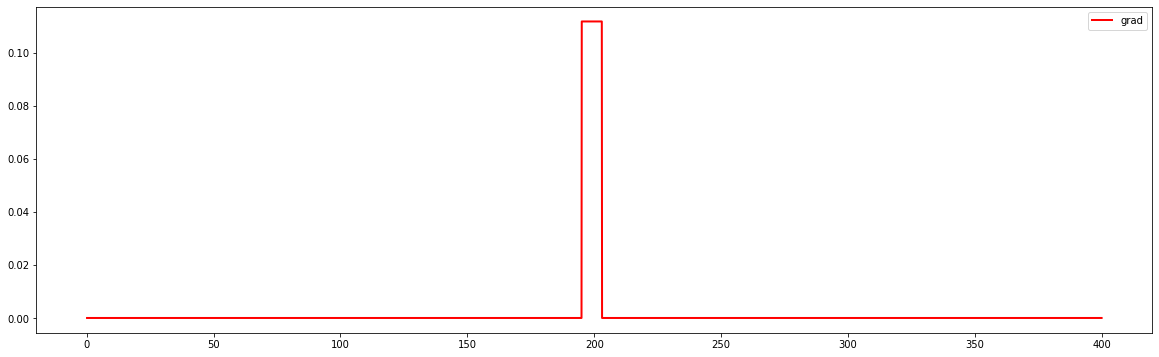

___
iteration: 220


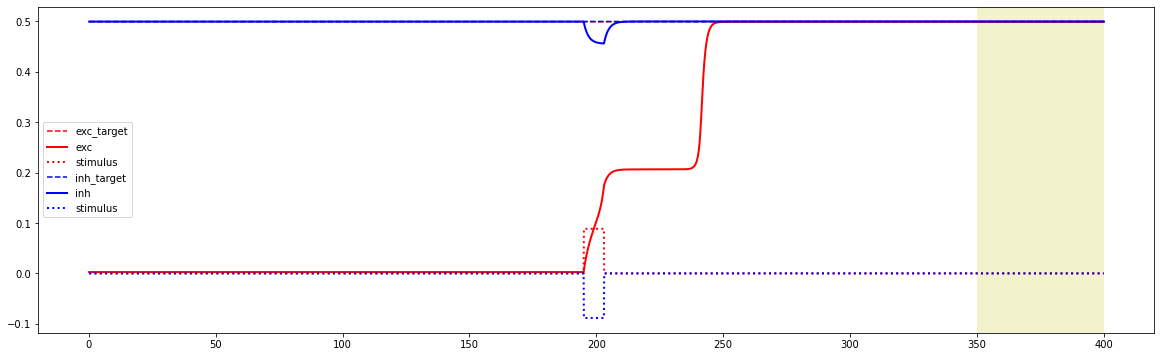

gradient:


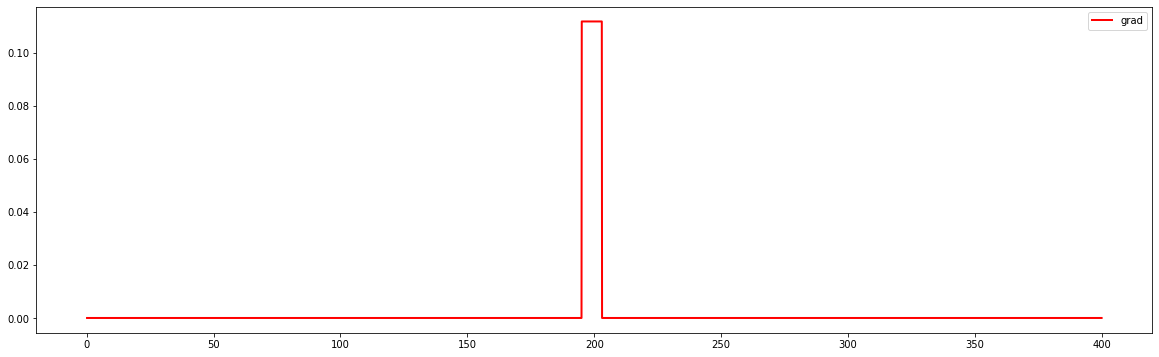

___
iteration: 240


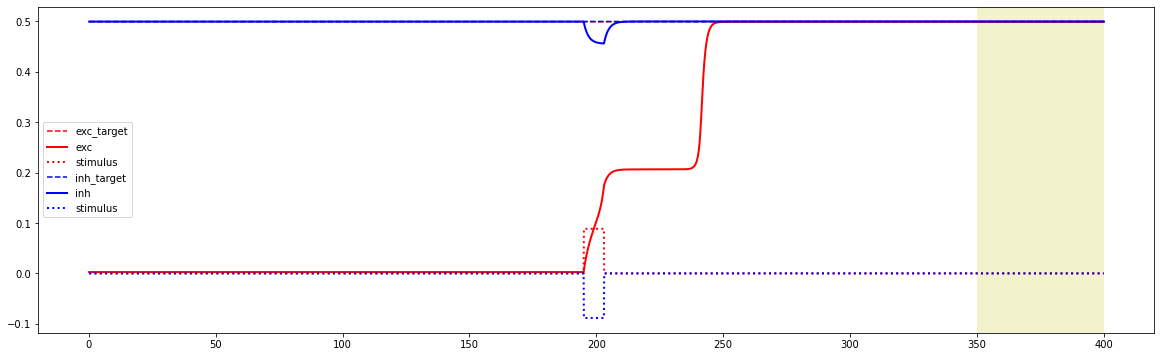

gradient:


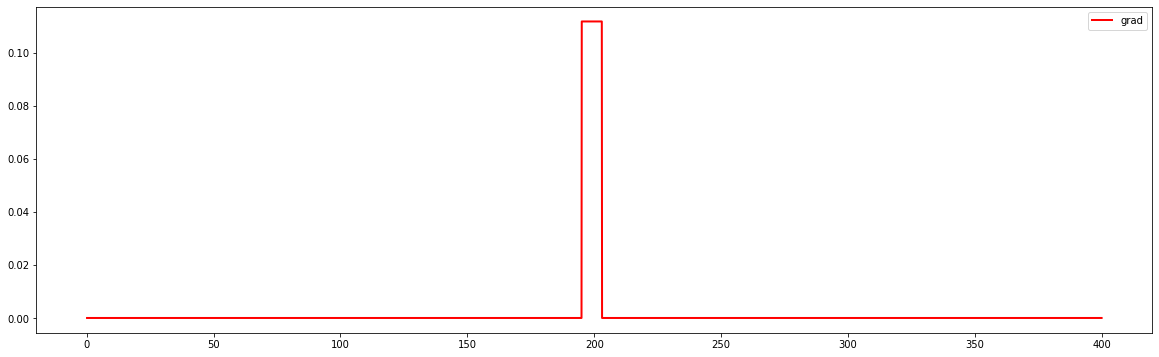

___
iteration: 260


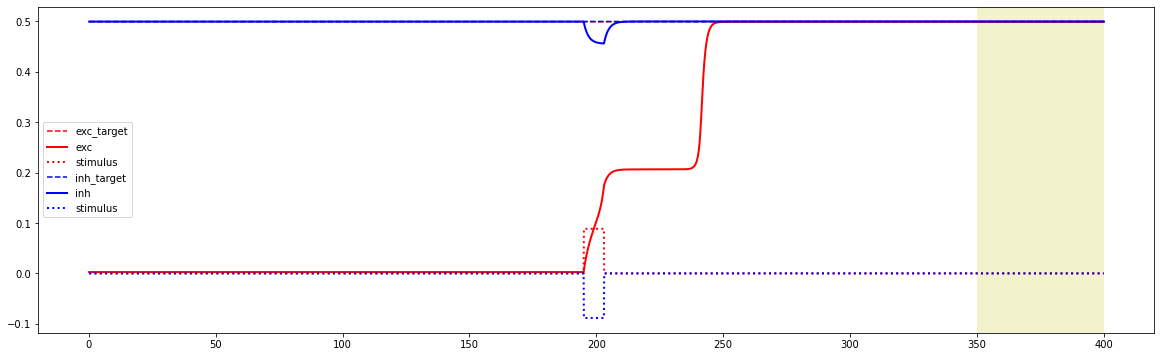

gradient:


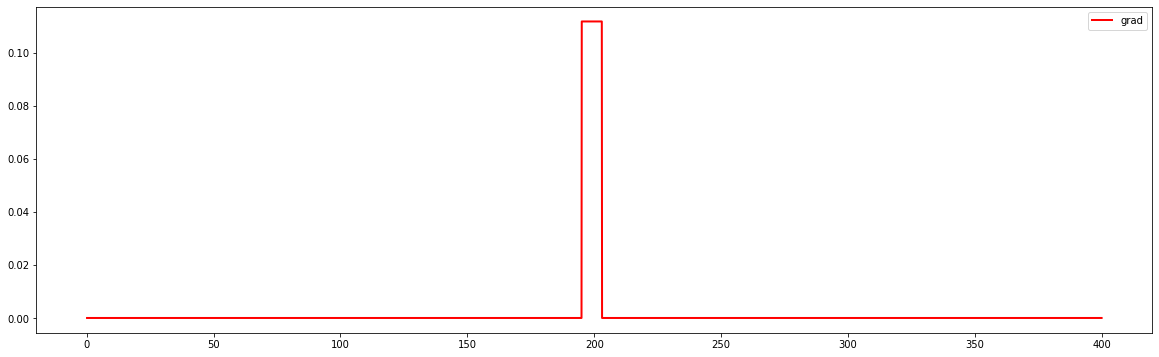

___
iteration: 280


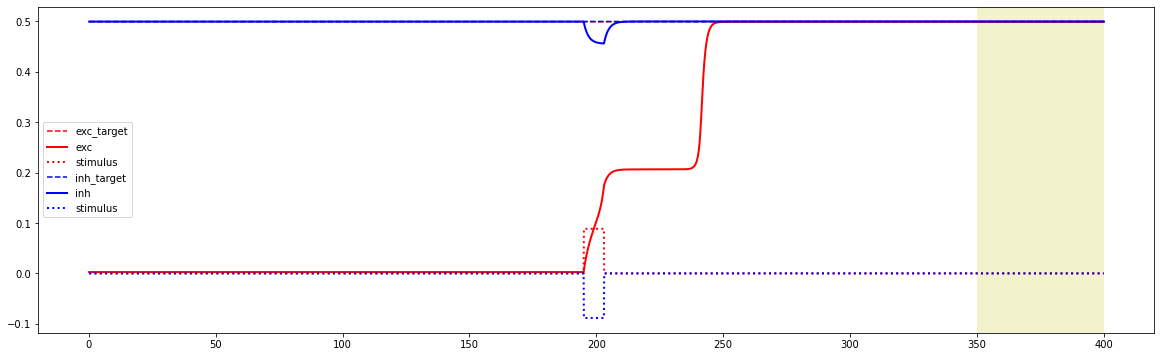

gradient:


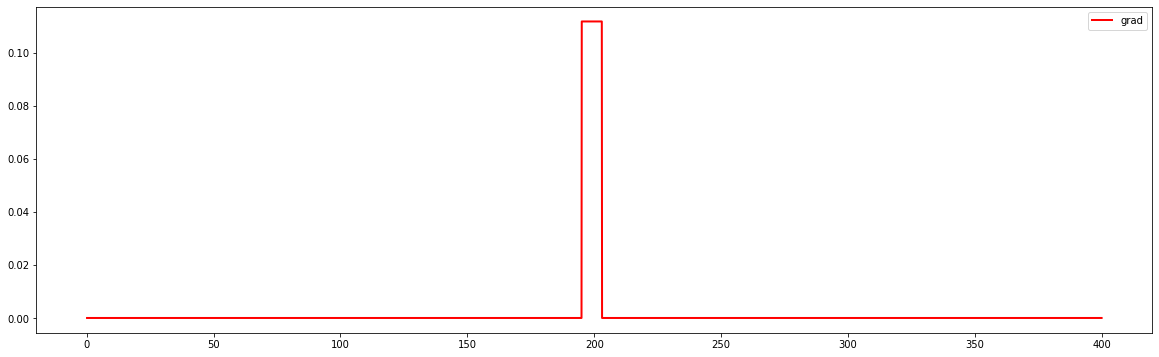

___
iteration: 300


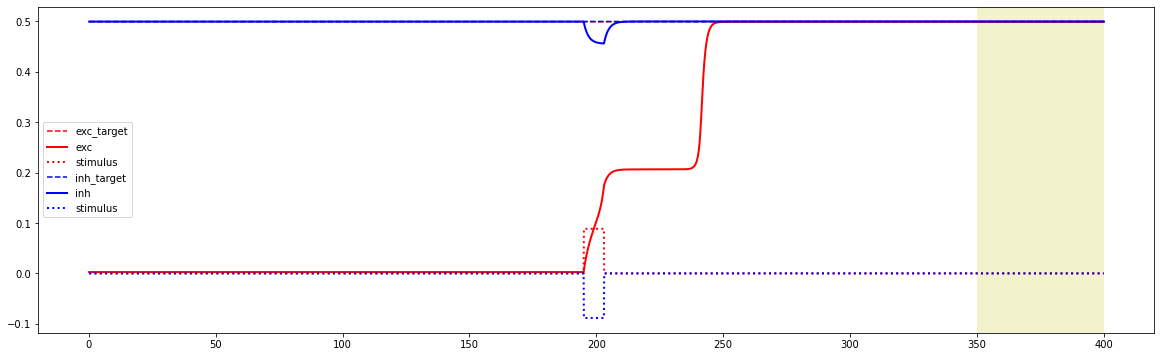

gradient:


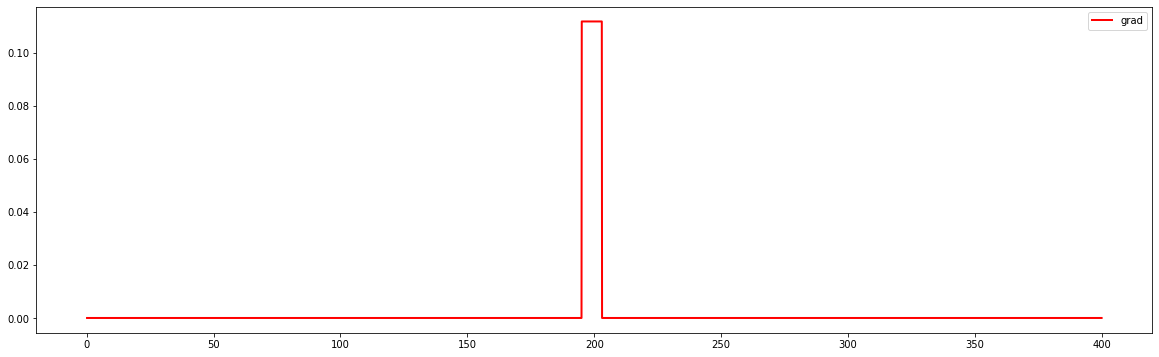

___
iteration: 320


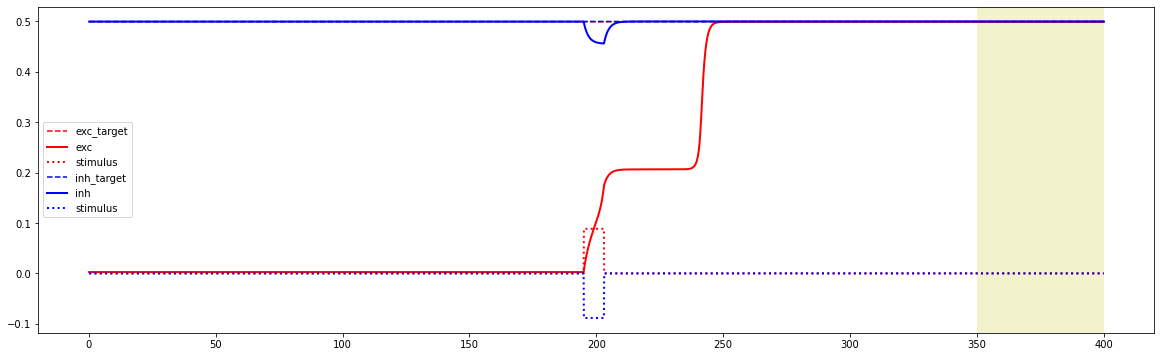

gradient:


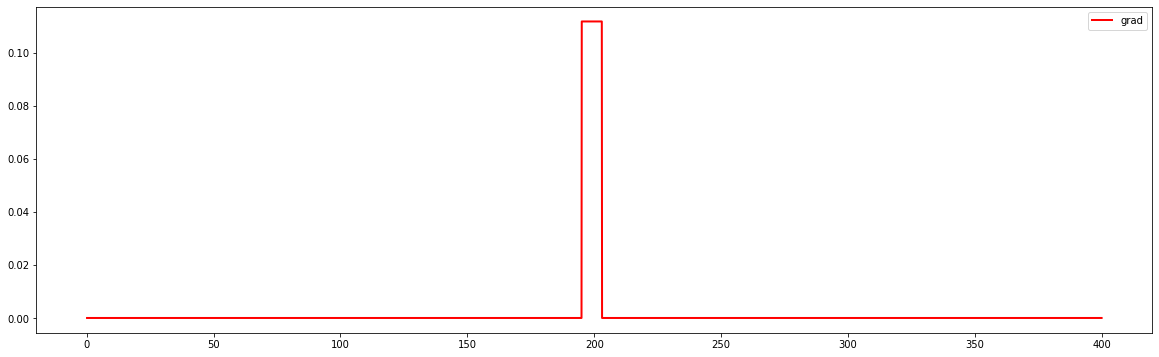

___
iteration: 340


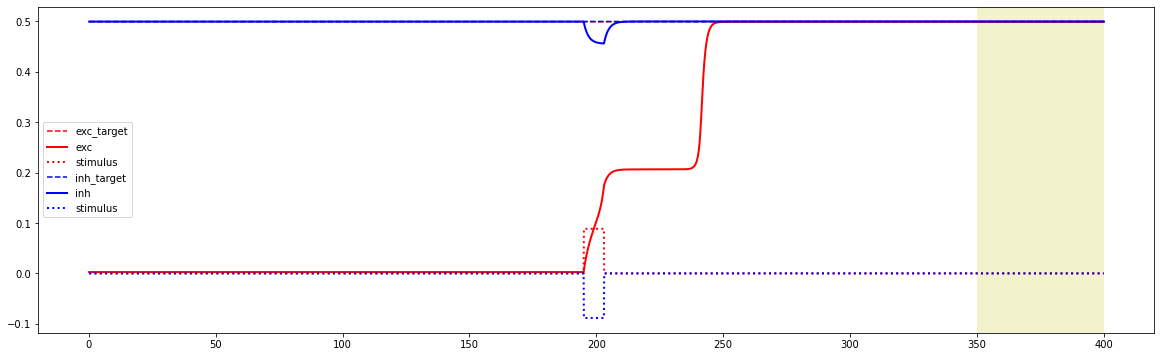

gradient:


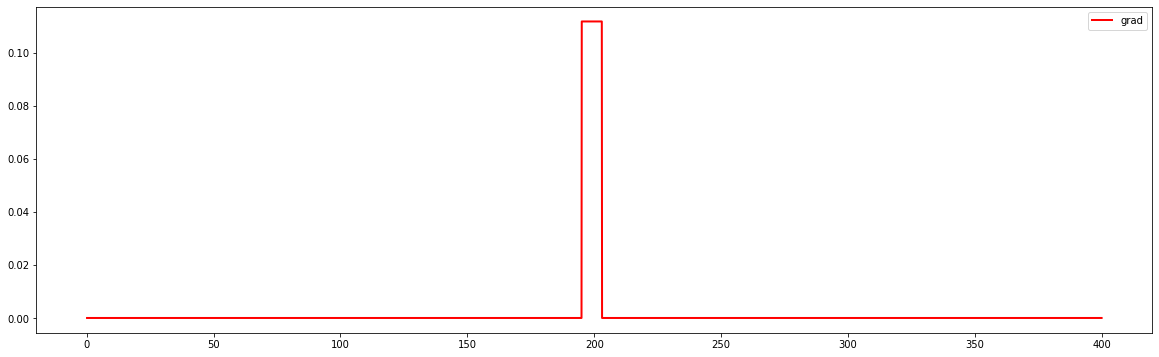

___
iteration: 360


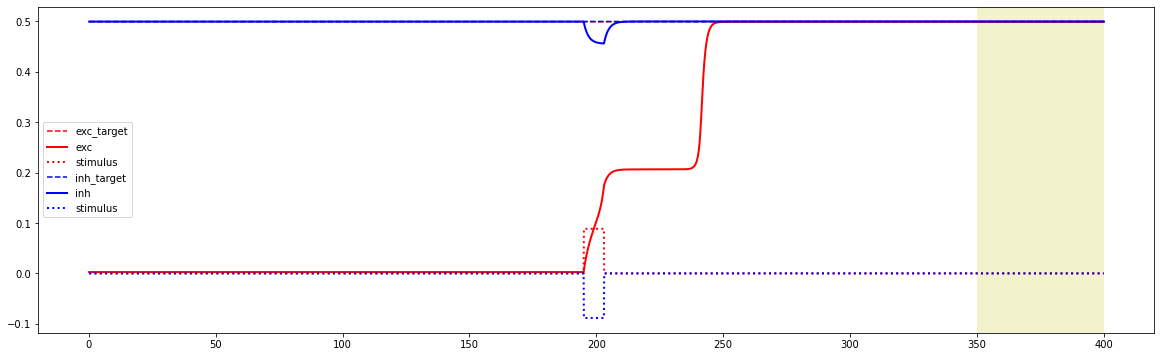

gradient:


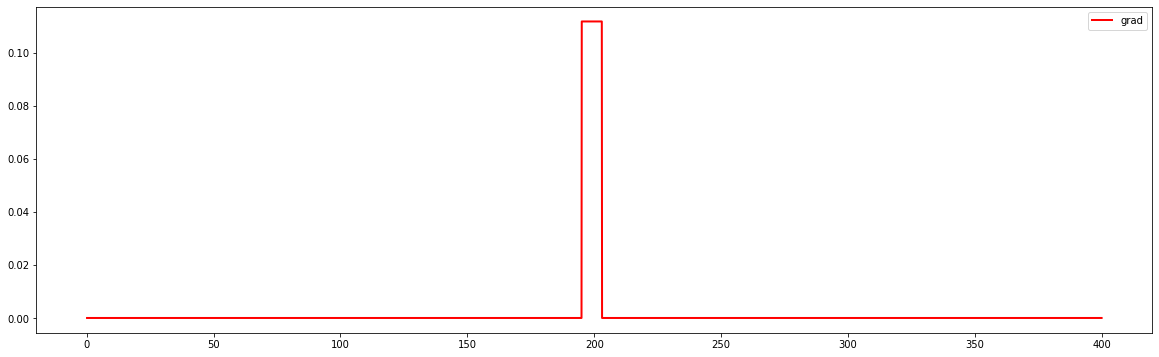

___
iteration: 380


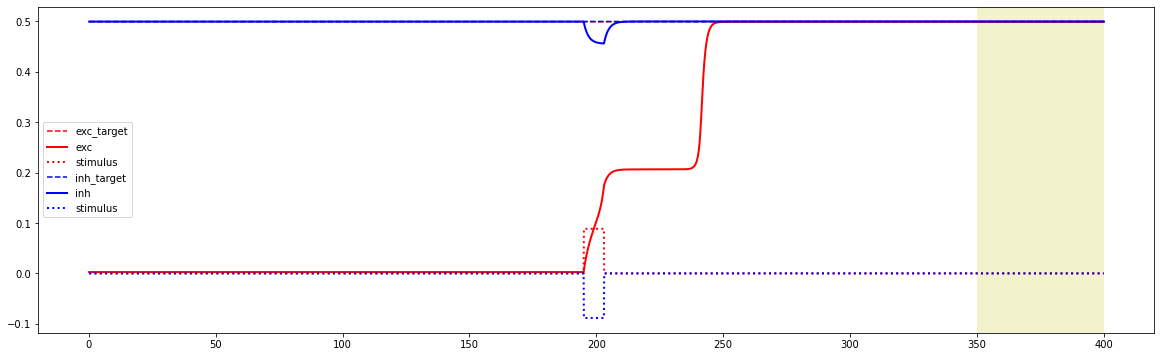

gradient:


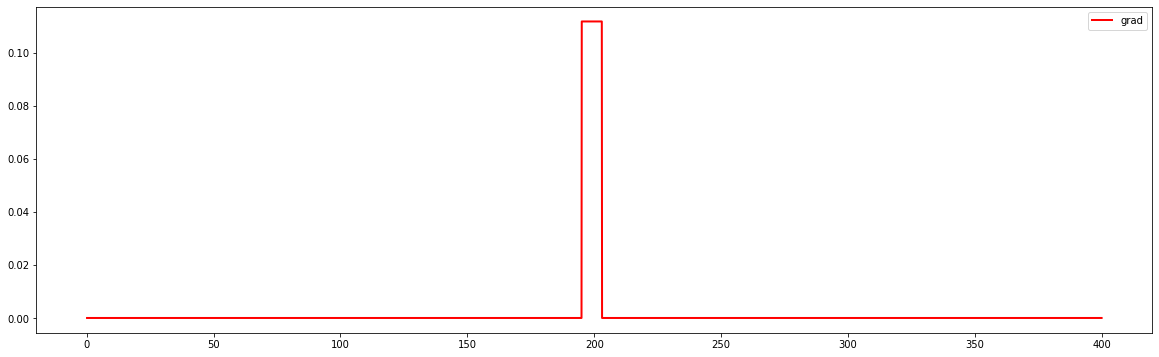

w 90
___
iteration: 0


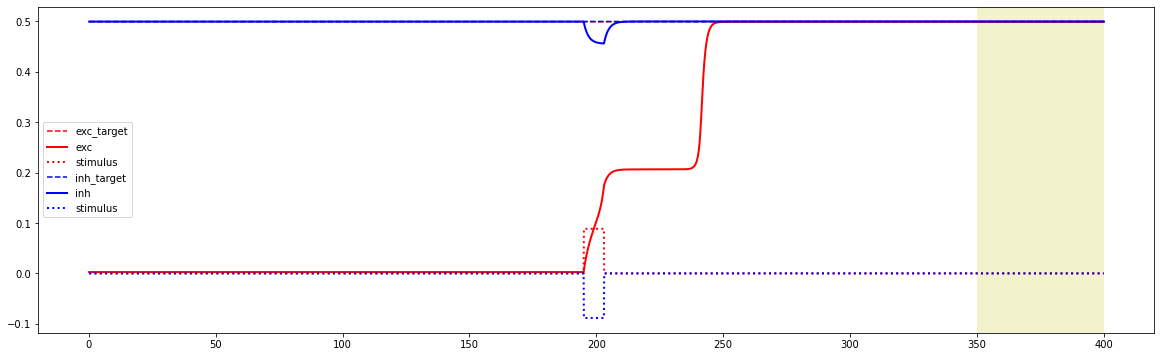

gradient:


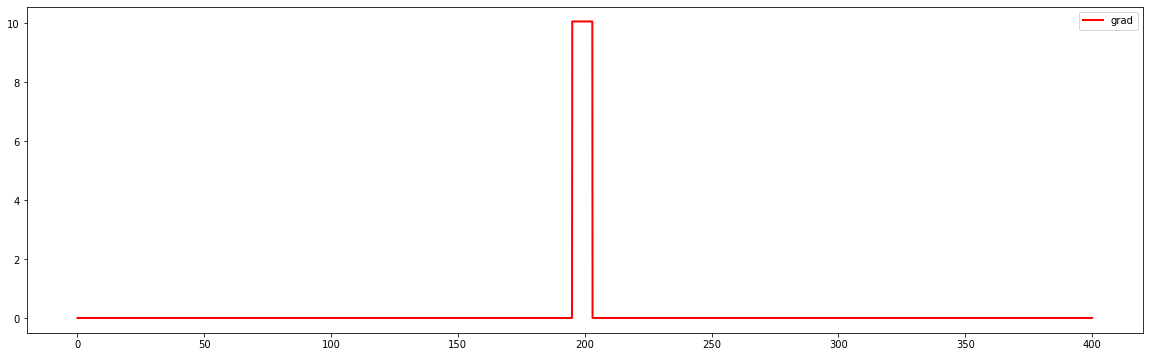

___
iteration: 20


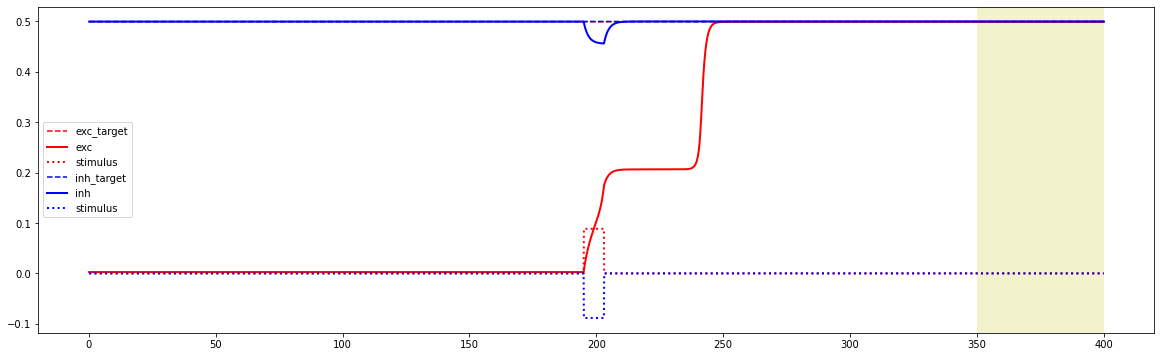

gradient:


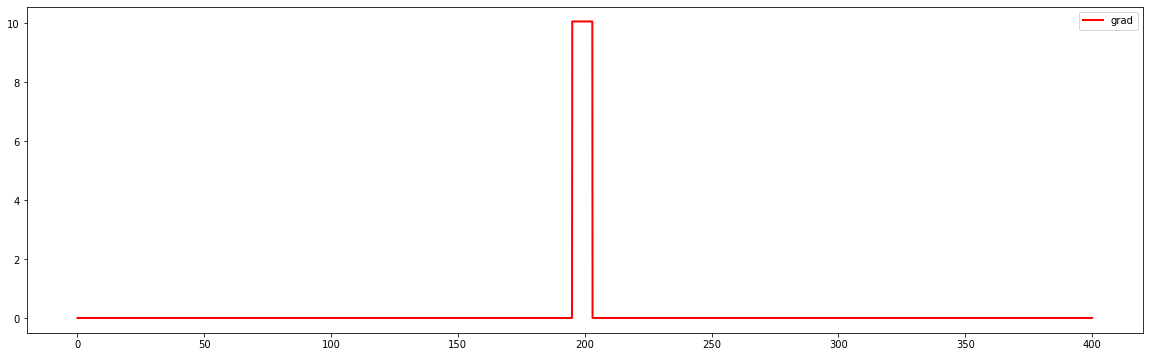

___
iteration: 40


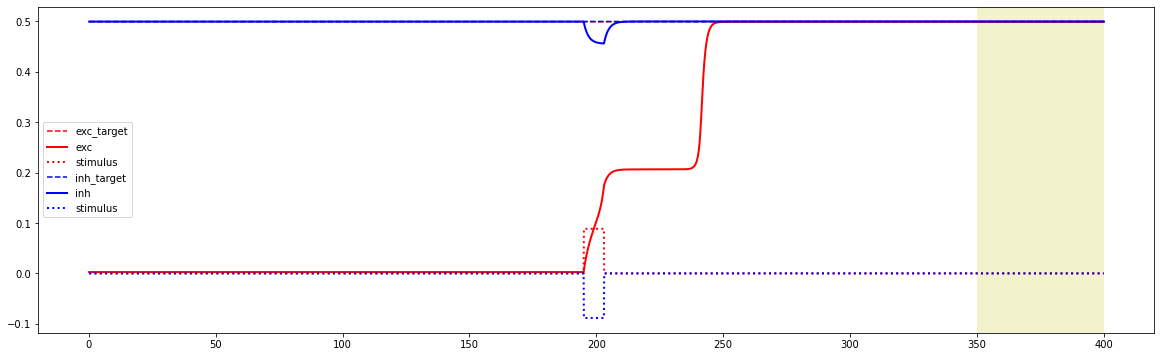

gradient:


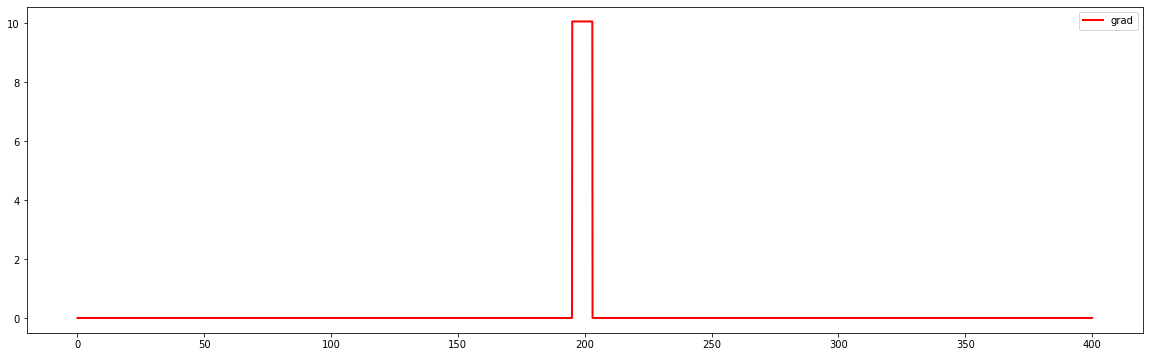

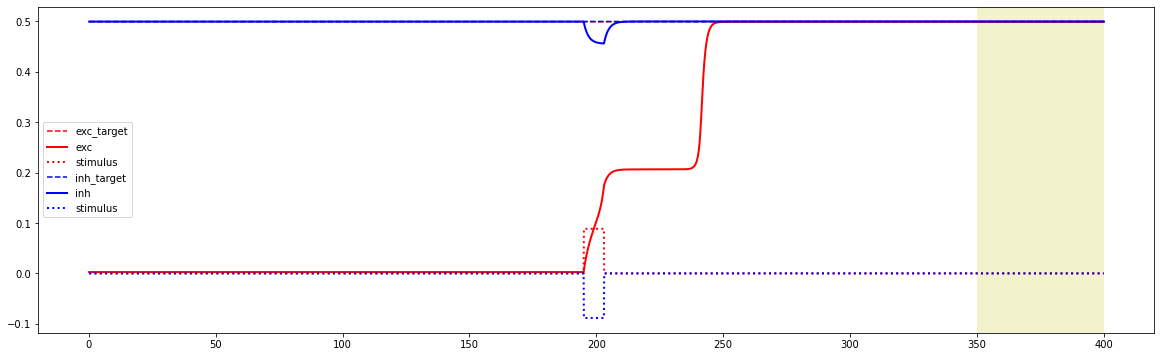

w 1
___
iteration: 0


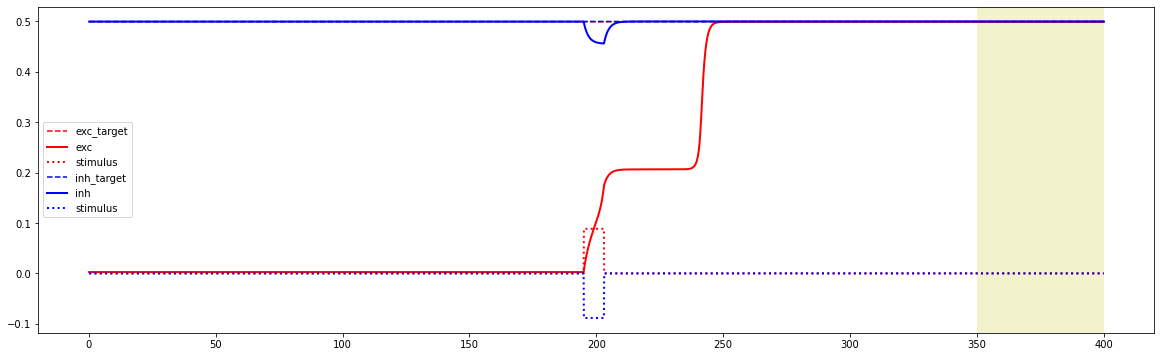

gradient:


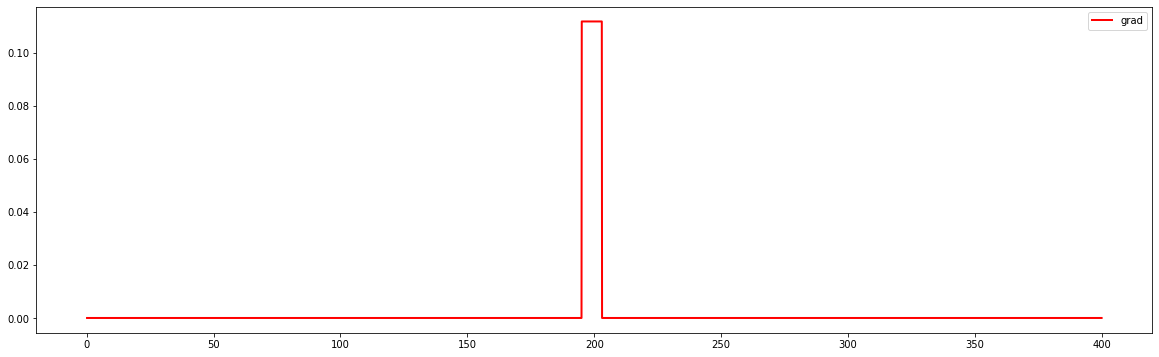

___
iteration: 20


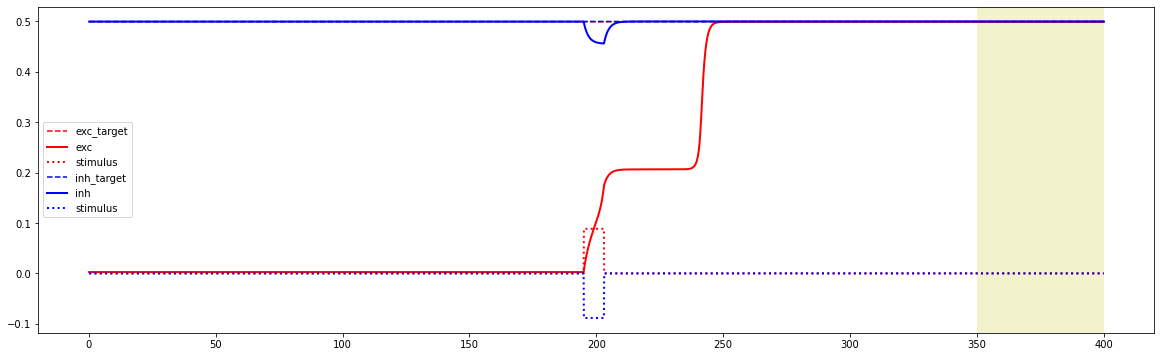

gradient:


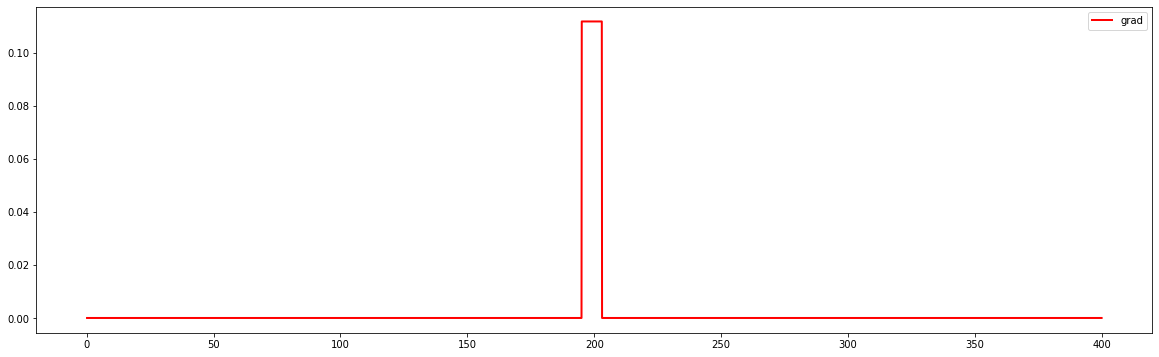

___
iteration: 40


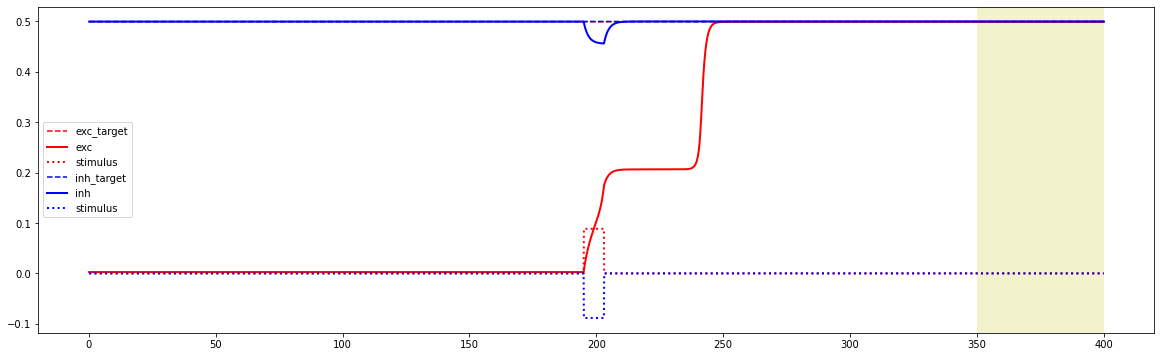

gradient:


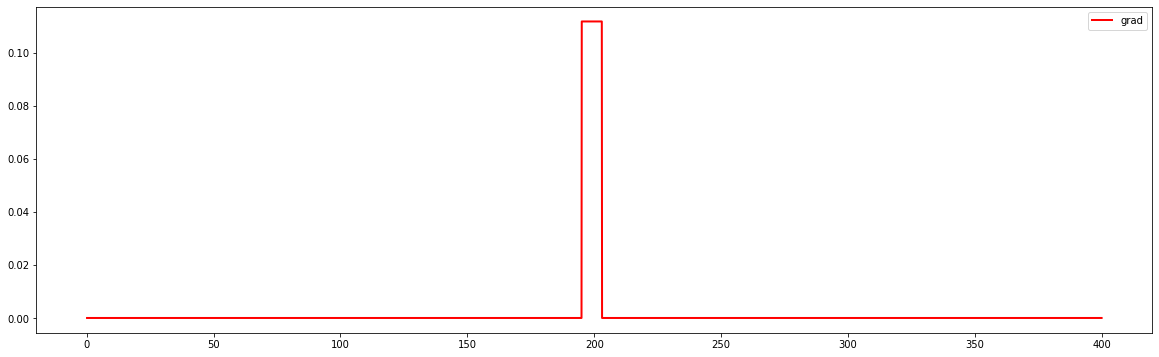

___
iteration: 60


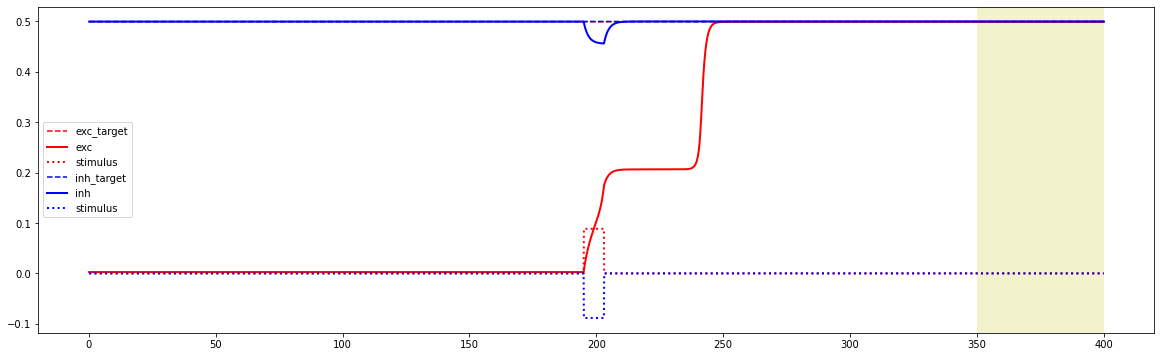

gradient:


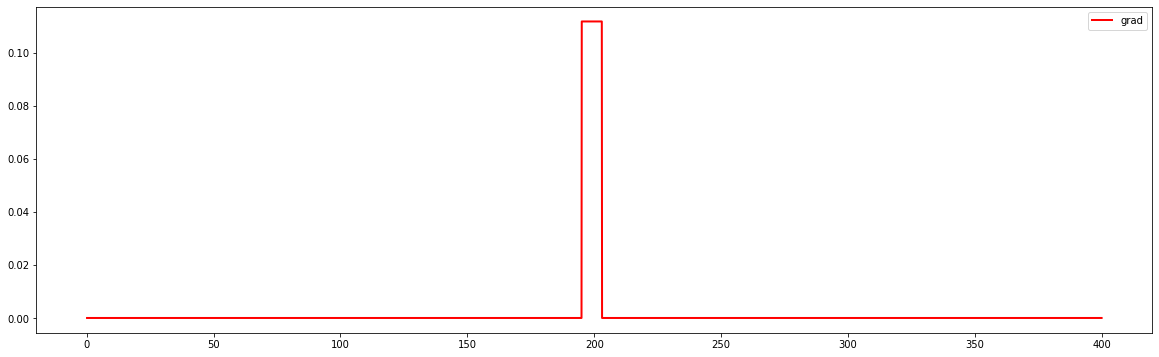

___
iteration: 80


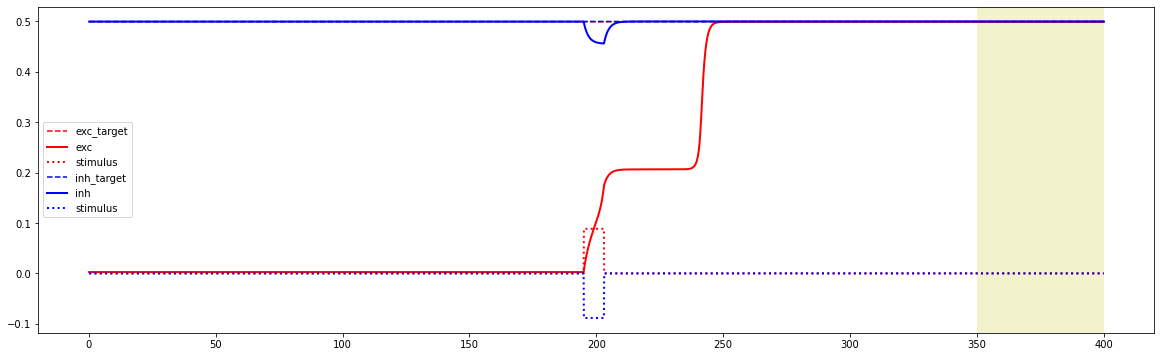

gradient:


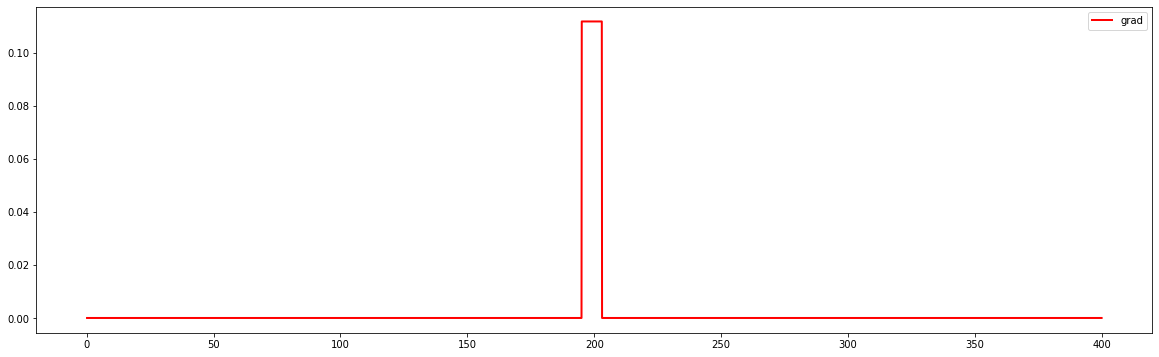

___
iteration: 100


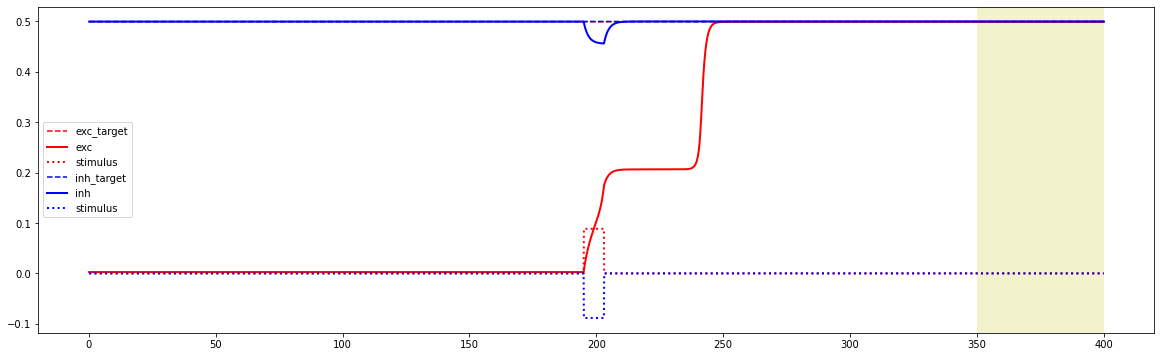

gradient:


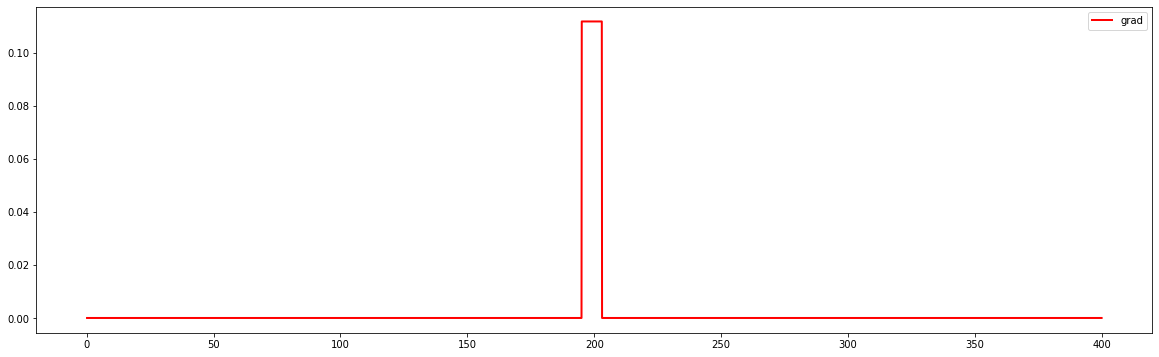

___
iteration: 120


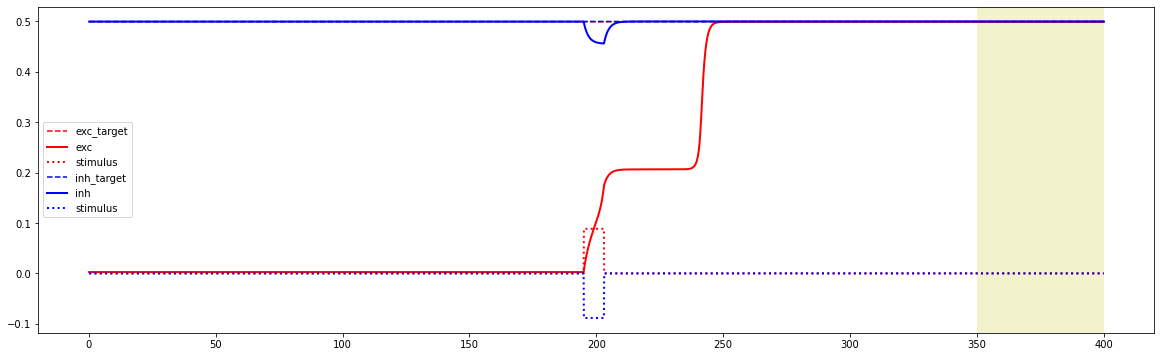

gradient:


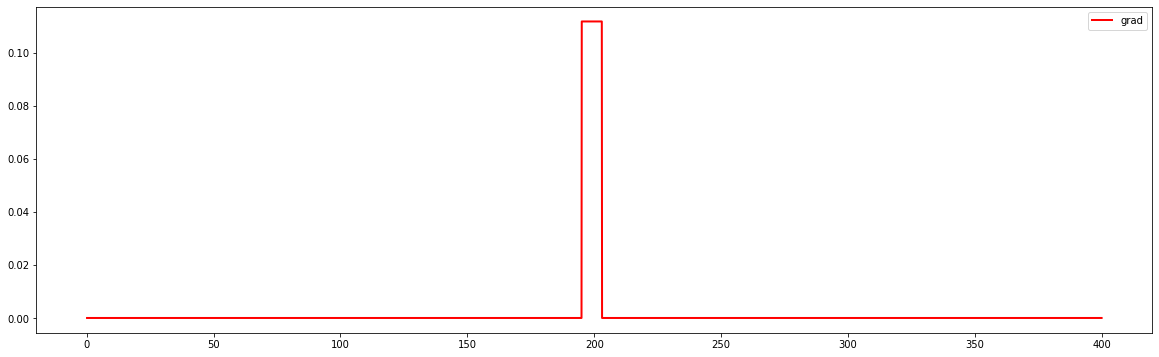

___
iteration: 140


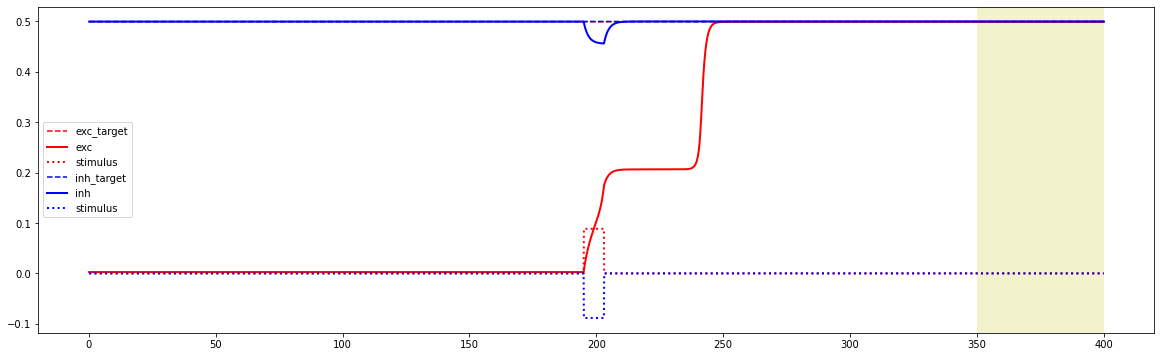

gradient:


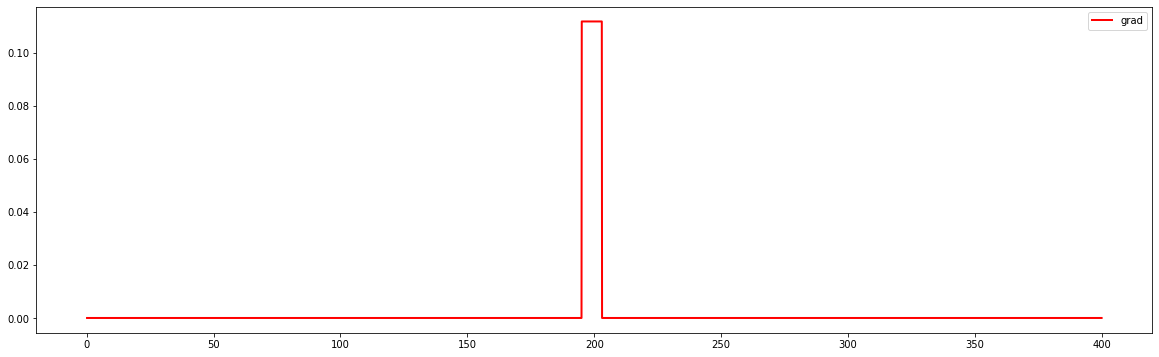

___
iteration: 160


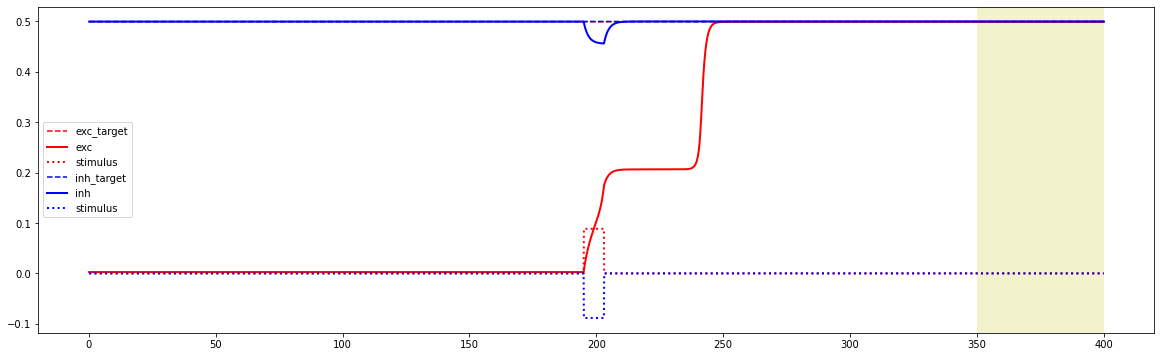

gradient:


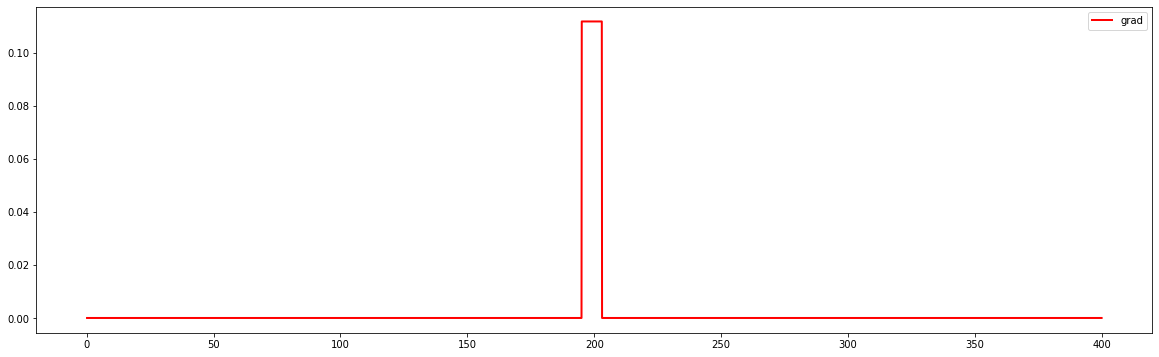

___
iteration: 180


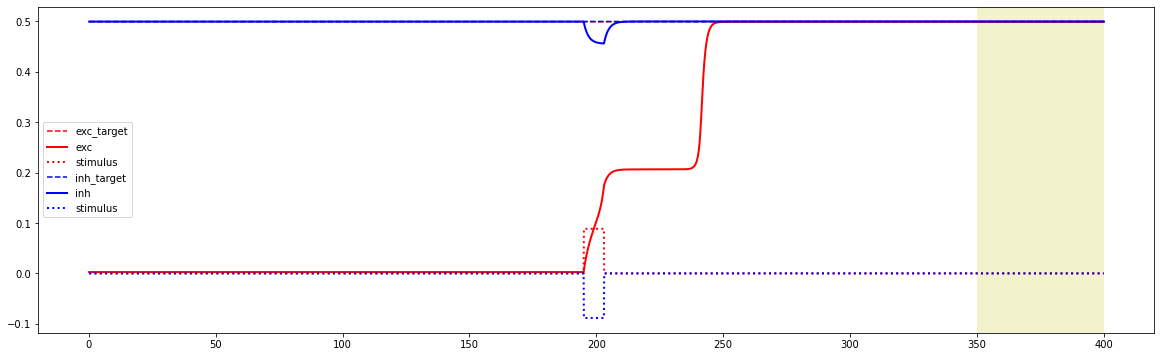

gradient:


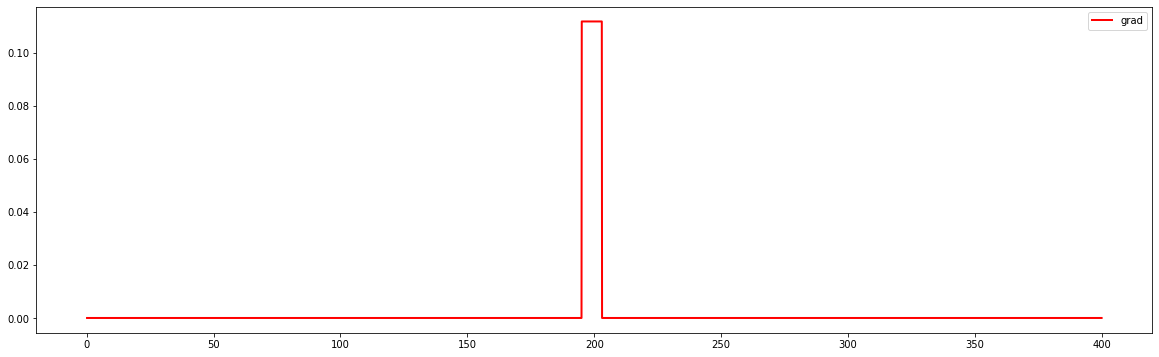

___
iteration: 200


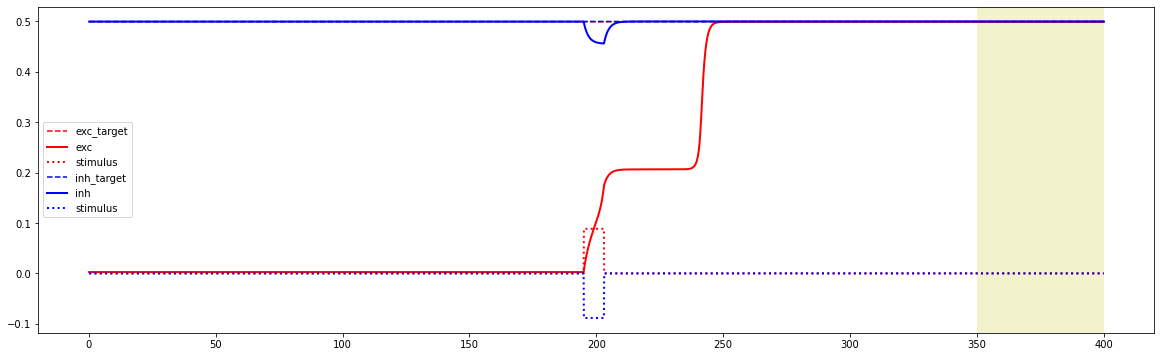

gradient:


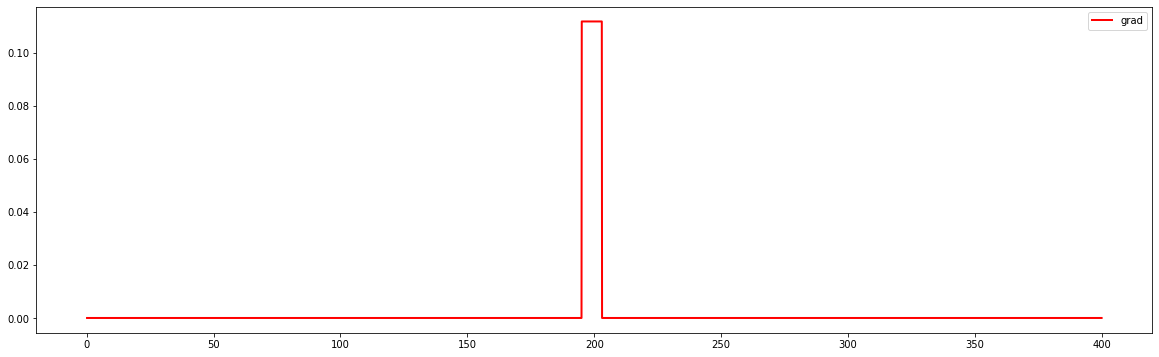

___
iteration: 220


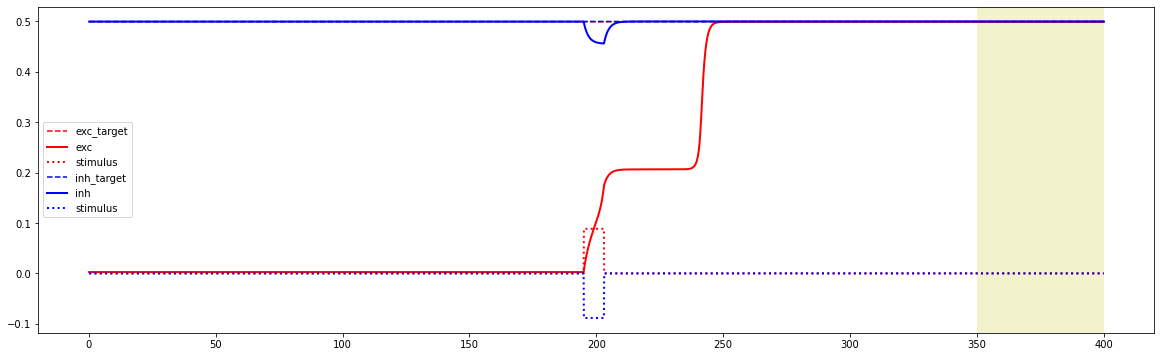

gradient:


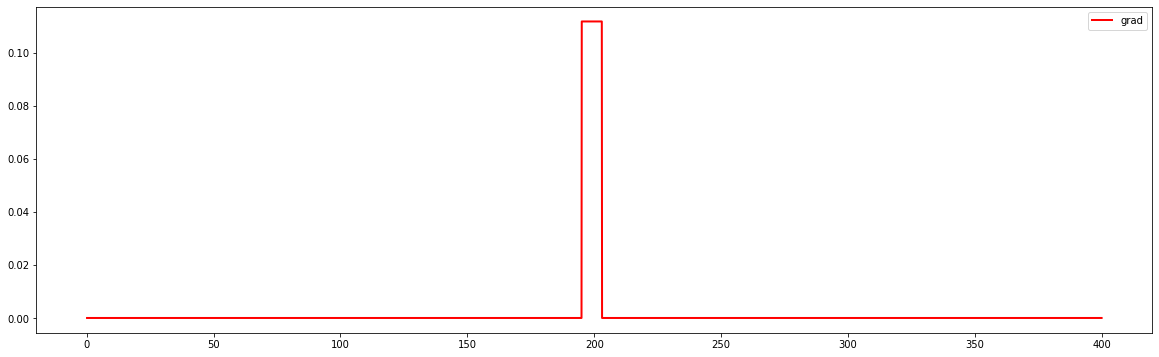

___
iteration: 240


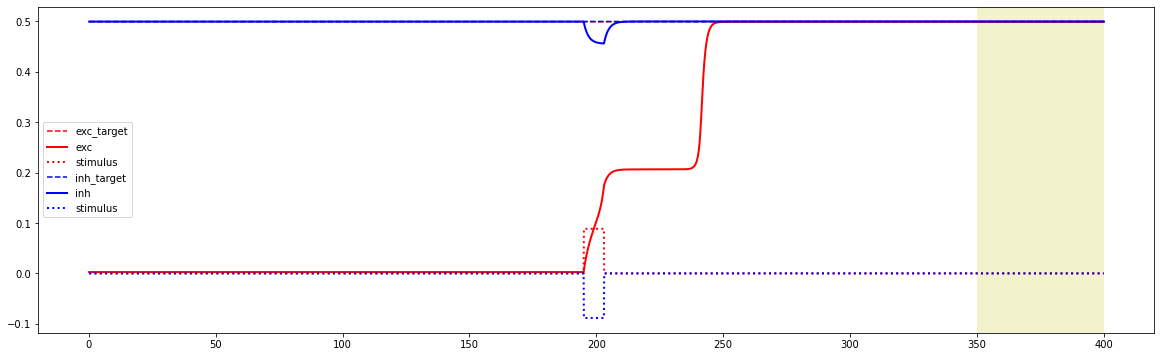

gradient:


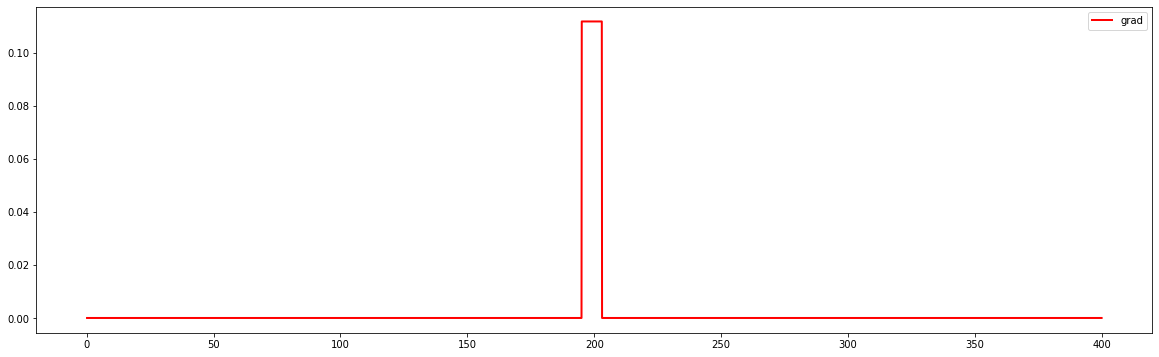

___
iteration: 260


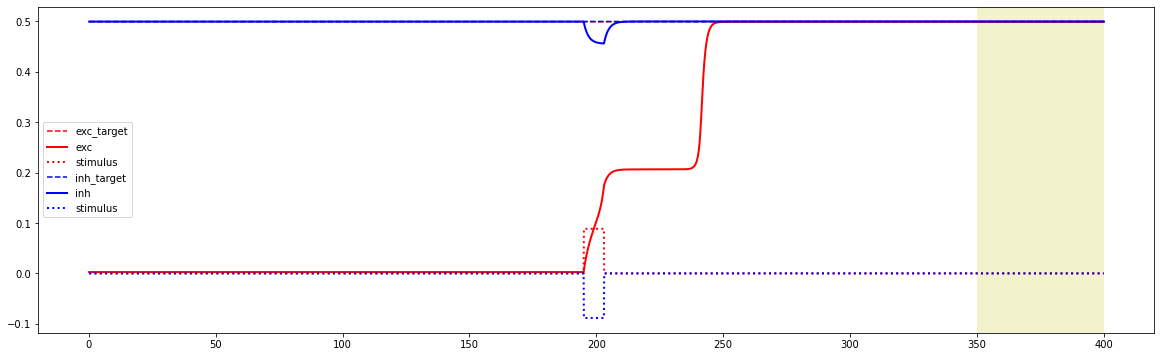

gradient:


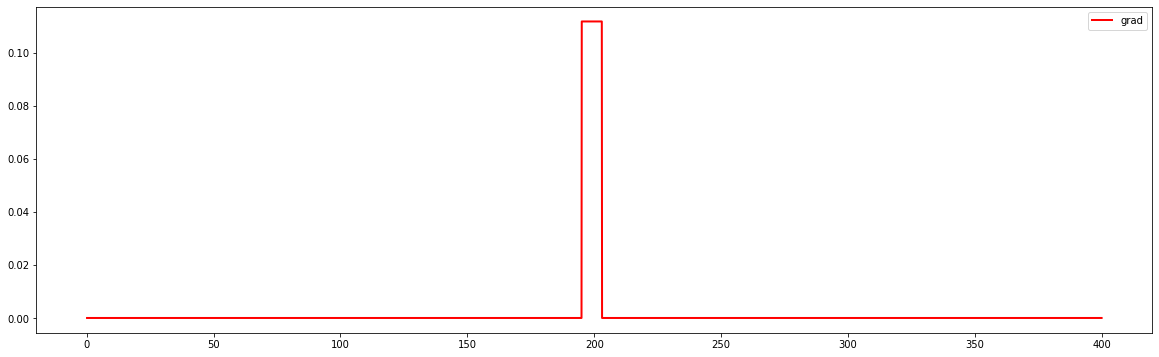

___
iteration: 280


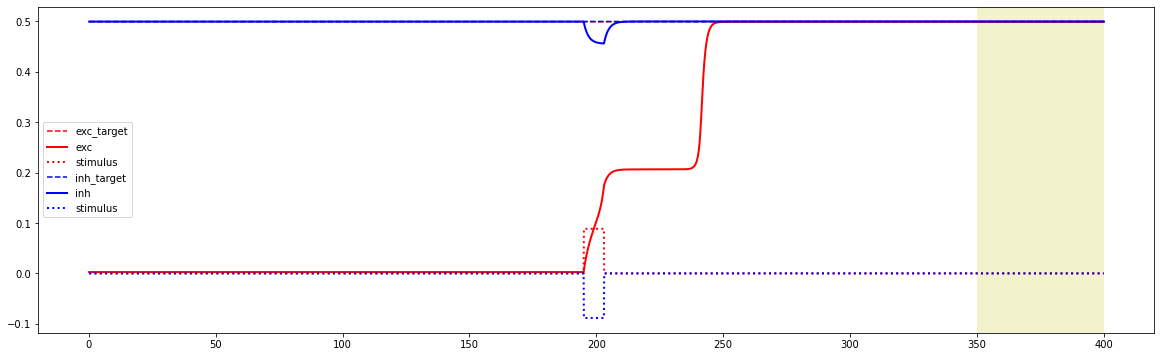

gradient:


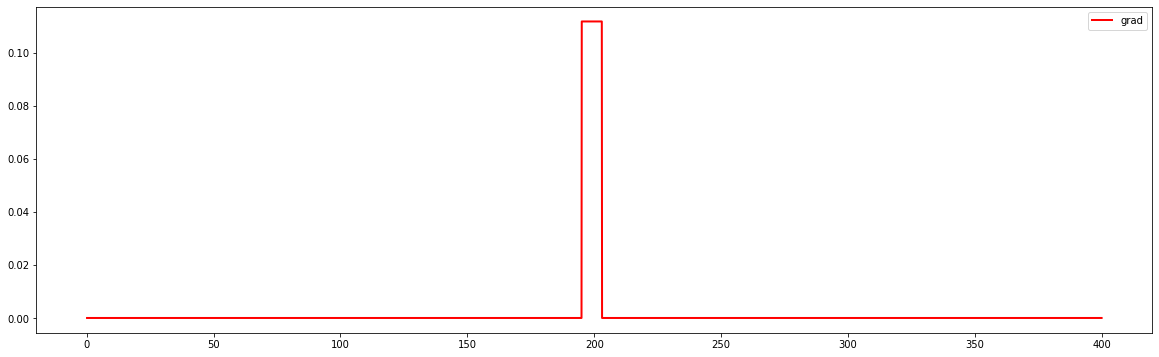

___
iteration: 300


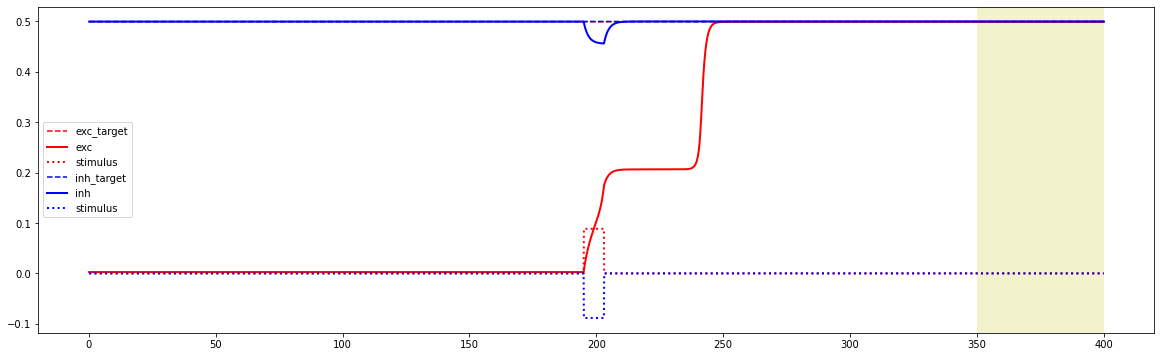

gradient:


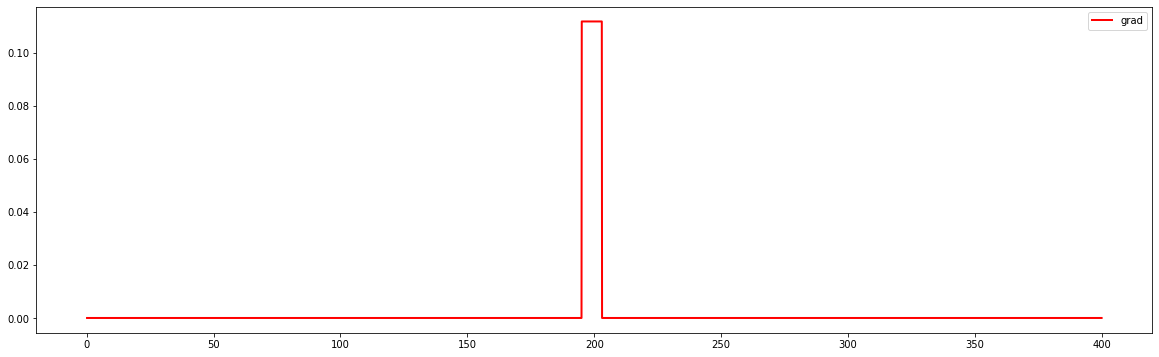

___
iteration: 320


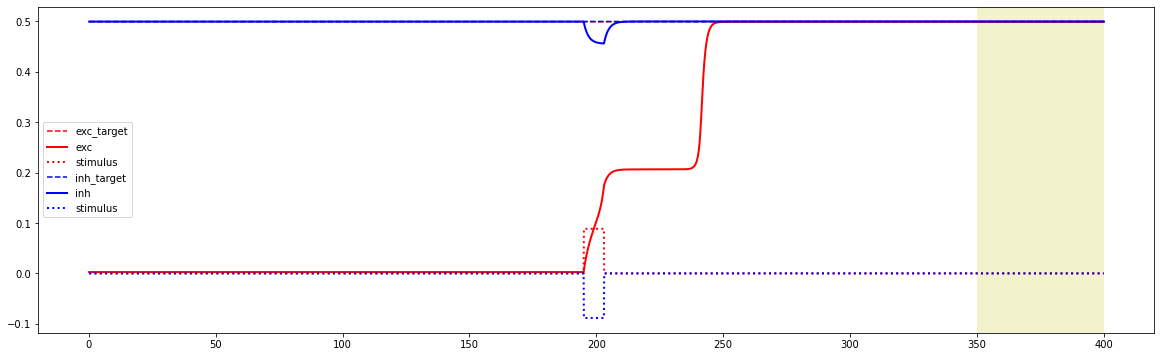

gradient:


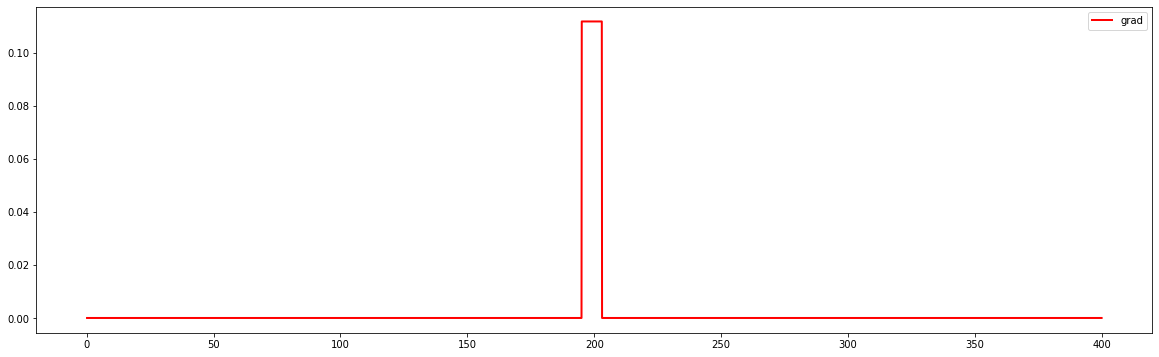

___
iteration: 340


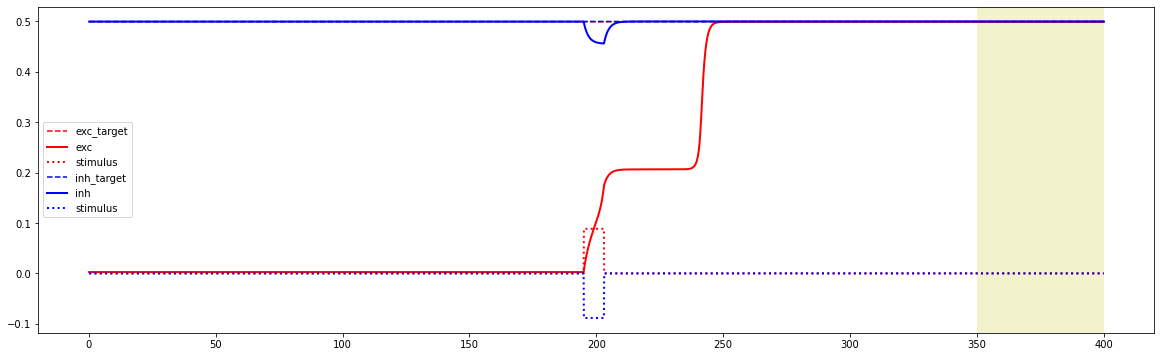

gradient:


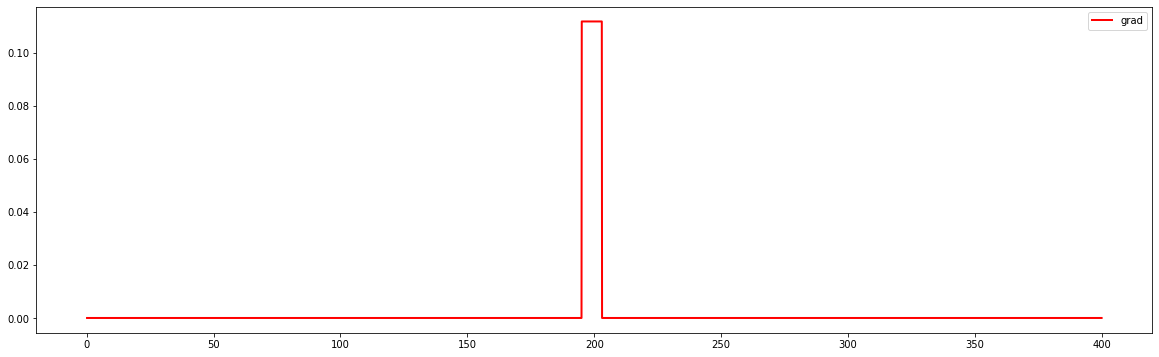

___
iteration: 360


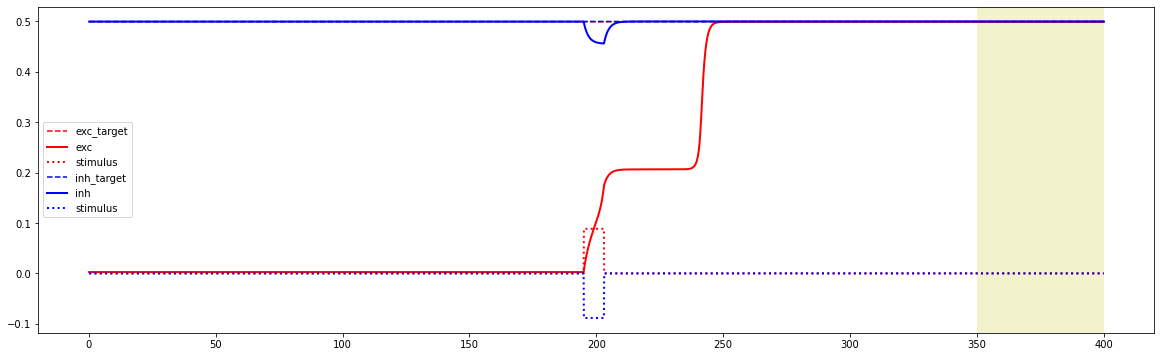

gradient:


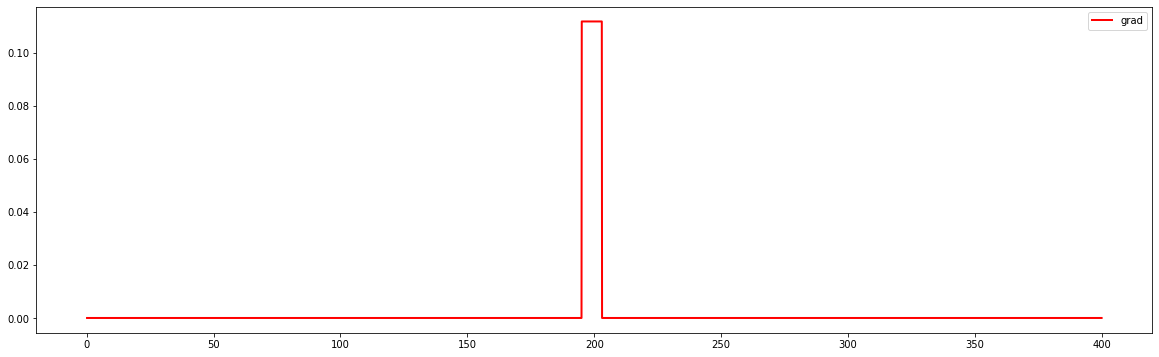

___
iteration: 380


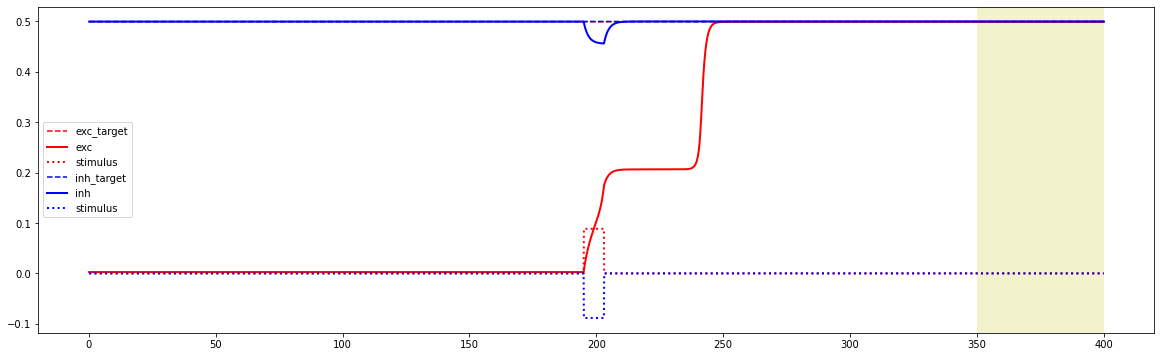

gradient:


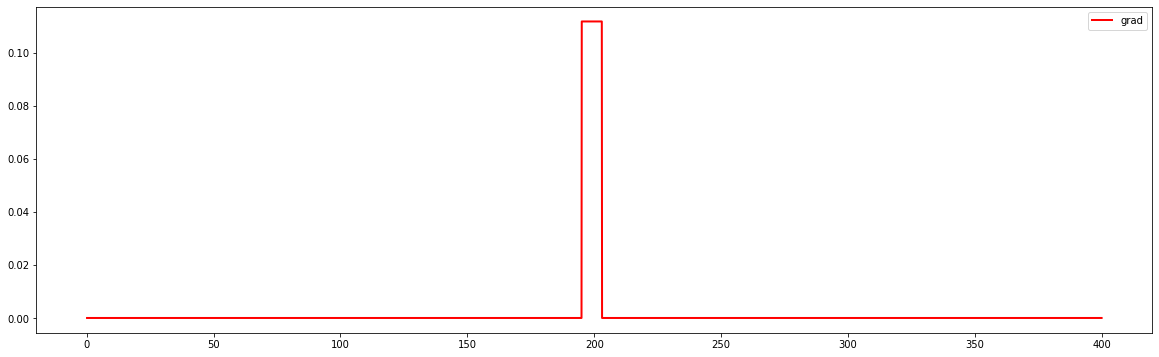

In [121]:
for a,b in ext_list:
    parameters_prep(a, b, 400)

exc_ext, inh_ext 3.05 3.05


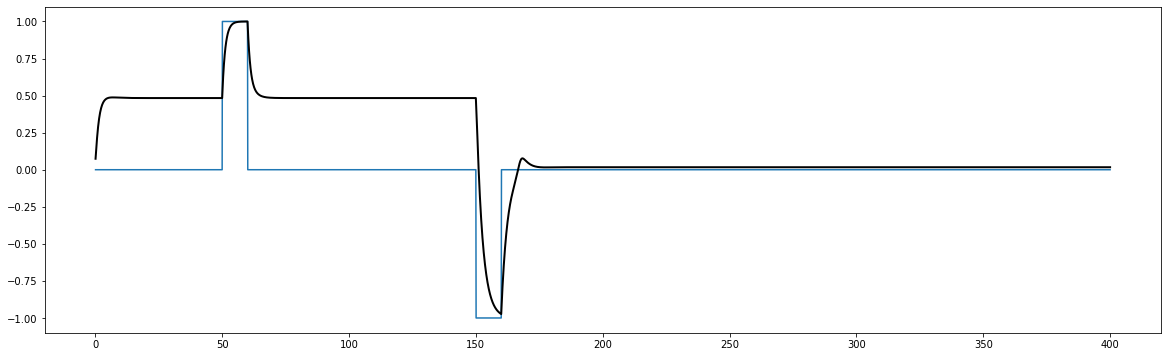

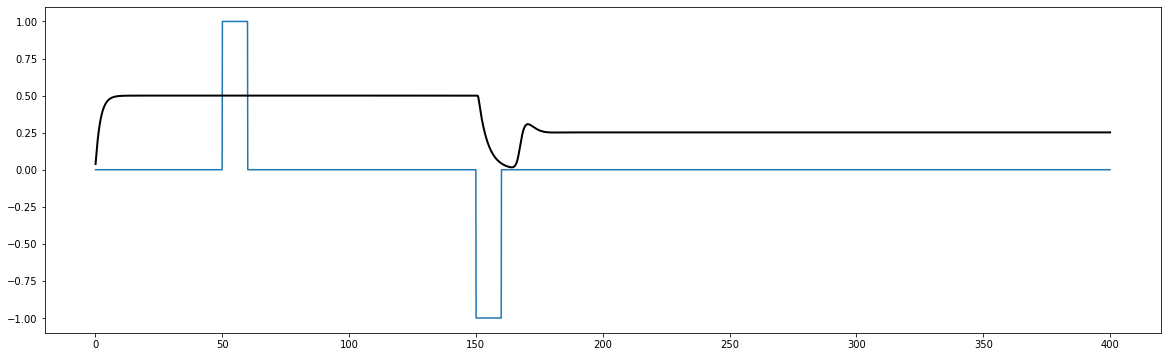

w 1
whaaa2 [0]
___
iteration: 0


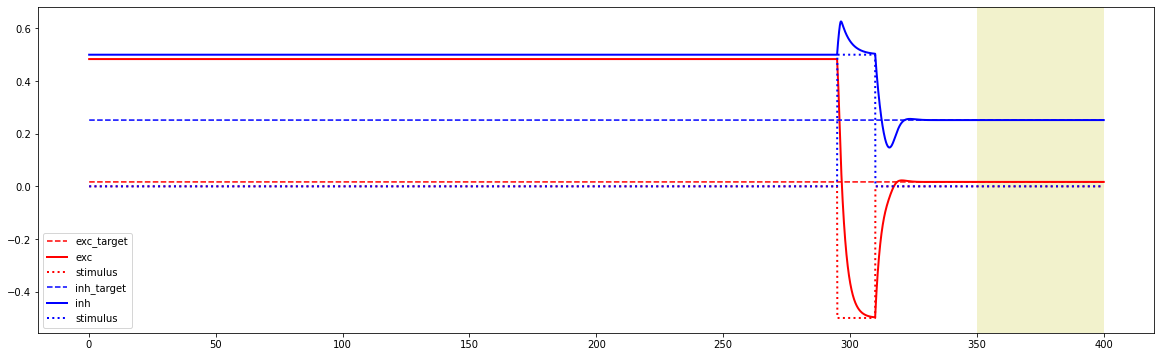

whaaa [0]
what [0]
[0. 0. 0. ... 0. 0. 0.]


IndexError: list index out of range

In [24]:
for a,b in ext_list:
    parameters_prep(a, b, 400)

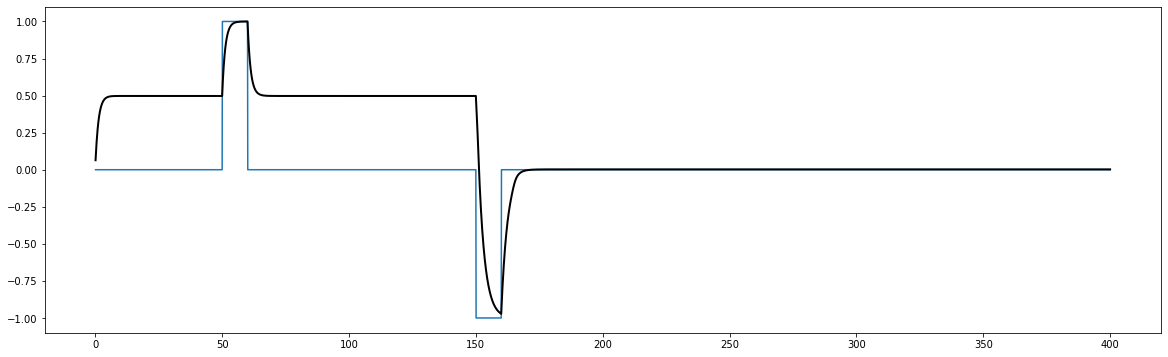

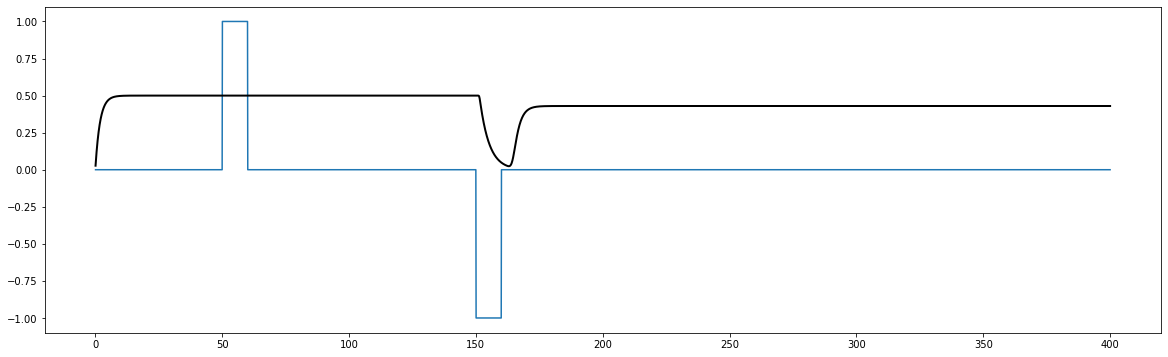

w 15
___
iteration: 0


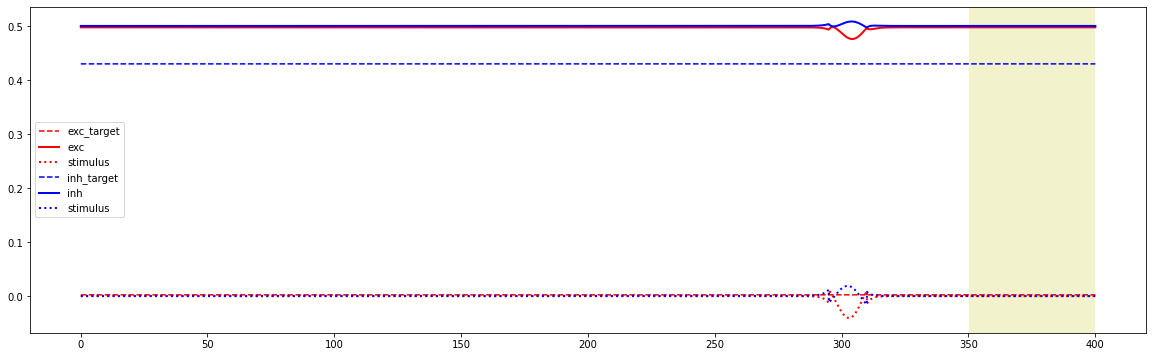

gradient:


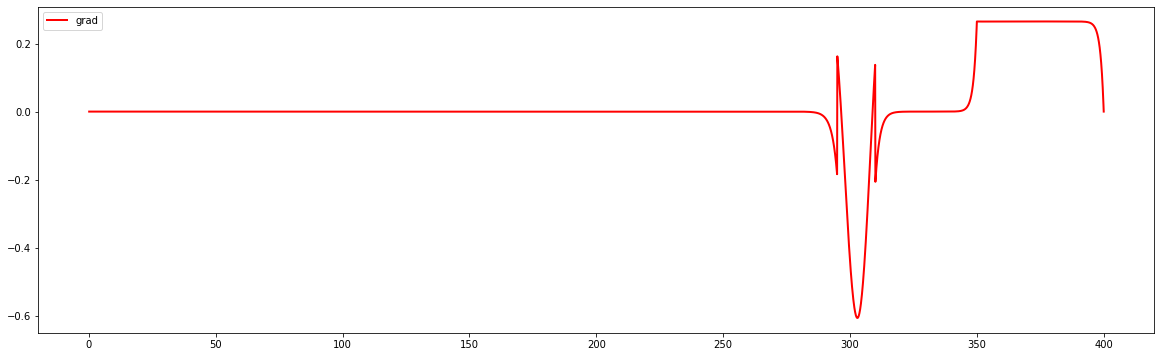

___
iteration: 10


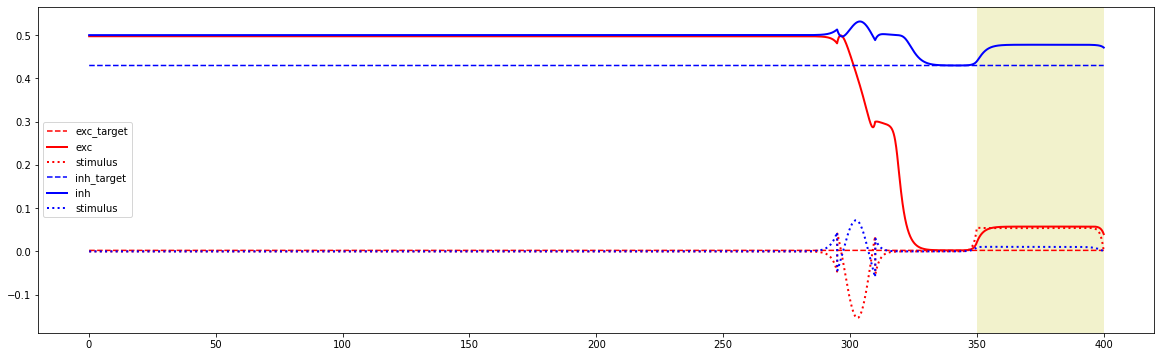

gradient:


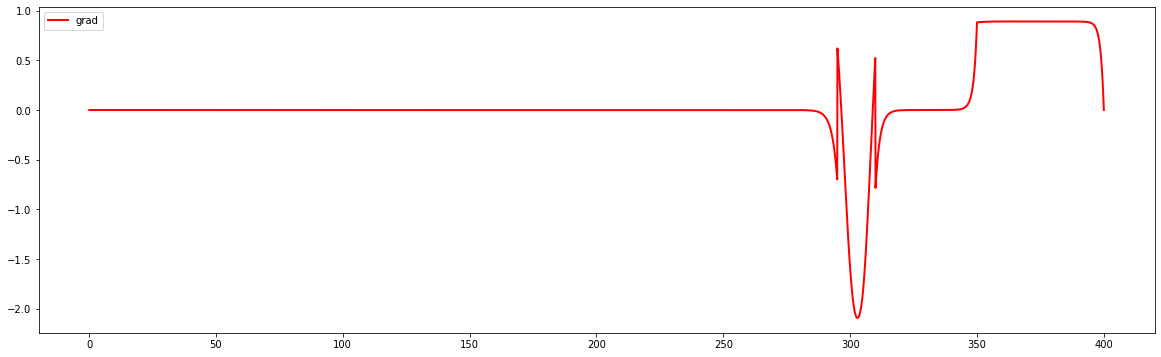

___
iteration: 20


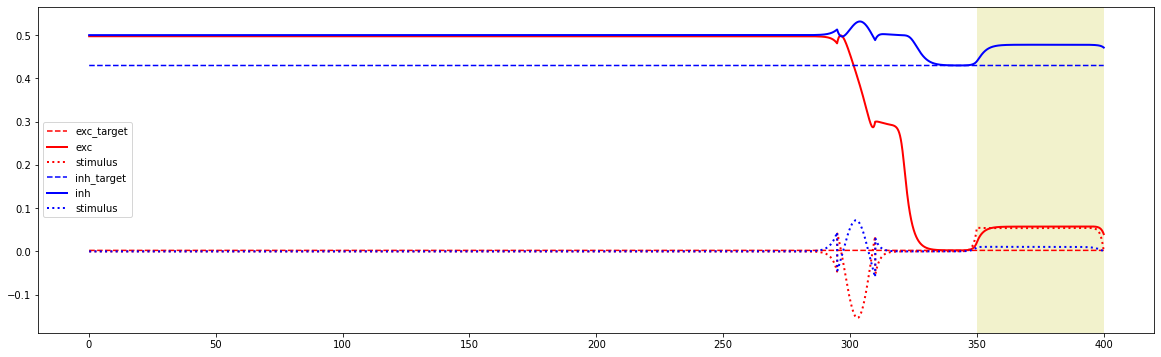

gradient:


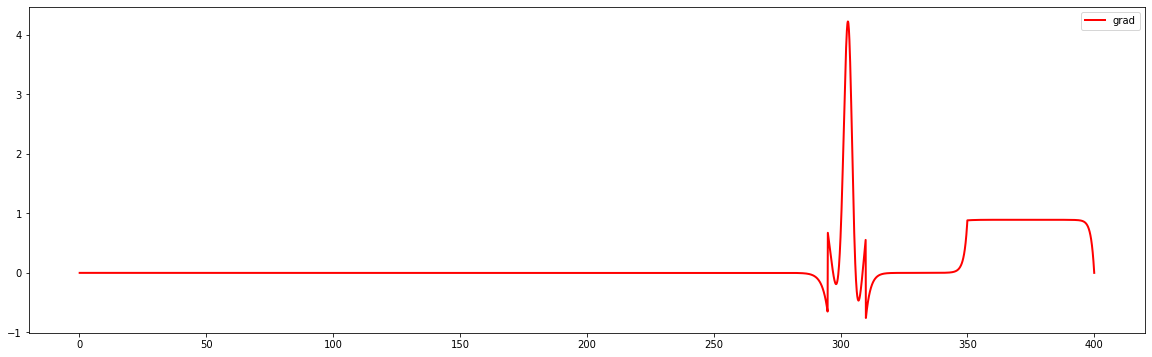

___
iteration: 30


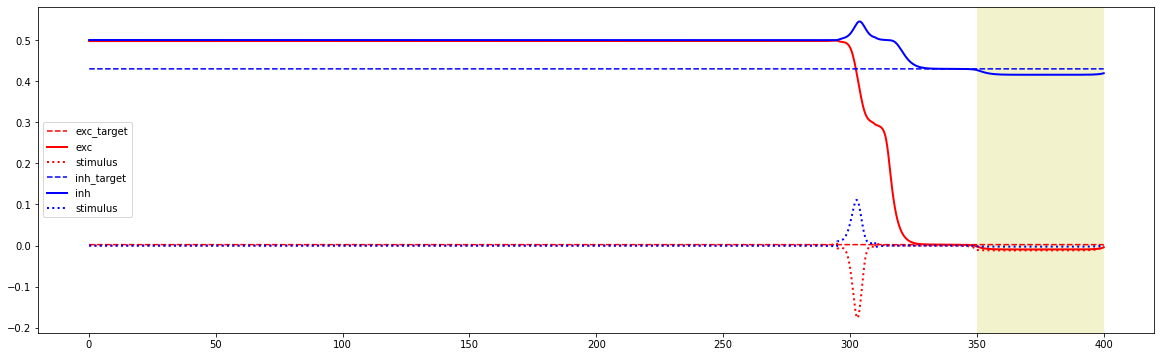

gradient:


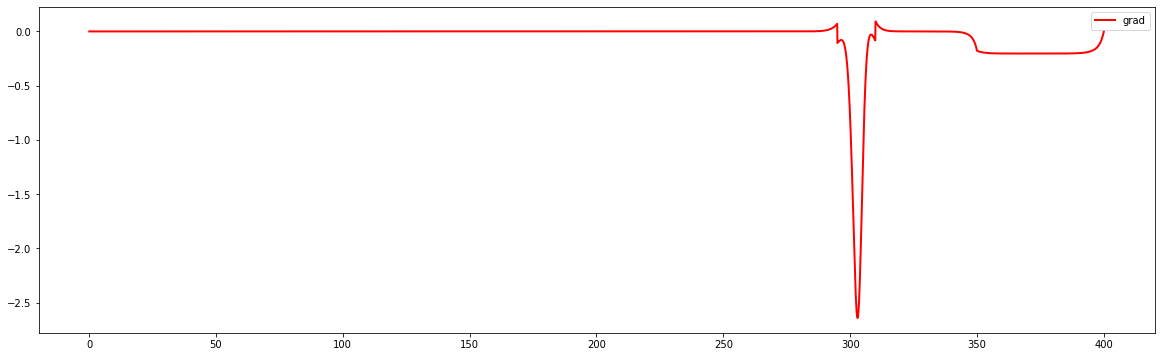

___
iteration: 40


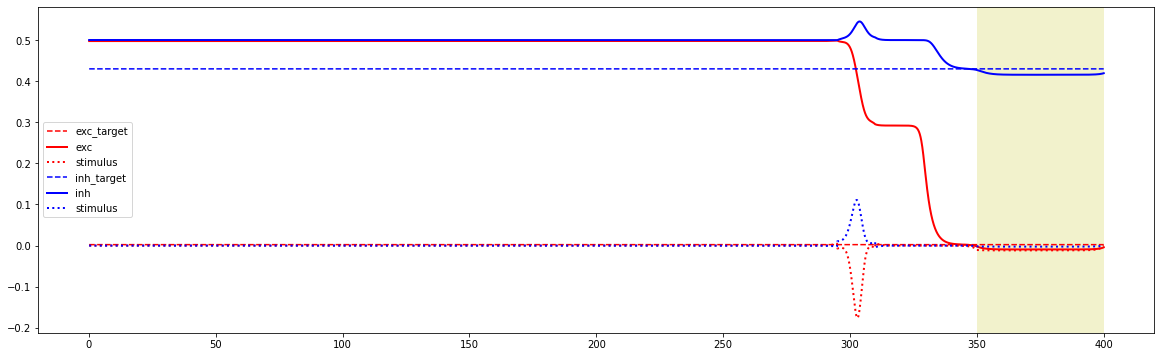

gradient:


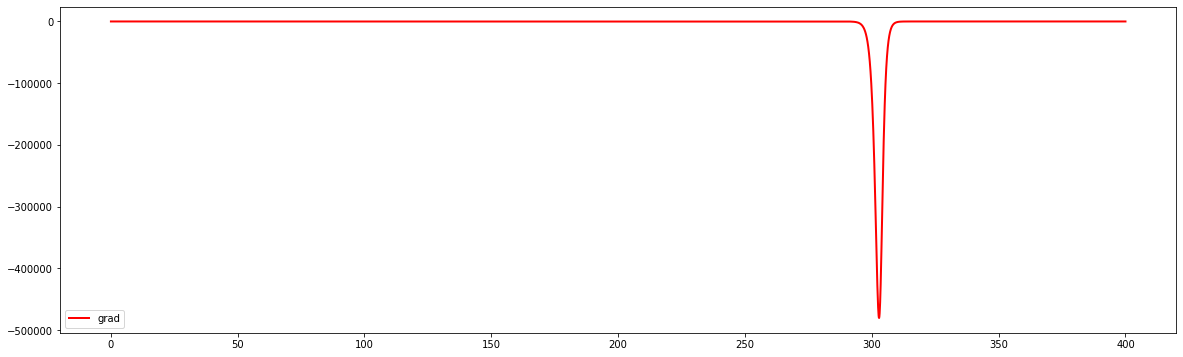

KeyboardInterrupt: 

In [83]:
parameters_prep(4.09, 5, 400, stimulus_exc.T, stimulus_inh.T)

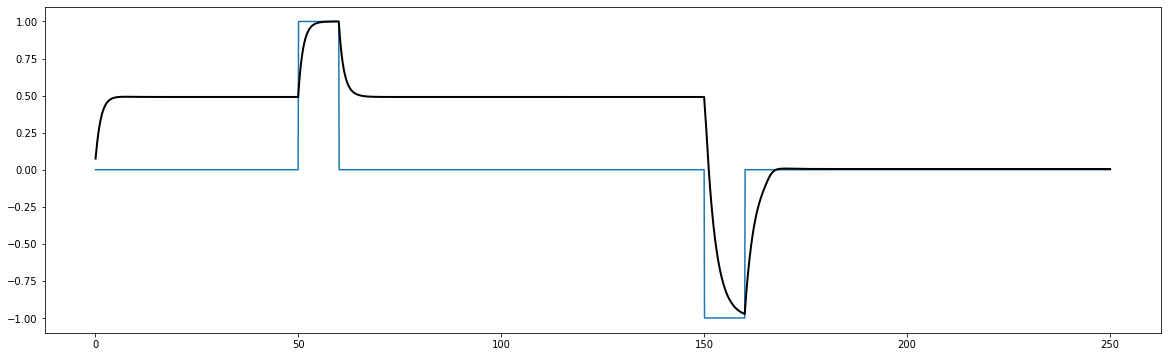

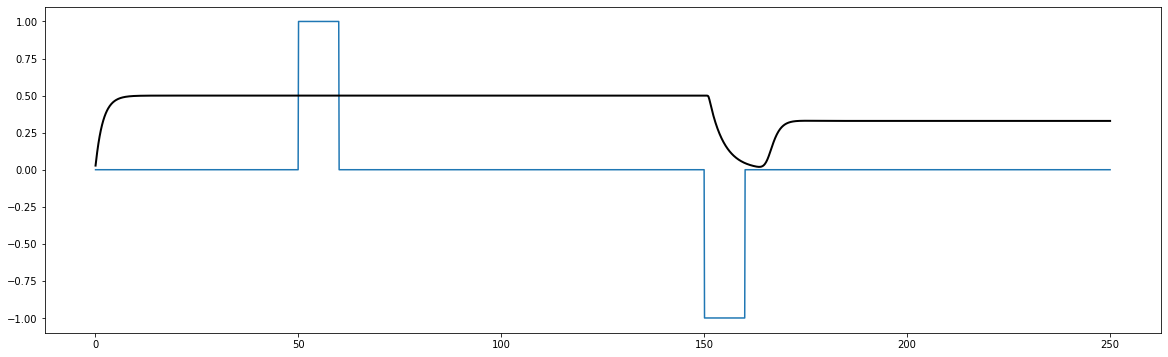

i 0.5
___
iteration: 0


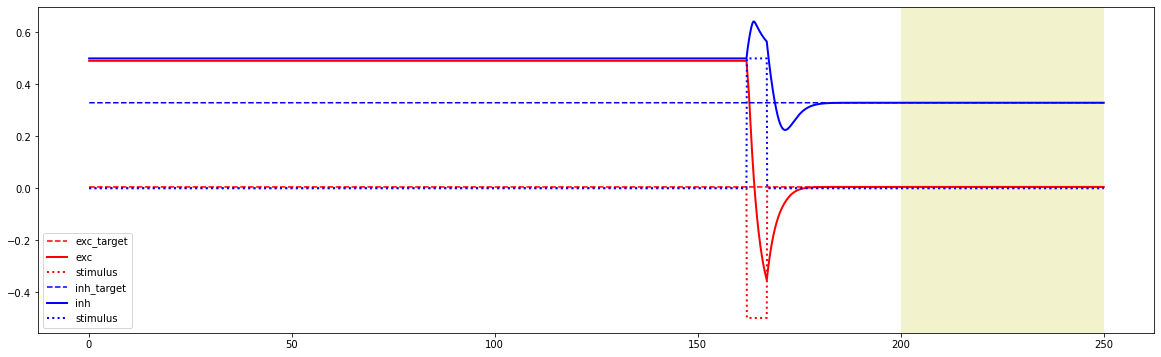

gradient:


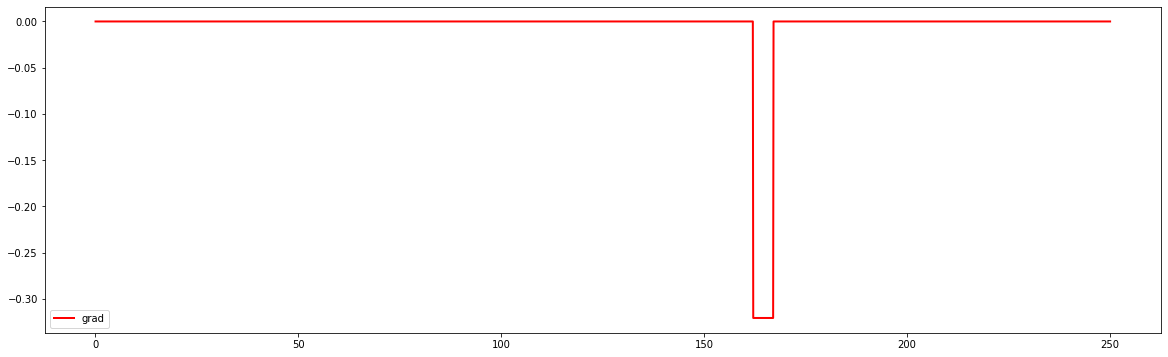

___
iteration: 50


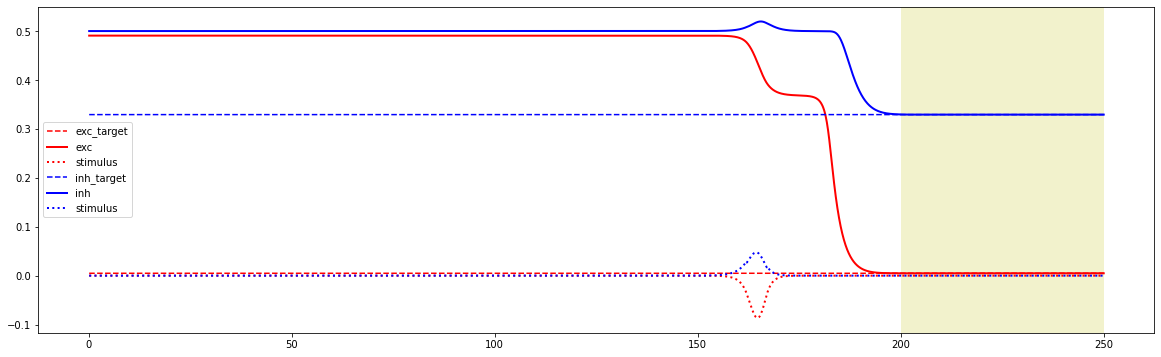

gradient:


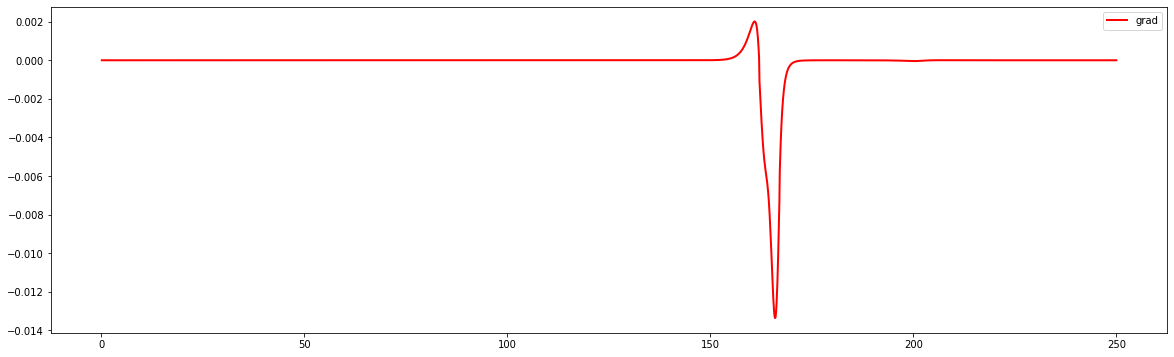

KeyboardInterrupt: 

In [92]:
parameters_prep(3.33, 3.89)

___
iteration: 0


ValueError: x and y must have same first dimension, but have shapes (2500,) and (4000,)

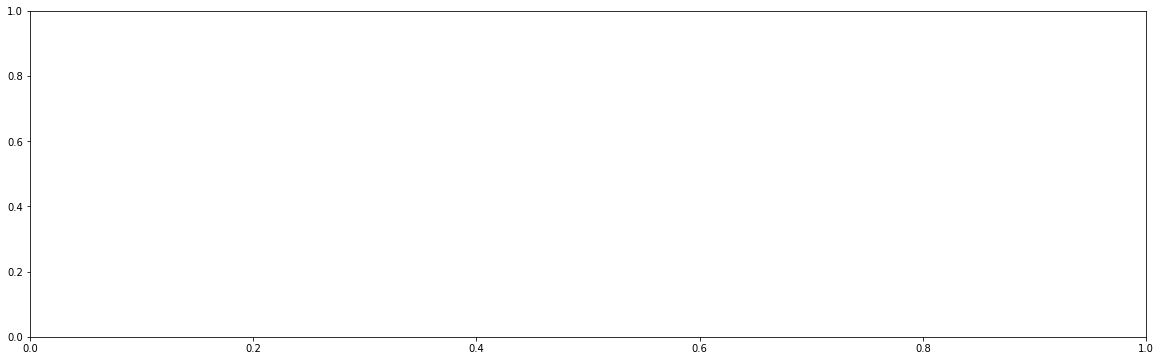

In [142]:
wc = WCModel()
wc.params['exc_ext'] = 3.33
wc.params['inh_ext'] = 5
wc.params['duration'] = 250

stimulus_exc = stim.StepInput(step_size=-0.5,  start=100, end=105, n=1).to_model(wc)
stimulus_inh = stim.StepInput(step_size=0.5,  start=100, end=105, n=1).to_model(wc)
optimal_control(wc, target_exc,target_inh, stimulus_exc, stimulus_inh, exc_init=None, inh_init=None, n_iter = 2000, plot_freq = 50, w = [0.1,0.1], a = 2000,debug = False)

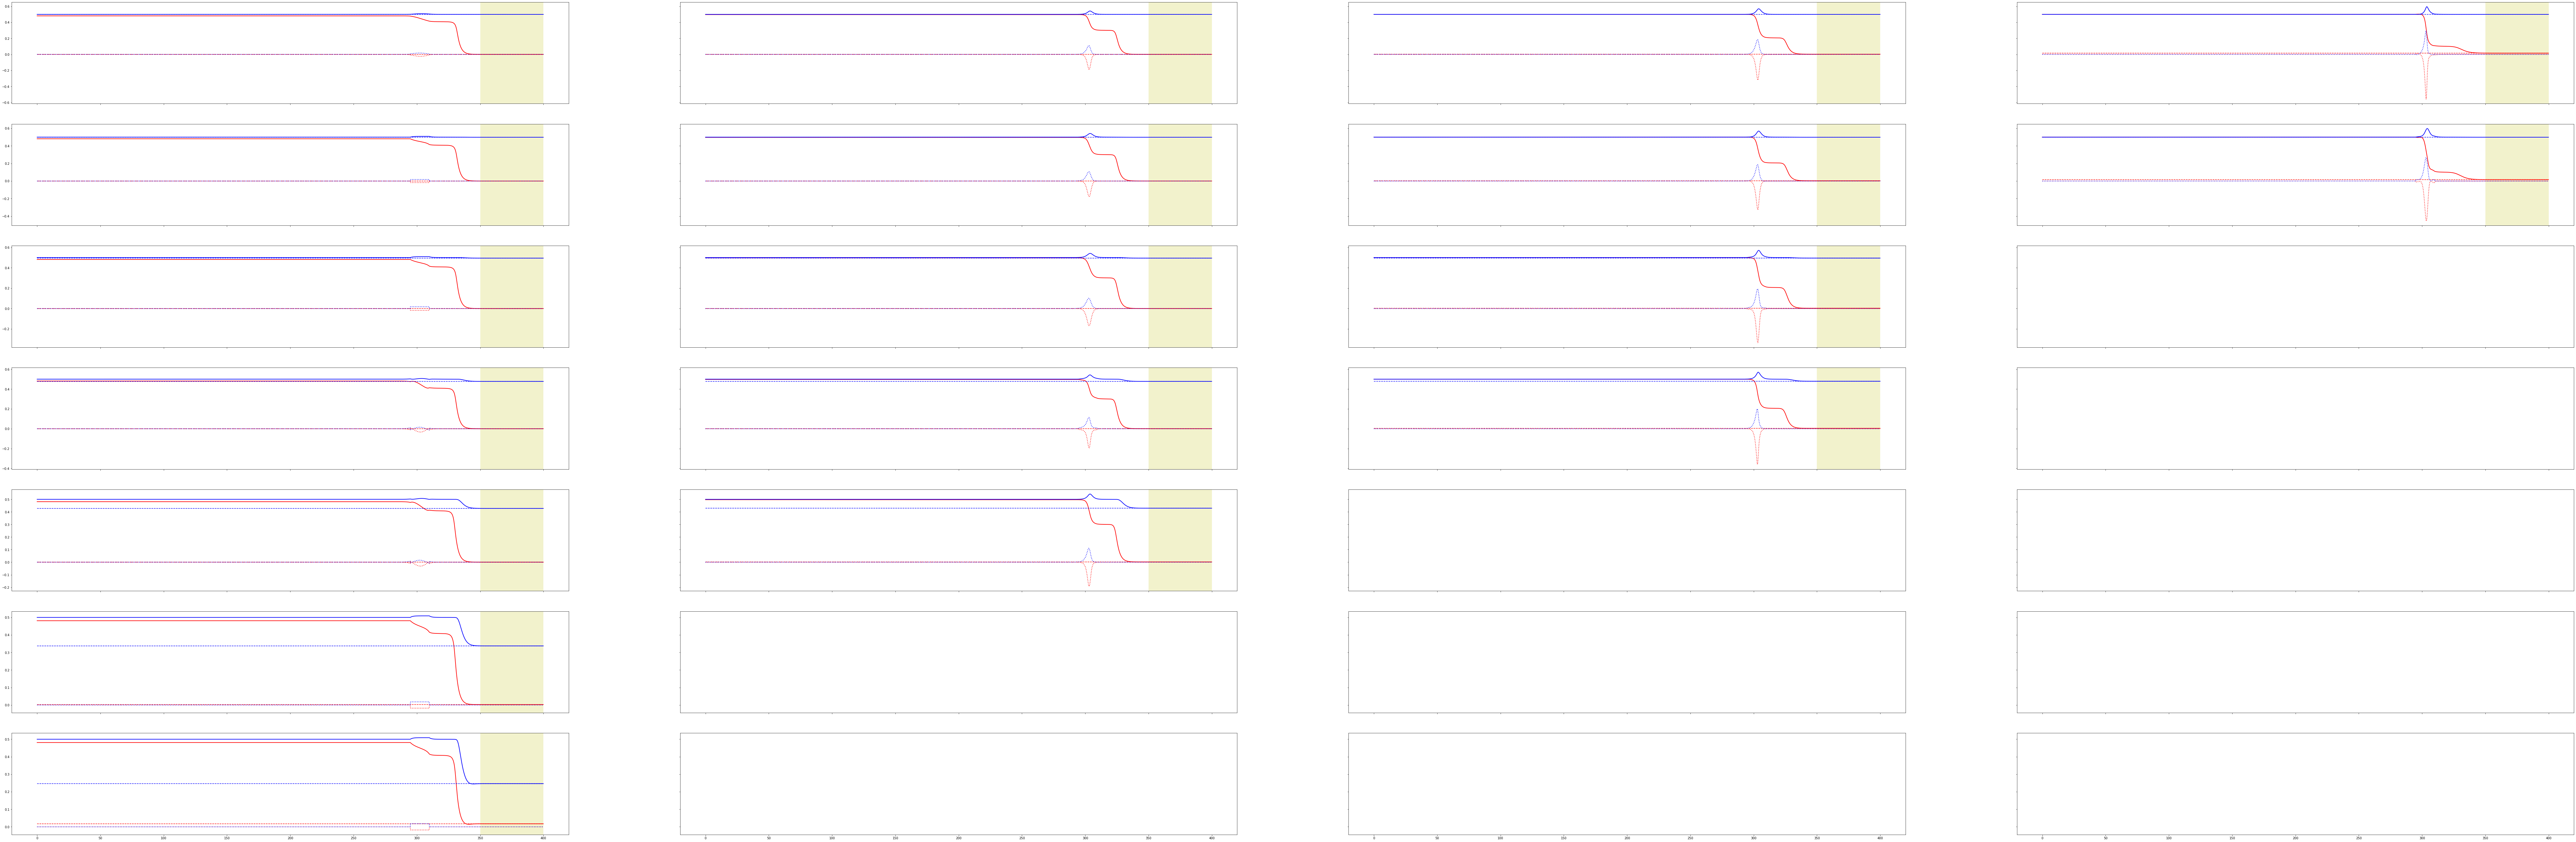

In [210]:
fig,a =  plt.subplots(7,4,  sharex='col', sharey='row', figsize=(150,50))

points_exc = []
points_inh = []

for i_i, i in enumerate(np.arange(3,7)):
    for j_j, j in enumerate(np.arange(3,10)):
        try:
            data = np.load('../400_1_3_5_7_9_5_3_1/'+str(i)+'_'+str(j)+'.npz')
        except FileNotFoundError:
            continue
        
        with np.load('../400_1_3_5_7_9_5_3_1/'+str(i)+'_'+str(j)+'.npz') as data:
            exc = data['exc']
            target_exc = data['target_exc']
            stimulus_exc = data['stimulus_exc']
            inh = data['inh']
            target_inh = data['target_inh']
            stimulus_inh = data['stimulus_inh']
            t = np.arange(0,400,0.1)
        
        
            
        
        points_exc.append((d_s[ext_list_full.index((i,j))][0], abs(stimulus_exc.min())))
        points_inh.append((d_s[ext_list_full.index((i,j))][1], abs(stimulus_inh.max())))
        a[6-j_j][i_i].plot(t, target_exc, '--', c = 'r', label="exc_target")
        a[6-j_j][i_i].plot(t, exc, c='r', lw = 2, label="exc")
        a[6-j_j][i_i].plot(t, stimulus_exc, ':', c='r', lw = 2,label="stimulus")
        a[6-j_j][i_i].axvspan(350, 400, color='y', alpha=0.2, lw=0)

        a[6-j_j][i_i].plot(t, target_inh, '--', c = 'blue',label="inh_target")
        a[6-j_j][i_i].plot(t, inh, c='blue', lw = 2, label="inh")
        a[6-j_j][i_i].plot(t, stimulus_inh, ':', c='blue', lw = 2,label="stimulus")


#fig.savefig('../400_1_3_5_1_downup_w0i_early/400_1_3_5_1_downup_w0i_early.png', dpi=fig.dpi)
#plt.scatter(*zip(*points))


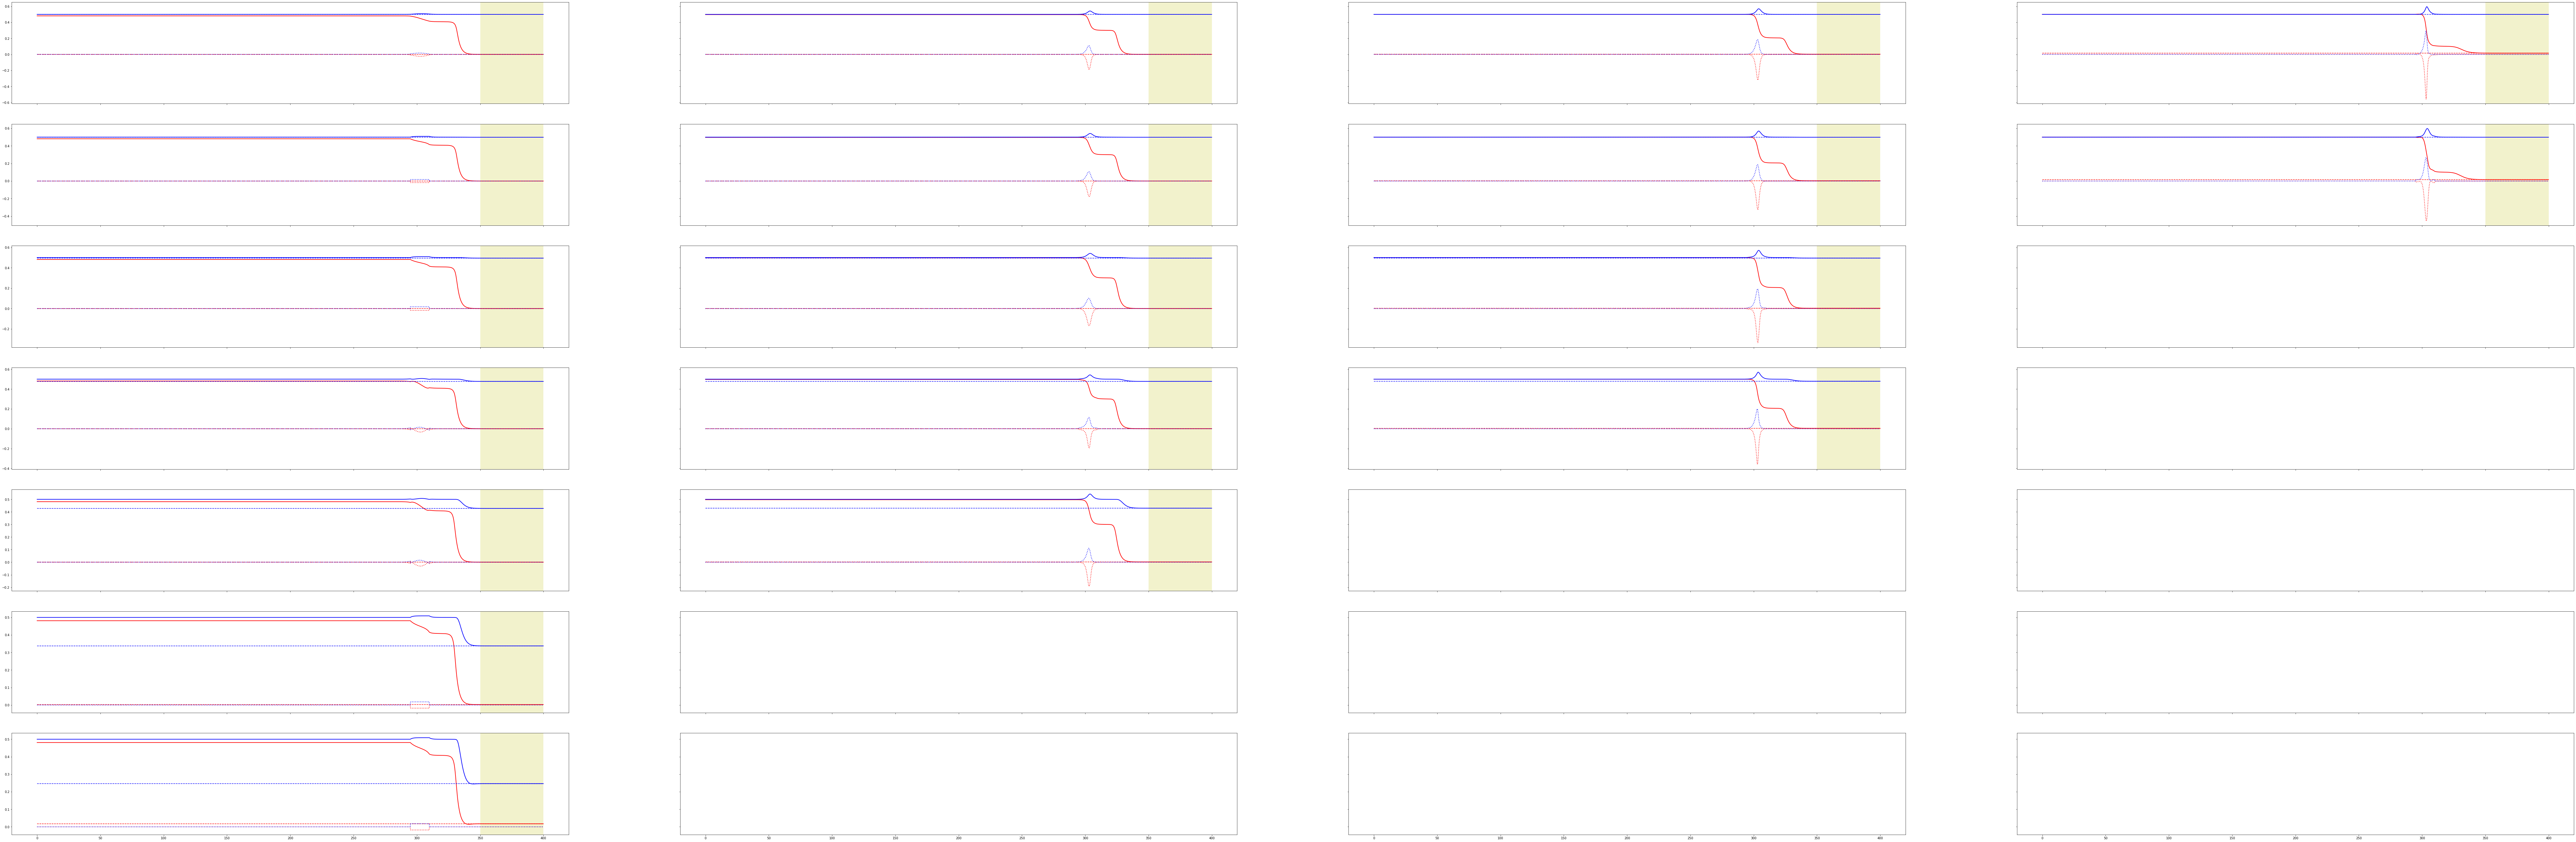

In [247]:
fig,a =  plt.subplots(7,4,  sharex='col', sharey='row', figsize=(150,50))

points_exc = []
points_inh = []

for i_i, i in enumerate(np.arange(3,7)):
    for j_j, j in enumerate(np.arange(3,10)):
        try:
            data = np.load('../400_1_3_5_7_9_5_3_1/'+str(i)+'_'+str(j)+'.npz')
        except FileNotFoundError:
            continue
        
        with np.load('../400_1_3_5_7_9_5_3_1/'+str(i)+'_'+str(j)+'.npz') as data:
            exc = data['exc']
            target_exc = data['target_exc']
            stimulus_exc = data['stimulus_exc']
            inh = data['inh']
            target_inh = data['target_inh']
            stimulus_inh = data['stimulus_inh']
            t = np.arange(0,400,0.1)
        
        
            
        
        points_exc.append((d_s[ext_list_full.index((i,j))][0], abs(stimulus_exc.max())))
        points_inh.append((d_s[ext_list_full.index((i,j))][1], abs(stimulus_inh.min())))
        a[6-j_j][i_i].plot(t, target_exc, '--', c = 'r', label="exc_target")
        a[6-j_j][i_i].plot(t, exc, c='r', lw = 2, label="exc")
        a[6-j_j][i_i].plot(t, stimulus_exc, ':', c='r', lw = 2,label="stimulus")
        a[6-j_j][i_i].axvspan(350, 400, color='y', alpha=0.2, lw=0)

        a[6-j_j][i_i].plot(t, target_inh, '--', c = 'blue',label="inh_target")
        a[6-j_j][i_i].plot(t, inh, c='blue', lw = 2, label="inh")
        a[6-j_j][i_i].plot(t, stimulus_inh, ':', c='blue', lw = 2,label="stimulus")


#fig.savefig('../400_1_3_5_1_downup_w0i_early/400_1_3_5_1_downup_w0i_early.png', dpi=fig.dpi)
#plt.scatter(*zip(*points))


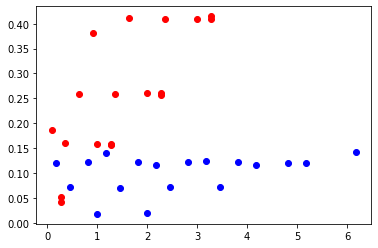

In [246]:
plt.scatter(*zip(*points_exc), color = "red")
plt.scatter(*zip(*points_inh), color = "blue")


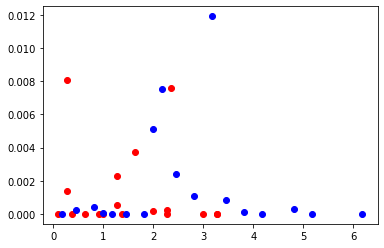

In [248]:
plt.scatter(*zip(*points_exc), color = "red")
plt.scatter(*zip(*points_inh), color = "blue")


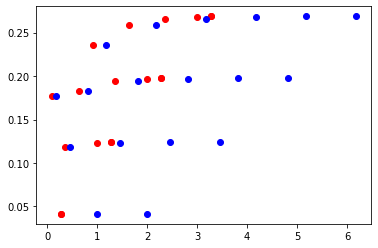

In [190]:
plt.scatter(*zip(*points_exc), color = "red")
plt.scatter(*zip(*points_inh), color = "blue")


In [219]:
#one experiment
## x-axis for the plot
dt = 0.1
x_data = np.arange(0, 400, dt)
print(len(x_data))

## y-axis as the gaussian
y_data = -5*stats.norm.pdf(x_data, 100, 2)
y_data2 = 5*stats.norm.pdf(x_data, 100, 2)
tt = np.zeros((1,len(x_data)))
#tt[0] = list(y_data)

tt2 = np.zeros((1,len(x_data)))
#tt2[0] = list(y_data2)
parameters_prep(6, 9, 400, dt, tt, tt2)

4000


NameError: name 'stats' is not defined

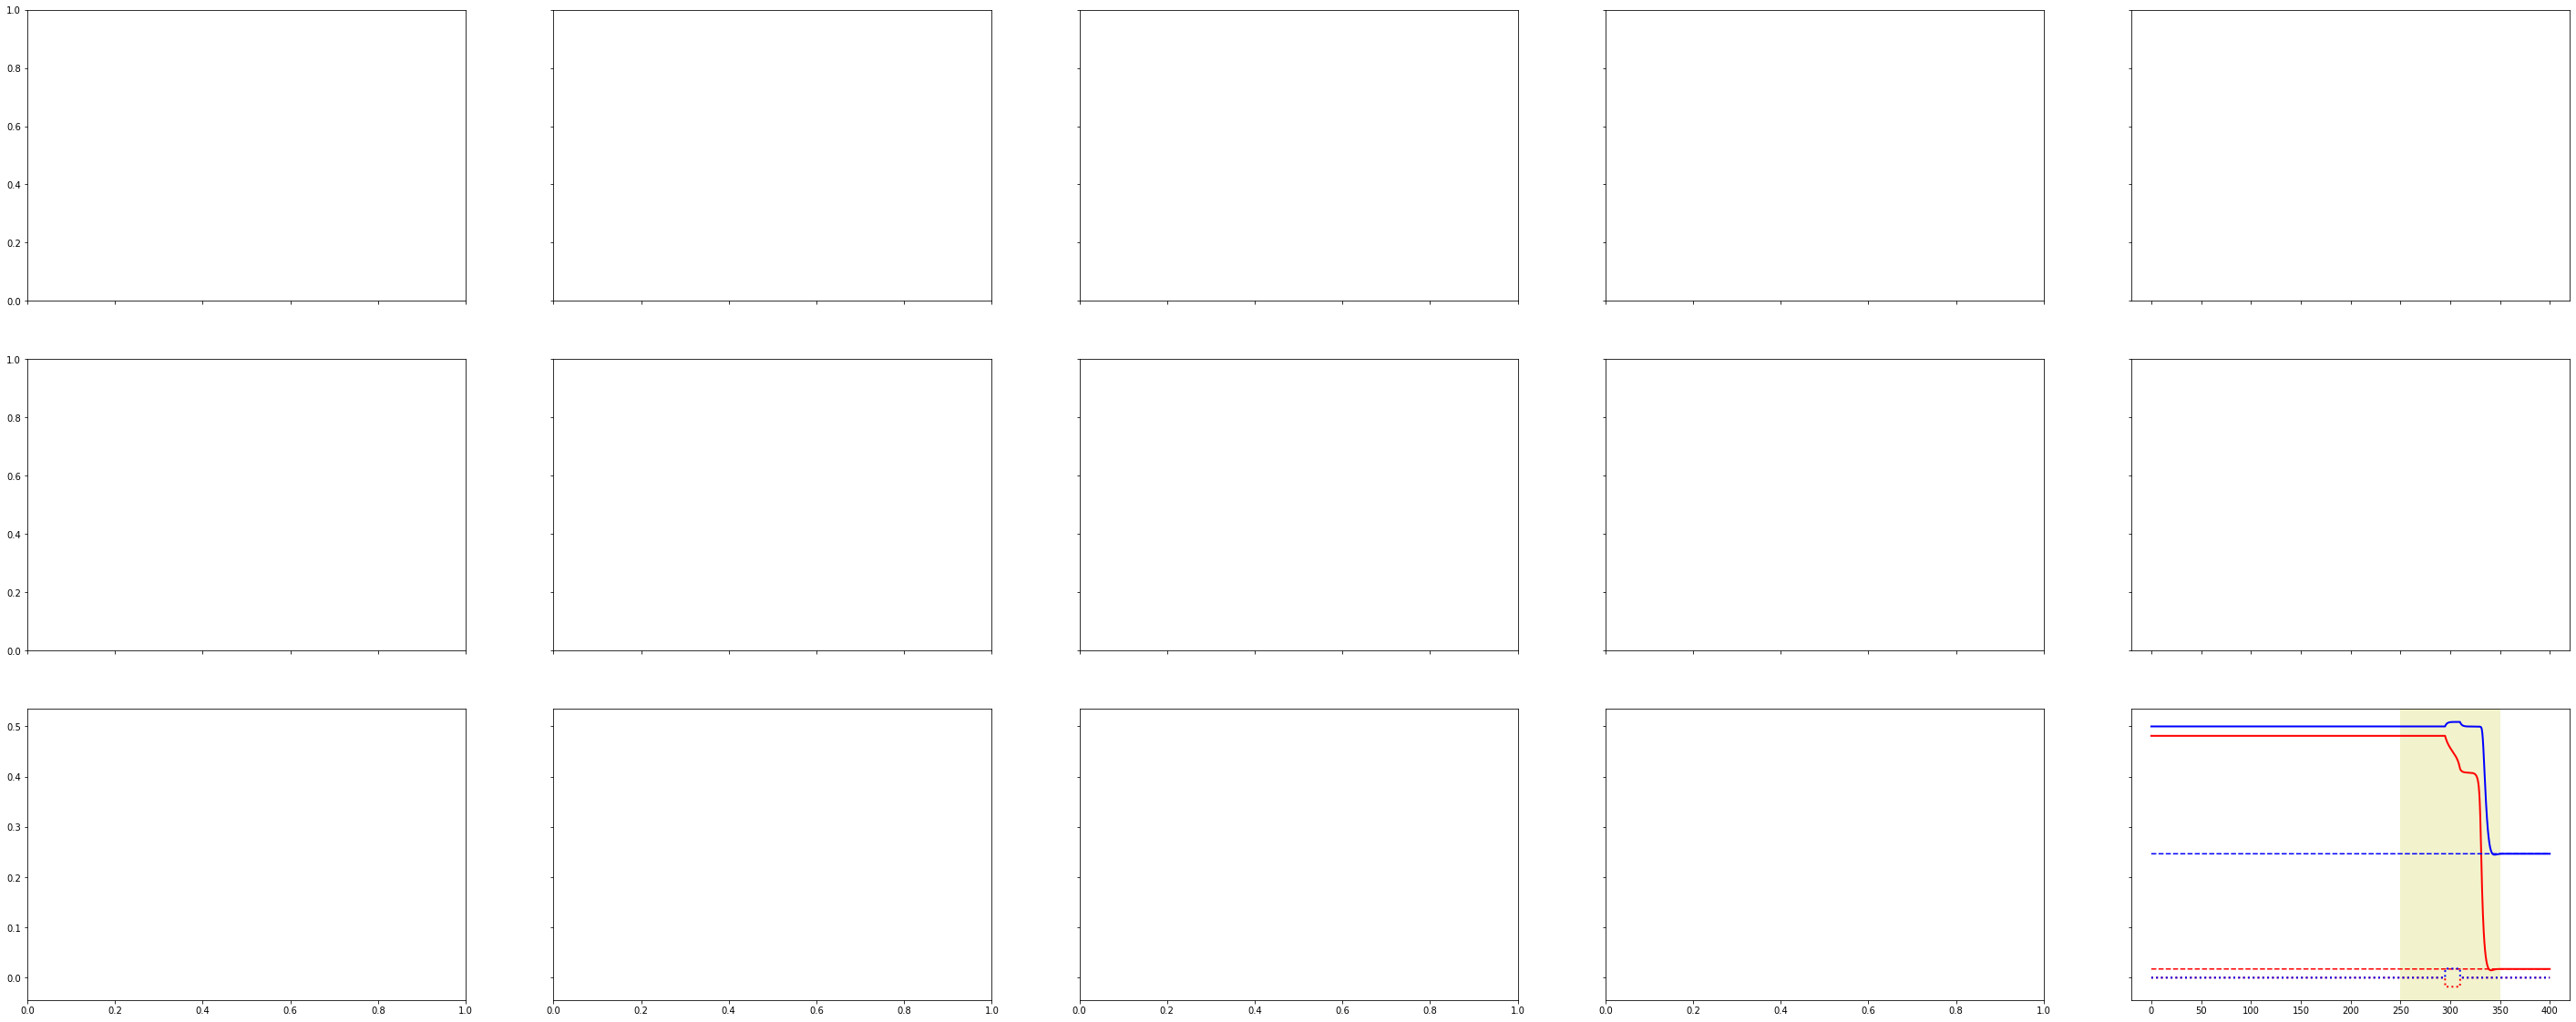

In [52]:
fig,a =  plt.subplots(3,5,  sharex='col', sharey='row', figsize=(50,20))
with np.load('../400_1_3_5_7_9_5_3_1/3_3.npz') as data:
    exc = data['exc']
    target_exc = data['target_exc']
    stimulus_exc = data['stimulus_exc']
    inh = data['inh']
    target_inh = data['target_inh']
    stimulus_inh = data['stimulus_inh']
    t = np.arange(0,400,0.1)

    plt.plot(t, target_exc, '--', c = 'r', label="exc_target")
    plt.plot(t, exc, c='r', lw = 2, label="exc")
    plt.plot(t, stimulus_exc, ':', c='r', lw = 2,label="stimulus")
    plt.axvspan((3500)*wc.params['dt'], wc.params['duration'], color='y', alpha=0.2, lw=0)

    plt.plot(t, target_inh, '--', c = 'blue',label="inh_target")
    plt.plot(t, inh, c='blue', lw = 2, label="inh")
    plt.plot(t, stimulus_inh, ':', c='blue', lw = 2,label="stimulus")


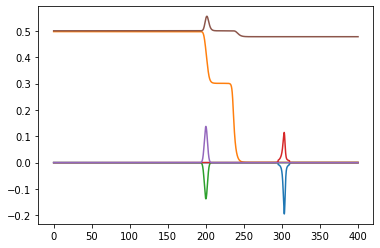

[0.6202861]
[0.33403825]


In [215]:
#script for plotting 


filepath = "../400_1_3_5_7_9_5_3_1/" #path to where experiment data is stored

i = 4
j = 6
with np.load(filepath+str(i)+'_'+str(j)+'.npz') as data:
    exc = data['exc']
    target_exc = data['target_exc']
    stimulus_exc = data['stimulus_exc']
    inh = data['inh']
    target_inh = data['target_inh']
    stimulus_inh = data['stimulus_inh']
    t = np.arange(0,400,0.1)
    

filepath2 = "../400_1_3_5_9_1_updown_wio_gauss200/" #path to where experiment data is stored

with np.load(filepath2+str(i)+'_'+str(j)+'.npz') as data:
    exc2 = data['exc']
    target_exc2 = data['target_exc']
    stimulus_exc2 = data['stimulus_exc']
    inh2 = data['inh']
    target_inh2 = data['target_inh']
    stimulus_inh2 = data['stimulus_inh']
    t2 = np.arange(0,400,0.1)
    
    

plt.plot(t, stimulus_exc)
plt.plot(t2, exc2)
plt.plot(t2, stimulus_exc2)
plt.plot(t, stimulus_inh)
plt.plot(t2, stimulus_inh2)
plt.plot(t2, inh2)
plt.show()

cost = cost_f([0,1], exc, target_exc, inh, target_inh, stimulus_exc.T, stimulus_inh.T, range(0, 4000), 0.9*4000)
print(cost)

cost2 = cost_f([0,1], exc2, target_exc2, inh2, target_inh2, stimulus_exc2.T, stimulus_inh2.T, range(0, 4000), 0.9*4000)
print(cost2/2)

In [58]:
target_exc = np.zeros(2500)
target_inh = np.zeros(2500)

target_exc[:] = 0.000751
target_inh[:] = 0.428077


#exc up 0.490690
#inh up 0.499998
#exc down 0.000751
#inh down 0.428077

#target_low[:] = 0.01093725 #0.02788229 
#target_low_inh[:] = 0.41653832 #0.35820838 

In [11]:
wc = WCModel()




#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
wc.params['exc_ext'] = 3.33
wc.params['inh_ext'] = 5#3.89
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1

#wc.params["a_exc"] = 1
#wc.params["a_inh"] = 1


wc.params['duration'] = 250



wc.params["exc_init"] = [[0.490690]]
wc.params["inh_init"] =[[0.499998]]

#wc.params["exc_init"] = [[0.45446237]]
#wc.params["inh_init"] = [[0.49949741]]

stimulus_zeros = np.zeros((1,2500))

stimulus = stim.StepInput(step_size=-0.5,  start=100, end=105, n=1).to_model(wc)
stimulus2 = stim.StepInput(step_size=0.5,  start=100, end=105, n=1).to_model(wc)


#stimulus[0][500:600] = 0
#plt.plot(stimulus.T)


#wc.params['exc_ext'] = 3.33
#wc.params['inh_ext'] = 3.89



optimal_control(wc, target_exc,target_inh, stimulus, stimulus2, exc_init= None, inh_init= None, n_iter = 5000, plot_freq = 100, w = [0.1,0.1], a = 2000,debug = False)


#optimal_control(wc, stimulus, target, target)

NameError: name 'target_exc' is not defined

In [66]:
wc = WCModel()




#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
wc.params['exc_ext'] = 3.33
wc.params['inh_ext'] = 5#3.89
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1

#wc.params["a_exc"] = 1
#wc.params["a_inh"] = 1


wc.params['duration'] = 250


wc.params["exc_init"] = [[0.000751]]
wc.params["inh_init"] =[[0.428077]]

#wc.params["exc_init"] = [[0.45446237]]
#wc.params["inh_init"] = [[0.49949741]]

stimulus_zeros = np.zeros((1,2500))
stimulus = stim.StepInput(step_size=-0.5,  start=162, end=167, n=1).to_model(wc)
stimulus2 = stim.StepInput(step_size=0.5,  start=162, end=167, n=1).to_model(wc)

#stimulus[0][500:600] = 0
#plt.plot(stimulus.T)


#wc.params['exc_ext'] = 3.33
#wc.params['inh_ext'] = 3.89



optimal_control(wc, target_exc,target_inh, stimulus2, stimulus, n_iter = 5000, plot_freq = 100, w = [0.8,0.8], a = 2000,debug = False)


#optimal_control(wc, stimulus, target, target)

NameError: name 'target_exc' is not defined

___
iteration: 0


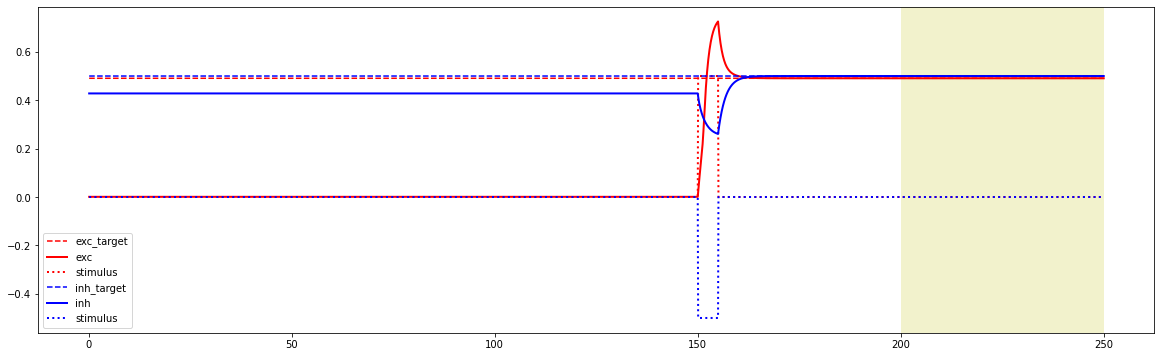

gradient:


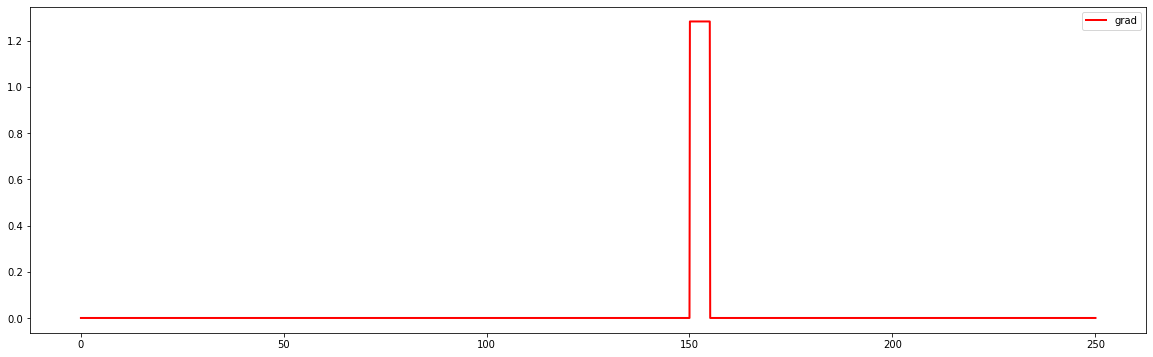

___
iteration: 100


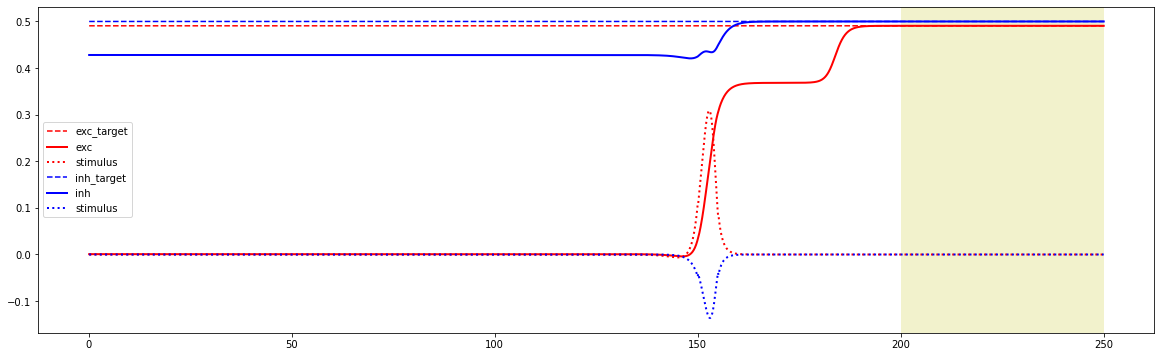

gradient:


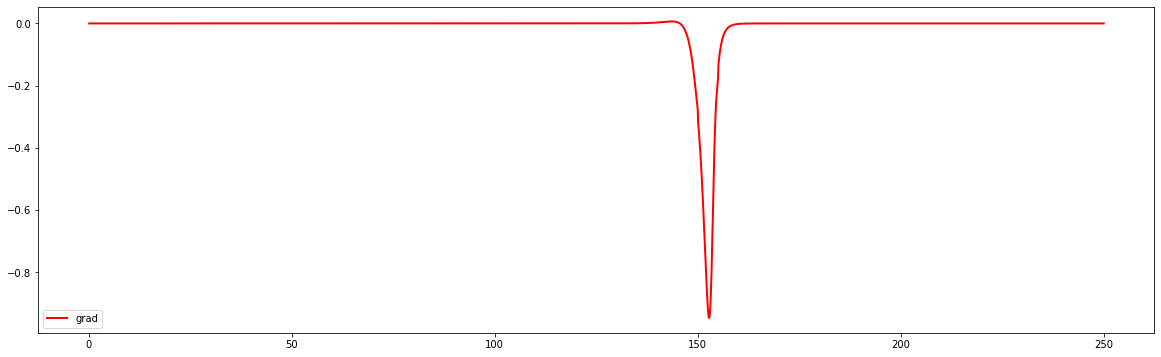

KeyboardInterrupt: 

In [57]:
wc = WCModel()




#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
wc.params['exc_ext'] = 3.33
wc.params['inh_ext'] = 5#3.89
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1

#wc.params["a_exc"] = 1
#wc.params["a_inh"] = 1

wc.params['duration'] = 250




wc.params["exc_init"] = [[0.000751]]
wc.params["inh_init"] =[[0.428077]]

#wc.params["exc_init"] = [[0.45446237]]
#wc.params["inh_init"] = [[0.49949741]]

stimulus_zeros = np.zeros((1,2500))
stimulus = stim.StepInput(step_size=0.5,  start=150, end=155, n=1).to_model(wc)
stimulus2 = stim.StepInput(step_size=-0.5,  start=150, end=155, n=1).to_model(wc)

stimulus[0][500:600] = 0
#plt.plot(stimulus.T)


#wc.params['exc_ext'] = 3.33
#wc.params['inh_ext'] = 3.89



optimal_control(wc, target_exc,target_inh, stimulus, stimulus2, n_iter = 20000, plot_freq = 100, w = [2,2], a = 2000,debug = False)


#optimal_control(wc, stimulus, target, target)

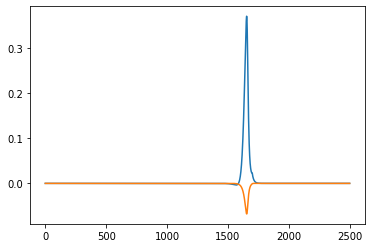

In [39]:
stimulus_1 = np.zeros((1,2500))
stimulus_1[0][1400:1800] = a1_2
stimulus_2 = np.zeros((1,2500))
stimulus_2[0][1400:1800] = a2_2

plt.plot(stimulus_1[0])
plt.plot(stimulus_2[0])

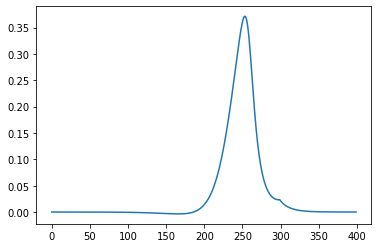

In [38]:
a1 = wc.params["control_term_E"]
a2 = wc.params["control_term_I"]
plt.plot(a1[0][1700:2100])
a1_2 = a1[0][1700:2100]

a2_2 = a2[0][1700:2100]

# Toy example

In [ ]:
from neurolib.models.wc import WCModel
wc = WCModel()
wc.params["a_exc"] = 1
wc.params["a_inh"] = 1
#wc.params['exc_ext'] = 3.33
#wc.params['inh_ext'] = 3.89
#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
#wc.params["exc_ext"] = 0
#wc.params["inh_ext"] = 0
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1
wc.params['duration'] = 1


In [ ]:
#stimulus
stimulus = np.zeros((1,10))
stimulus[0][4] = -1

#plt.plot(stimulus.T)



wc.params["control_term_E"] = stimulus
#wc.params["control_term_I"] = stimulus
wc.run()
exc=wc.exc[0]
inh = wc.inh[0]

plt.figure(figsize = (20, 6))
plt.plot(wc.t, stimulus.T, c = 'r')
plt.plot(wc.t, wc.exc[0].tolist(), c='k', lw = 2)

#0.02788229


In [ ]:
wc = WCModel()
wc.params["a_exc"] = 1
wc.params["a_inh"] = 1

#wc.params["c_inhinh"] = 0
#wc.params["c_excinh"] = 0
#wc.params["c_inhexc"] = 0
#wc.params["c_excexc"] = 0
#wc.params["tau_exc"] = 1  
#wc.params["tau_inh"] = 1
#wc.params["exc_ext"] = 0
#wc.params["inh_ext"] = 0
#wc.params["K_gl"] = 0
#wc.params["dt"] = 0.1
wc.params['duration'] = 1

stimulus = np.zeros((1,10))




optimal_control(wc, exc,inh, stimulus, n_iter = 1000, plot_freq = 100, w = [0.0,0.0], a = 6, debug = False)
#optimal_control(wc, stimulus, target, target)

In [ ]:
wc = WCModel()
wc.params["a_exc"] = 1
wc.params["a_inh"] = 1
wc.params['duration'] = 1

stimulus = np.zeros((1,10))




optimal_control(wc, exc,inh, stimulus, n_iter = 20, plot_freq = 1, w = [0.0,0.0], a = 0, debug = False)
#optimal_control(wc, stimulus, target, target)

## Drafts

In [131]:
wc.params['exc_ext'] = 0
wc.params['inh_ext'] = 0
wc.run()

(1, 20000)


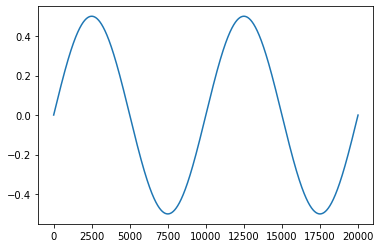

In [156]:
stimulus = stim.SinusoidalInput(amplitude=0.5, frequency=1).to_model(wc)
print(stimulus.shape)
plt.plot(stimulus.T)
wc.params["control_term"] = stimulus

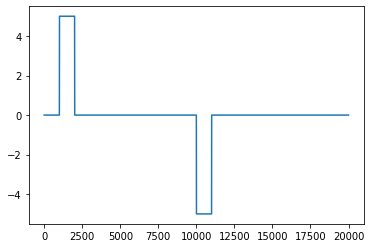

In [196]:
stimulus = np.zeros((20000))
stimulus[1000:2000] = 5
stimulus[10000:11000] = -5
plt.plot(stimulus)

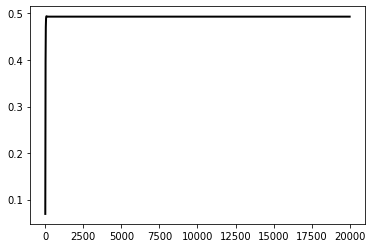

In [182]:
wc = WCModel()
#wc.params["control_term"] = s
wc.params['exc_ext'] = 3.5
wc.params['inh_ext'] = 3.5
wc.run()
plt.plot(range(int(wc.params['duration']/wc.params['dt'])), wc.exc[0].tolist(), c='k', lw = 2)
#plt.plot(s)
plt.show()
target = wc.exc[0]


In [ ]:
plt.plot(exc_inputs, max_exc, c='k', lw = 2)
plt.plot(exc_inputs, min_exc, c='k', lw = 2)
plt.title("Bifurcation diagram of the Wilson-Cowan model")
plt.xlabel("Input to exc")
plt.ylabel("Min / max exc")

In [ ]:
def dh1_dE():
    return 1

def dh2_dE():
    return 2

def dh1_dI():
    return 3

def dh2_dI():
    return 4

def df_dE():
    return 0

def df_dI():
    return 0

lambd1 = 1
lambd2 = 2
Dxh = np.array([[ dh1_dE(), dh1_dI()], 
                  [dh2_dE(), dh2_dI()]])
lambdas = np.array([lambd1, lambd2])

Dxf = np.array([df_dE(), df_dI()])

tauE = 2
tauI = 8

Dx_doth = np.array([[ -tauE, 0], 
                  [0, -tauI]])
x = np.linalg.solve(Dx_doth, b)

(Dxf - lambdas@Dxh)@np.linalg.inv(Dx_doth)



In [ ]:
exp = stim.SinusoidalInput(amplitude=0.5, frequency=0.5).to_model(wc)
#exp = stim.StepInput(step_size=0.5, start=10, end=80, n=2).to_model(wc)
plt.plot(exp.T)

## Single node simulation

In [ ]:
wc = WCModel()
wc.params['duration'] = 1.0*1000
wc.params['sigma_ou'] = 0.01

wc.run()

In [ ]:
plt.plot(wc.t, wc.exc.T, c='k', lw = 2)
plt.xlabel("t [ms]")
plt.ylabel("Activity")

## Brain network

In [ ]:
from neurolib.utils.loadData import Dataset

ds = Dataset("hcp")

In [ ]:
wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat)

In [ ]:
wc.params['exc_ext'] = 0.65

wc.params['signalV'] = 0
wc.params['duration'] = 20 * 1000 
wc.params['sigma_ou'] = 0.14
wc.params['K_gl'] = 3.15


wc.run(chunkwise=True)

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
axs[0].imshow(func.fc(wc.exc[:, -10000:]))
axs[1].plot(wc.t, wc.exc[::5, :].T, alpha=0.8);
axs[1].set_xlim(0, 200)

In [ ]:
scores = [func.matrix_correlation(func.fc(wc.exc[:, -int(5000/wc.params['dt']):]), fcemp) for fcemp in ds.FCs]
print("Correlation per subject:", [f"{s:.2}" for s in scores])
print("Mean FC/FC correlation: {:.2f}".format(np.mean(scores)))

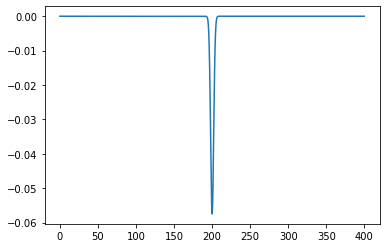

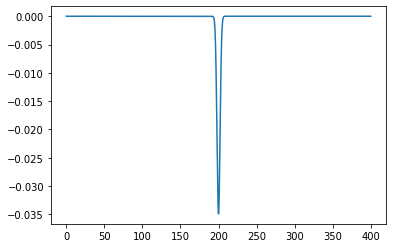

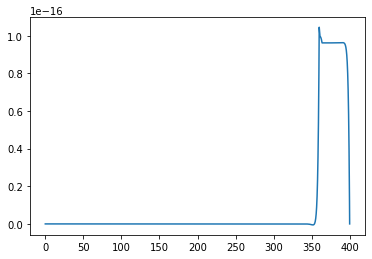

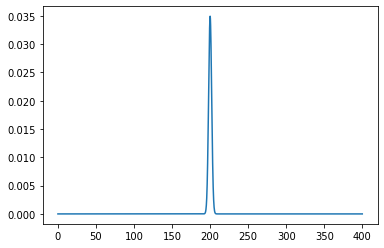

[0.34231325]
[0.41606319]
[0.52796147]
[0.44302924]
0.4430292406477573


In [244]:
#script for plotting one
# i - exc_external
# j - inh_extrnal


i = 3
j = 4

filepath = "../test_3_4/" #path to where experiment data is stored

with np.load(filepath+str(i)+'_'+str(j)+'test1_minus5_0'+'.npz') as data:
    exc = data['exc']
    target_exc = data['target_exc']
    stimulus_exc = data['stimulus_exc']
    inh = data['inh']
    target_inh = data['target_inh']
    stimulus_inh = data['stimulus_inh']
    t = np.arange(0,400,0.1)
    

filepath2 = "../test_3_4/" #path to where experiment data is stored

with np.load(filepath2+str(i)+'_'+str(j)+'test1_minus5_5'+'.npz') as data:
    exc2 = data['exc']
    target_exc2 = data['target_exc']
    stimulus_exc2 = data['stimulus_exc']
    inh2 = data['inh']
    target_inh2 = data['target_inh']
    stimulus_inh2 = data['stimulus_inh']
    t2 = np.arange(0,400,0.1)
    
    
filepath3 = "../test_3_4/" #path to where experiment data is stored
with np.load(filepath3+str(i)+'_'+str(j)+'test1_0_5'+'.npz') as data:
    exc3 = data['exc']
    target_exc3 = data['target_exc']
    stimulus_exc3 = data['stimulus_exc']
    inh3 = data['inh']
    target_inh3 = data['target_inh']
    stimulus_inh3 = data['stimulus_inh']
    t3 = np.arange(0,400,0.1)
    
    
    
filepath4 = "../test_3_4/" #path to where experiment data is stored
with np.load(filepath4+str(i)+'_'+str(j)+'test1_0_0'+'.npz') as data:
    exc4 = data['exc']
    target_exc4 = data['target_exc']
    stimulus_exc4 = data['stimulus_exc']
    inh4 = data['inh']
    target_inh4 = data['target_inh']
    stimulus_inh4 = data['stimulus_inh']
    t4 = np.arange(0,400,0.1)
    

plt.plot(t, stimulus_exc)
plt.figure(figsize = (20, 6))
plt.show()
#plt.plot(t2, exc2)
plt.plot(t2, stimulus_exc2)
plt.show()
plt.plot(t, stimulus_inh)
plt.show()
plt.plot(t2, stimulus_inh2)
#plt.plot(t2, inh2)
plt.show()

cost = cost_f([1,0], exc, target_exc, inh, target_inh, stimulus_exc.T, stimulus_inh.T, range(0, 4000), 0.9*4000)
print(cost)

cost2 = cost_f([1,0], exc2, target_exc2, inh2, target_inh2, stimulus_exc2.T, stimulus_inh2.T, range(0, 4000), 0.9*4000)
print(cost2)

cost3 = cost_f([1,0], exc3, target_exc3, inh3, target_inh3, stimulus_exc3.T, stimulus_inh3.T, range(0, 4000), 0.9*4000)
print(cost3)

cost4 = cost_f([1,0], exc4, target_exc4, inh4, target_inh4, stimulus_exc4.T, stimulus_inh4.T, range(0, 4000), 0.9*4000)
print(cost4)
print('{0:.16f}'.format(cost4[0]))